In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction
This is an introduction to your report, you should edit this text/mardown section to compose. In this text/markdown, you should introduce:


*   **Background of the problem**
  * **what type of problem: disease/readmission/mortality prediction,  feature engineeing, data processing, etc**

      The main problem this research aims to solve is to predict the chance of ICU patients contracting Sepsis, having a Myocardial infarction (heart attack), or the administration of Vancomycin. These are all clinical endpoints for ICU patients and providing a model that accurately predict these targets can alleviate the continually increasing pressures on ICU physcians.

  * **what is the importance/meaning of solving the problem**
      
      Solving this problem provides two main benefits. Firstly it provides ICU physicans with a model that is interpretable and accurate in its predictions on these targets. This will be useful to physicians by reducing information overload and by "providing needed clinical decision support for a variety of clinically important tasks".

  * **what is the difficulty of the problem**

      The problem is difficult for a few key reasons. Firstly, there have been attempts to create models based on linear/hazard regression to predict these cases, but these models have failed to learn non-linear relationships in medicine and biology. More importantly, these models are not very interpretable to physicians, so they become difficult to use. In order to combat this, we will train an LSTM model with attention mechanisms to provide greater interperetability and accuracy.

  * **the state of the art methods and effectiveness**

      For this problem, an RNN model by itself is not enough to achieve interpretability. To mitigate this, LSTMs with attention mechanisms are used to improve effectiveness. This method is taken from the soft attention model, RETAIN from Choi et al.,  which was able to predict outpatient heart failure and "used attention at the level of two parallel RNNs to interpret visit- and variable-level importance".

* **Paper explanation**
  * **what did the paper propose**

      In the paper “An attention based deep learning model of clinical events in the intensive care unit” Kaji and other researchers trained LSTM RNNs incorporating an attention mechanism in order to predict: Daily sepsis the body reacts adversely when responding to an infection, Myocardial infarction (MI): blood flow to the heart is restricted, also called heart attack, Vancomycin antibiotic administration (VAA): a drug intended to kill bacteria in the intestines to fight colitis.

  * **what is the innovations of the method**

      The method is innovative with regards to its use of soft attention in combination with LSTMs to predict these specific targets.
      
  * **how well the proposed method work (in its own metrics)**

      Per the result metrics, these models achieved next-day predictive AUC of 0.876 for sepsis, 0.823 for MI, and 0.833 for vancomycin administration.

  * **what is the contribution to the reasearch regime (referring the Background above, how important the paper is to the problem).**

      The results of these models further prove the soft attention and RNN methods for predicting clinically important tasks. This paper proved that "Machine learning models could be of great value in providing timely decision support to ICU clinicians, distilling the information overload that is typical of the environment down into the most relevant factors for that patient in any given moment". These types of models can help in identifying "potentially non-intuitive and important predictive variables from a wide variety of inputs".

* **Code Link**
    * https://github.com/archu-s/mimic-lstm/tree/updated


# Scope of Reproducibility:

List hypotheses from the paper you will test and the corresponding experiments you will run.

The paper hypothesizes that it would be possible to predict a variety of clinical endpoints in the ICU by training a Recurrent Neural Network (RNN) to routinely available variables from a critically ill patient’s ICU admission to sequences of those endpoints, and that the incorporation of variable-level attention could promote straightforward interpretability of such a model to clinicians.


1.   Hypothesis 1: The paper hypothesizes that it would be possible to predict contraction of Sepsis in ICU patients using the patient's ICU admission information while maintaining interpretability

2.   Hypothesis 2: The paper hypothesizes that it would be possible to predict the onset of Myocardial infarctions in ICU patients using the patient's ICU admission information while maintaining interpretability

3.  Hypothesis 3: The paper hypothesizes that it would be possible to predict the administration of Vancomycin in ICU patients using the patient's ICU admission information while maintaining interpretability



# Methodology


# Environment

- Python version:

In [ ]:
!python --version

Python 3.10.12


In [ ]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


- Dependencies/Packages Needed:

Apart from the python files includes in the project, these are the main packages that are needed:
- numpy
- pandas
- gc
- tensorflow
- keras
- seaborn
- pickle
- sklearn
- scipy
- matplotlib


Below is also a JSON tree of all dependencies:

In [ ]:
!pip3 install pipdeptree
!pipdeptree --json-tree

Streaming output truncated to the last 5000 lines.
                                                                                                        "installed_version": "23.2.0",
                                                                                                        "required_version": ">=22.2.0",
                                                                                                        "dependencies": []
                                                                                                    },
                                                                                                    {
                                                                                                        "key": "rpds-py",
                                                                                                        "package_name": "rpds-py",
                                                                                                 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# import  packages you need
import numpy as np
from google.colab import drive

##  Data
Data includes raw data (MIMIC III tables), descriptive statistics (our homework questions), and data processing (feature engineering).

**Source of the data: where the data is collected from; if data is synthetic or self-generated, explain how. If possible, please provide a link to the raw datasets.**

  The data for this researched is sourced from the MIMIC-III database which is a relational database composed of 26 tables. Each of these tables represents a healthcare-related entity. Each table has an ID key that acts as the primary key, for example each procedure would have an procedure_id. These keys can be joined accross tables to providing meaningful views to users.

  Certain tables contain event data which includes data such as lab tests and notes. Some tables act as dictionary tables and are prefixed with the D_ identifier and need to be joined with other data to provide meaningful views.

  Some Broader Categories of tables:

  - Patient Stays: ADMISSIONS; PATIENTS; ICUSTAYS; SERVICES; and TRANSFERS

  - Dictionaries: D_CPT; D_ICD_DIAGNOSES; D_ICD_PROCEDURES; D_ITEMS; and D_LABITEMS


  Data can be downloaded here assuming as long as the user has been approved to access the database: https://physionet.org/content/mimiciii/1.4/

  The data from this database is exported to csv format and downloaded to be fed as input into to MIMIC processor file. Below is a preview of data before any processing beyond an inital filter of only relevant features.



In [ ]:
# load CSV raw example
import pandas as pd

ROOT = "/content/drive/MyDrive/Colab Notebooks/"
FILE = "mimic_database/mapped_elements/CHARTEVENTS_reduced_day_features_24_hour_blocks.csv"

chart_events_reduced = pd.read_csv(ROOT + FILE)

Sample of data from the CHARTEVENTS Table (Projected to show only relevant features)

In [ ]:
chart_events_reduced.head()

BUN   HDL   INR  Inspired O2 Fraction   LDL  PEEP Set   PTT  RBCs  \
0  41.000000  41.0  15.3                  50.0  81.0       5.0  32.4  3.39   
1  31.333333  41.0  15.3                  50.0  81.0       5.0  32.4  3.39   
2  21.500000  41.0  15.3                  50.0  81.0       5.0  32.4  3.39   
3  17.000000  41.0  15.3                  50.0  81.0       5.0  32.4  3.39   
4  17.000000  41.0  15.3                  50.0  81.0       5.0  32.4  3.39   

   WBCs  anion gap  ...  potassium_max  pulse oximetry_max  \
0  11.2  18.000000  ...            4.2               100.0   
1  10.4  14.666667  ...            4.1                99.0   
2  15.9  14.000000  ...            4.4                99.0   
3  10.5  14.500000  ...            4.2                99.0   
4   6.1  15.000000  ...            3.5                98.0   

   respiratory rate_max  sodium_max  systolic_max  temperature (F)_max  \
0                  22.0       143.0         138.0                100.0   
1                  26.0       145.0         138.0                 99.9   
2                  20.0       142.0         138.0                 99.9   
3                  26.0       138.0         138.0                 99.6   
4                  26.0       138.0         138.0                 99.6   

   tidal volume_max  triglycerides_max  troponin_max         HADMID_DAY  
0             500.0              117.0          0.07  100001_2117-09-11  
1             500.0              117.0          0.07  100001_2117-09-12  
2             500.0              117.0          0.07  100001_2117-09-13  
3             500.0              117.0          0.07  100001_2117-09-14  
4             500.0              117.0          0.07  100001_2117-09-15  

[5 rows x 149 columns]

In [ ]:
chart_events_reduced.describe()

BUN            HDL            INR  Inspired O2 Fraction  \
count  346317.000000  346317.000000  346317.000000         346317.000000   
mean       25.538646      40.996822      15.470064             49.825879   
std        14.266138       0.924544       1.303531              4.847425   
min         0.000000       2.000000       7.900000              0.000000   
25%        17.666667      41.000000      15.300000             50.000000   
50%        23.000000      41.000000      15.300000             50.000000   
75%        27.000000      41.000000      15.300000             50.000000   
max        82.000000      71.000000      25.400000             86.666667   

                 LDL       PEEP Set            PTT           RBCs  \
count  346317.000000  346317.000000  346317.000000  346317.000000   
mean       80.997035       5.357620      34.105307       3.387893   
std         1.974255       1.286709       8.868606       0.319557   
min         1.000000       0.000000       0.000000       0.000000   
25%        81.000000       5.000000      32.400000       3.390000   
50%        81.000000       5.000000      32.400000       3.390000   
75%        81.000000       5.000000      32.400000       3.390000   
max       154.000000      12.450000      81.966667       4.620000   

                WBCs      anion gap  ...  polymorphonuclear leukocytes_max  \
count  346317.000000  346317.000000  ...                     346317.000000   
mean       11.023962      13.023946  ...                         81.774058   
std         3.701620       1.711822  ...                          3.553614   
min         0.050000      -7.000000  ...                          0.000000   
25%         9.200000      13.000000  ...                         82.000000   
50%        10.900000      13.000000  ...                         82.000000   
75%        12.050000      13.000000  ...                         82.000000   
max        23.400000      20.000000  ...                         94.100000   

       potassium_max  pulse oximetry_max  respiratory rate_max     sodium_max  \
count  346317.000000       346317.000000         346317.000000  346317.000000   
mean        4.177794           99.748667             26.367475     138.923424   
std         0.425688            1.099121              4.856979       3.486165   
min         1.500000            0.000000              0.000000       0.000000   
25%         4.000000          100.000000             24.000000     138.000000   
50%         4.200000          100.000000             26.000000     139.000000   
75%         4.300000          100.000000             28.000000     140.000000   
max         5.500000          100.000000             40.000000     147.000000   

        systolic_max  temperature (F)_max  tidal volume_max  \
count  346317.000000        346317.000000     346317.000000   
mean      129.675670            99.134444        504.386401   
std        33.343568             1.658693         50.678536   
min         0.000000             0.000000          0.000000   
25%       115.000000            98.600000        500.000000   
50%       138.000000            99.199997        500.000000   
75%       152.000000            99.599998        500.000000   
max       188.000000           101.900002        700.000000   

       triglycerides_max   troponin_max  
count      346317.000000  346317.000000  
mean          117.346284       0.091111  
std            11.764615       0.248364  
min             1.000000       0.000000  
25%           117.000000       0.070000  
50%           117.000000       0.070000  
75%           117.000000       0.070000  
max           412.000000       6.300000  

[8 rows x 148 columns]




**Data process: how do you munipulate the data, e.g., change the class labels, split the dataset to train/valid/test, refining the dataset**


  After downloading the source data from MIMIC-III, the data is passed into the mimic_processor function where it is processed for input into the model.

  First an instantiated object of the ParseItemID class is created. This class contains the set of features, feature names and patterns that will be extracted from the data. For example, these feature names are instantiated with a ParseItemID object to be extracted.

  ```
          self.feature_names = ['RBCs', 'WBCs', 'platelets', 'hemoglobin', 'hemocrit',
                                'atypical lymphocytes', 'bands', 'basophils', 'eosinophils', 'neutrophils',
                                'lymphocytes', 'monocytes', 'polymorphonuclear leukocytes',
                                'temperature (F)', 'heart rate', 'respiratory rate', 'systolic', 'diastolic',
                                'pulse oximetry',
                                'troponin', 'HDL', 'LDL', 'BUN', 'INR', 'PTT', 'PT', 'triglycerides', 'creatinine',
                                'glucose', 'sodium', 'potassium', 'chloride', 'bicarbonate',
                                'blood culture', 'urine culture', 'surface culture', 'sputum' +
                                ' culture', 'wound culture', 'Inspired O2 Fraction', 'central venous pressure',
                                'PEEP Set', 'tidal volume', 'anion gap',
                                'daily weight', 'tobacco', 'diabetes', 'history of CV events']
  ```

  The main purpose of this object is transform the data from the MIMIC-III database to pandas dataframes projected with the relevant columns to be used in the operation.

  This is done by

  1. Filtering out events from CHARTEVENTS that are not feature relevant
  2. Taking daily shards of the data and build them out
  3. Adding columns related to the demographics of admits
  4. Adding columns related to the prescriptions for patients
  5. Adding columns related to the procedures and infections for patients
  6. Adding columns related to the notes for the patients, specifically:
      - Radiology notes
      - CT aniograms notes
      - Chest aniograms notes


  Once this data is created one final csv file with the suffix: `CHARTEVENTS_reduced_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes.csv` should be created. This file will have the complete set of transformed data from MIMIC-III

  At this point data will be fed to the RNN mimic's `return_data()` function to be split into train and test sets. Below is the final result CSV and some descriptive stats



In [ ]:
# load transformed data - shows stats about size and shape
import pandas as pd

ROOT = "/content/drive/MyDrive/Colab Notebooks/"
FILE = "mimic_database/mapped_elements/CHARTEVENTS_reduced_day_features_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes.csv"

df = pd.read_csv(ROOT + FILE)

**Statistics: include basic descriptive statistics of the dataset like size, cross validation split, label distribution, etc**



In [ ]:
df.describe()

BUN            HDL            INR  Inspired O2 Fraction  \
count  628391.000000  628391.000000  628391.000000         628391.000000   
mean       14.074783      22.594048       8.525816             27.459892   
std        16.538329      20.402571       7.755123             25.042333   
min         0.000000       0.000000       0.000000              0.000000   
25%         0.000000       0.000000       0.000000              0.000000   
50%        11.000000      41.000000      14.600000             50.000000   
75%        23.000000      41.000000      15.300000             50.000000   
max        82.000000      71.000000      25.400000             86.666667   

                 LDL       PEEP Set            PTT           RBCs  \
count  628391.000000  628391.000000  628391.000000  628391.000000   
mean       44.638848       2.952676      18.796017       1.867126   
std        40.313004       2.830807      18.196171       1.701689   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%        81.000000       5.000000      26.900000       3.000000   
75%        81.000000       5.000000      32.400000       3.390000   
max       154.000000      12.450000      81.966667       4.620000   

                WBCs      anion gap  ...     tacrolimus      trazodone  \
count  628391.000000  628391.000000  ...  628391.000000  628391.000000   
mean        6.075494       7.177719  ...       0.020077       0.051221   
std         6.133174       6.601333  ...       0.140263       0.220449   
min         0.000000      -7.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         6.400000      11.000000  ...       0.000000       0.000000   
75%        10.900000      13.000000  ...       0.000000       0.000000   
max        23.400000      20.000000  ...       1.000000       1.000000   

          vancomycin    vasopressin      warfarin       zolpidem  \
count  628391.000000  628391.000000  628391.00000  628391.000000   
mean        0.243170       0.016353       0.08510       0.061107   
std         0.428997       0.126829       0.27903       0.239526   
min         0.000000       0.000000       0.00000       0.000000   
25%         0.000000       0.000000       0.00000       0.000000   
50%         0.000000       0.000000       0.00000       0.000000   
75%         0.000000       0.000000       0.00000       0.000000   
max         1.000000       1.000000       1.00000       1.000000   

             HADM_ID            CKD      Infection       ct_angio  
count  628391.000000  628391.000000  628391.000000  628391.000000  
mean   150354.076193       0.000054       0.919859       0.722728  
std     28976.136663       0.007356       0.271512       0.447652  
min    100001.000000       0.000000       0.000000       0.000000  
25%    125385.000000       0.000000       1.000000       0.000000  
50%    150661.000000       0.000000       1.000000       1.000000  
75%    175426.000000       0.000000       1.000000       1.000000  
max    199999.000000       1.000000       1.000000       1.000000  

[8 rows x 231 columns]

In [ ]:
df.head()

BUN   HDL   INR  Inspired O2 Fraction   LDL  PEEP Set   PTT  RBCs  \
0  41.000000  41.0  15.3                  50.0  81.0       5.0  32.4  3.39   
1  31.333333  41.0  15.3                  50.0  81.0       5.0  32.4  3.39   
2  21.500000  41.0  15.3                  50.0  81.0       5.0  32.4  3.39   
3  17.000000  41.0  15.3                  50.0  81.0       5.0  32.4  3.39   
4  17.000000  41.0  15.3                  50.0  81.0       5.0  32.4  3.39   

   WBCs  anion gap  ...  tacrolimus  trazodone  vancomycin  vasopressin  \
0  11.2  18.000000  ...         0.0        0.0         0.0          0.0   
1  10.4  14.666667  ...         0.0        0.0         0.0          0.0   
2  15.9  14.000000  ...         0.0        0.0         0.0          0.0   
3  10.5  14.500000  ...         0.0        0.0         0.0          0.0   
4   6.1  15.000000  ...         0.0        0.0         0.0          0.0   

   warfarin  zolpidem  HADM_ID  CKD  Infection  ct_angio  
0       0.0       0.0   100001    0          1         0  
1       0.0       0.0   100001    0          1         0  
2       0.0       0.0   100001    0          1         0  
3       0.0       0.0   100001    0          1         0  
4       0.0       0.0   100001    0          1         0  

[5 rows x 235 columns]

In [ ]:
df.shape

(628391, 235)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628391 entries, 0 to 628390
Columns: 235 entries, BUN to ct_angio
dtypes: float64(227), int64(4), object(4)
memory usage: 1.1+ GB


**Illustration: printing results, plotting figures for illustration**

Overview of Data Flow:

  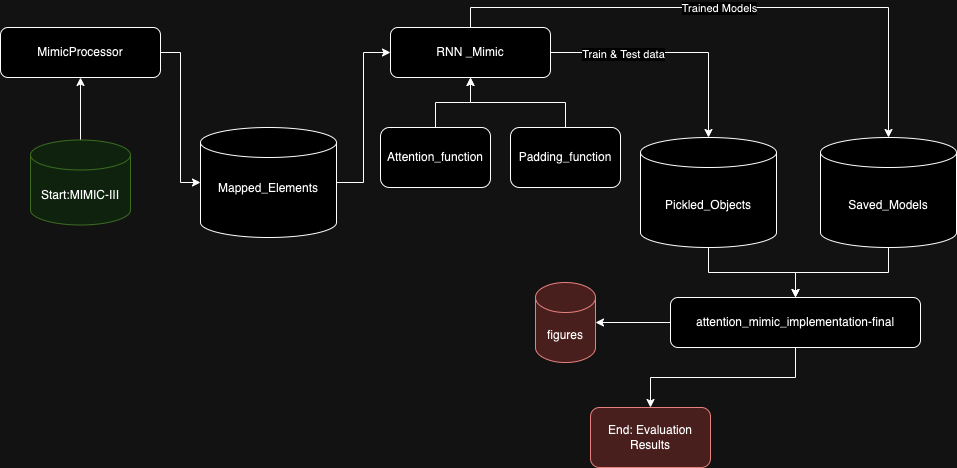

<Axes: xlabel='vancomycin'>

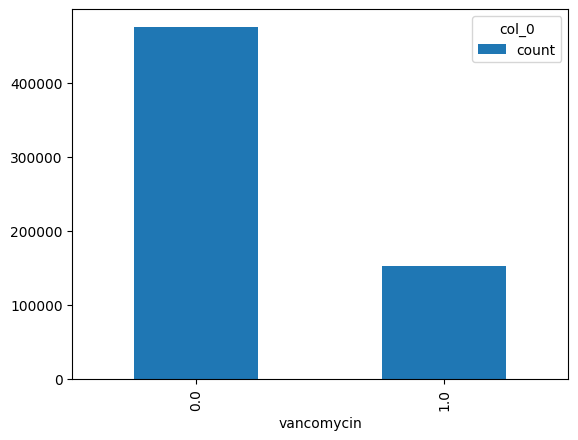

In [ ]:
van_table = pd.crosstab(index=df["vancomycin"],  columns="count")
van_table.plot(kind="bar")

**Setting up environment to run**

The file structure should be like this:

- Green - Needs to be created/uploaded by the user
- Red - RNN mimic, padding, and attention need to be created by the user, the rest will be auto generated
- Blue - Proccessor needs to be created by the user, the rest will be auto generated
- Purple - The main file needs to be run by the user, and the rest will be auto generated

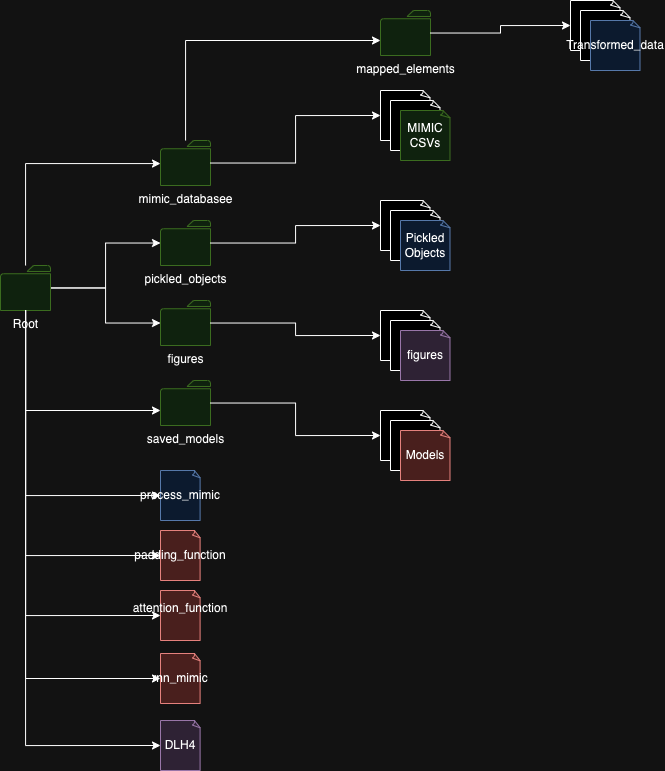

##   Model
The model includes the model definitation located in the rnn_mimic.py file. This model is used to handle and predict Myocardial Infarction (MI), Sepsis, and Vancomycin administration from the MIMIC-III dataset.

**Model architecture:**
1. Input Later: Receives the time series data (Shape determined by the time_steps and the no_feature_cols)
2. Attention Layer: Applies the attention mechanism
3. Masking Layer: Used to ignore cetrain timesteps to pad with zeros
4. LSTM Layer: Process the time serives data (256 units to return sequences)
5. Output Layer: Applies a sigmoid activiation function

**Training Objectives:**

1.   Loss Function: The model uses binary cross-entropy
2.   Optimizer: RMSprop with specific hyperparameters (lr=0.001, rho=0.9, epsilon=1e-08)
3. Weight of each loss term: Binary cross-entropy loss accross all output predictions

**Others:**
Model is not pretrained, and there is no Monte Carlo Simulation.

**Link to Paper Repo:**

https://github.com/deepak-kaji/mimic-lstm


**Paper Citation:**

Kaji, Deepak A et al. “An attention based deep learning model of clinical events in the intensive care unit.”, PLoS ONE 14 (2019): n. pag., doi: https://doi.org/10.1371/journal.pone.0211057




##   Training & Evaluation


**Computational requirements:**

1.   rnn_mimic.py file has the code to generate pickel files from the raw preprocessed file CHARTEVENTS_reduced_day_features_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes.csv. And used load pickle files to build and train model.
2. Preprocessed data file CHARTEVENTS_reduced_day_features_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes.csv has 6,28,391 rows.
3. We have tried building pickle files and training model on Google Colab T4 GPU, however it was still taking very long time and after that it was timing out.
4. Hence we only read first 50,000 rows from the CHARTEVENTS_reduced_day_features_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes.csv and generate pickle files on google Colab CPU.
5. And model are build and trained on generated pickel files with reduced epoches = 5.


For evaluation we are primarily utilizing the AUC score to identify the true positive and false positive rates of the model. We have also included additional information for feature activiations as suppementary material. Please see the results section for more details.

Hyperparameters:

*   Learning Rate: 0.001
*   RHO: 0.9
*   Epsilon: 1e-08
*   Loss: binary cross entropy

Load RNN for training and evaluation

In [ ]:
import sys

# Append the directory to your python path using sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')

# Import the module
import rnn_mimic

Load Relevant Pakcages

In [ ]:
import gc
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.backend as K
from rnn_mimic import return_loaded_model
from seaborn import heatmap
import seaborn as sns
import pickle
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import kurtosis

# plot part.
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [ ]:
# !python '/content/drive/MyDrive/Colab Notebooks/attention_function.py'

The following parameters are used to split the data:

       synth_data : synthetic data is False by default
       balance : whether or not to balance positive and negative time windows
       target : desired target, supports MI, SEPSIS, VANCOMYCIN or a known lab, medication
       return_cols : return columns used for this RNN
       tt_split : fraction of dataset to use fro training, remaining is used for test
       cross_val : parameter that returns entire matrix unsplit and unbalanced for cross val purposes
       mask : 24 hour mask, default is False
       dataframe : returns dataframe rather than numpy ndarray
       time_steps : 14 by default, required for padding
       split : creates test train splits
       pad : by default is True, will pad to the time_step value

```
def return_data(synth_data=False, balancer=True, target='MI',
                 return_cols=False, tt_split=0.7, val_percentage=0.8,
                 cross_val=False, mask=False, dataframe=False,
                 time_steps=14, split=True, pad=True):
```

Training From Scratch:

In [ ]:
## This python file is responsbile for loading the raw preprocessed data file mimic_database/mapped_elements/CHARTEVENTS_reduced_day_features_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes.csv
## and build and train the model. The model summary is shown in the output, along with the shape of the raw preprocessed input file.
## Please note for compuational purpose we are only reading first 50000 rows, and reading full file and training on them was timing out even when we tried on Google Colab with T4 GPU.
## The model is build and train on Google Colab CPU runtime.

!python '/content/drive/MyDrive/Colab Notebooks/rnn_mimic.py'

2024-05-07 00:26:51.458926: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 00:26:51.459004: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 00:26:51.460872: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-07 00:26:53.352016: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Creating pickled_object file for traget MI
Dataframe Shape from the file /content/drive/MyDrive/Colab Notebooks/mimic_database/mapped_elements/CHARTEVENTS_reduced_day_features_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_ic

Set Target for training from Picklefile (Note: there are 3 targets to manually set MI, SEPSIS, VANCOMYCIN)

### Target: VANCOMYCIN

#### Training

In [ ]:
target = 'VANCOMYCIN'

In [ ]:
## PICKLE LOADS
ROOT = "/content/drive/MyDrive/Colab Notebooks/"

X_TRAIN_MI = pickle.load(open(ROOT+'pickled_objects/X_TRAIN_MI.txt', 'rb'))
X_TRAIN_SEPSIS = pickle.load(open(ROOT+'pickled_objects/X_TRAIN_SEPSIS.txt', 'rb'))
X_TRAIN_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/X_TRAIN_VANCOMYCIN.txt', 'rb'))

Y_TRAIN_MI = pickle.load(open(ROOT+'pickled_objects/Y_TRAIN_MI.txt', 'rb'))
Y_TRAIN_SEPSIS = pickle.load(open(ROOT+'pickled_objects/Y_TRAIN_SEPSIS.txt', 'rb'))
Y_TRAIN_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/Y_TRAIN_VANCOMYCIN.txt', 'rb'))

Y_VAL_MI = pickle.load(open(ROOT+'pickled_objects/Y_VAL_MI.txt', 'rb'))
Y_VAL_SEPSIS = pickle.load(open(ROOT+'pickled_objects/Y_VAL_SEPSIS.txt', 'rb'))
Y_VAL_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/Y_VAL_VANCOMYCIN.txt', 'rb'))

X_VAL_MI = pickle.load(open(ROOT+'pickled_objects/X_VAL_MI.txt', 'rb'))
X_VAL_SEPSIS = pickle.load(open(ROOT+'pickled_objects/X_VAL_SEPSIS.txt', 'rb'))
X_VAL_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/X_VAL_VANCOMYCIN.txt', 'rb'))

Y_TEST_MI = pickle.load(open(ROOT+'pickled_objects/Y_TEST_MI.txt', 'rb'))
Y_TEST_SEPSIS = pickle.load(open(ROOT+'pickled_objects/Y_TEST_SEPSIS.txt', 'rb'))
Y_TEST_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/Y_TEST_VANCOMYCIN.txt', 'rb'))

X_TEST_MI = pickle.load(open(ROOT+'pickled_objects/X_TEST_MI.txt', 'rb'))
X_TEST_SEPSIS = pickle.load(open(ROOT+'pickled_objects/X_TEST_SEPSIS.txt', 'rb'))
X_TEST_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/X_TEST_VANCOMYCIN.txt', 'rb'))

y_boolmat_test_MI = pickle.load(open(ROOT+'pickled_objects/y_boolmat_test_MI.txt', 'rb'))
y_boolmat_test_SEPSIS = pickle.load(open(ROOT+'pickled_objects/y_boolmat_test_SEPSIS.txt', 'rb'))
y_boolmat_test_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/y_boolmat_test_VANCOMYCIN.txt', 'rb'))

x_boolmat_test_MI = pickle.load(open(ROOT+'pickled_objects/x_boolmat_test_MI.txt', 'rb'))
x_boolmat_test_SEPSIS = pickle.load(open(ROOT+'pickled_objects/x_boolmat_test_SEPSIS.txt', 'rb'))
x_boolmat_test_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/x_boolmat_test_VANCOMYCIN.txt', 'rb'))

no_features_cols_MI = pickle.load(open(ROOT+'pickled_objects/no_feature_cols_MI.txt', 'rb'))
no_features_cols_SEPSIS = pickle.load(open(ROOT+'pickled_objects/no_feature_cols_SEPSIS.txt', 'rb'))
no_features_cols_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/no_feature_cols_VANCOMYCIN.txt', 'rb'))

features_MI = pickle.load(open(ROOT+'pickled_objects/features_MI.txt', 'rb'))
features_SEPSIS = pickle.load(open(ROOT+'pickled_objects/features_SEPSIS.txt', 'rb'))
features_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/features_VANCOMYCIN.txt', 'rb'))

if target == 'MI':
    my_cmap = ListedColormap(sns.color_palette("Reds", 150))
    color_list = sns.color_palette("Reds", 14)
    color_list_reduced = sns.color_palette("Reds", 7)
    X_TRAIN = X_TRAIN_MI
    X_VAL = X_VAL_MI
    Y_TRAIN = Y_TRAIN_MI
    Y_VAL = Y_VAL_MI
    Y_TEST = Y_TEST_MI
    X_TEST = X_TEST_MI
    y_boolmat_test = y_boolmat_test_MI
    x_boolmat_test = x_boolmat_test_MI
    features = features_MI

elif target == 'SEPSIS':
    my_cmap = sns.cubehelix_palette(14, start=2, rot=0, dark=0.25, light=.95, as_cmap=True)
    color_list = sns.cubehelix_palette(14, start=2, rot=0, dark=0.15, light=.8)
    color_list_reduced = sns.cubehelix_palette(7, start=2, rot=0, dark=0.15, light=.8)
    X_TRAIN = X_TRAIN_SEPSIS
    X_VAL = X_VAL_SEPSIS
    Y_TRAIN = Y_TRAIN_SEPSIS
    Y_VAL = Y_VAL_SEPSIS
    Y_TEST = Y_TEST_SEPSIS
    X_TEST = X_TEST_SEPSIS
    y_boolmat_test = y_boolmat_test_SEPSIS
    x_boolmat_test = x_boolmat_test_SEPSIS
    features = features_SEPSIS

elif target == 'VANCOMYCIN':
    my_cmap= sns.cubehelix_palette(14, as_cmap=True)
    color_list = sns.cubehelix_palette(14)
    color_list_reduced = sns.cubehelix_palette(7)
    X_TRAIN = X_TRAIN_VANCOMYCIN
    X_VAL = X_VAL_VANCOMYCIN
    Y_TRAIN = Y_TRAIN_VANCOMYCIN
    Y_VAL = Y_VAL_VANCOMYCIN
    Y_TEST = Y_TEST_VANCOMYCIN
    X_TEST = X_TEST_VANCOMYCIN
    y_boolmat_test = y_boolmat_test_VANCOMYCIN
    x_boolmat_test = x_boolmat_test_VANCOMYCIN
    features = features_VANCOMYCIN

# Y_TRAIN[Y_TRAIN == -1] = np.nan
# Y_VAL[Y_VAL == -1] = np.nan
# Y_TEST[Y_TEST == -1] = np.nan
Y_TOTAL = np.concatenate([Y_TRAIN, Y_VAL, Y_TEST], axis=0)

In [ ]:
Y_MI = np.concatenate([Y_TRAIN_MI, Y_VAL_MI], axis=0)
Y_SEPSIS = np.concatenate([Y_TRAIN_SEPSIS, Y_VAL_SEPSIS], axis=0)
Y_VANCOMYCIN = np.concatenate([Y_TRAIN_VANCOMYCIN, Y_VAL_VANCOMYCIN], axis=0)

In [ ]:
''' this function is adapted from Keras documentation '''

def get_activations(model, inputs, print_shape_only=False, layer_name=None, verbose=False):

    """
    Get activations from a model
    Args:
        model: a keras model
        inputs: the inputs for the model
        print_shape_only: whether to print the shape of the layer or the whole activation layer
        layer_name: name of specific layer to return
        verbose: whether to show all outputs
    Returns:
        activations: list, list of activations
    """
    activations = []
    inp = model.input
    if layer_name is None:
        outputs = [layer.output for layer in model.layers]
    else:
        outputs = [layer.output for layer in model.layers if layer.name == layer_name]  # all layer outputs
    funcs = [K.function([inp], [out]) for out in outputs]  # evaluation functions
    K.set_learning_phase(1)
    layer_outputs = [func([inputs])[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if verbose:
            print('----- activations -----')
            if print_shape_only:
                print(layer_activations.shape)
            else:
                print(layer_activations)
    return activations

def normalize_activations(activations_matrix):
    means = np.nanmean(activations_matrix, axis=0)
    stds = np.nanstd(activations_matrix, axis=0)
    return (activations_matrix - means) / stds

In [ ]:
TIME_STEPS = X_VAL.shape[1] #number of time_steps

In [ ]:
if target == 'MI':
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14")
    m_80 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_80_percent")
    m_60 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_60_percent")
    m_40 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_40_percent")
    m_20 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_20_percent")
    m_10 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_10_percent")
    m_5 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_5_percent")
    # m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_bench")
elif target == 'SEPSIS':
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14")
    m_80 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_80_percent")
    m_60 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_60_percent")
    m_40 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_40_percent")
    m_20 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_20_percent")
    m_10 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_10_percent")
    m_5 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_5_percent")
    #m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_bench")
elif target == 'VANCOMYCIN':
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14")
    m_80 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_80_percent")
    m_60 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_60_percent")
    m_40 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_40_percent")
    m_20 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_20_percent")
    m_10 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_10_percent")
    m_5 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_5_percent")
    #m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_bench")

In [ ]:
if target == 'MI':
    m_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_without_attention")
    m_80_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_80_percent_without_attention")
    m_60_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_60_percent_without_attention")
    m_40_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_40_percent_without_attention")
    m_20_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_20_percent_without_attention")
    m_10_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_10_percent_without_attention")
    m_5_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_5_percent_without_attention")
    # m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_bench")
elif target == 'SEPSIS':
    m_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_without_attention")
    m_80_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_80_percent_without_attention")
    m_60_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_60_percent_without_attention")
    m_40_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_40_percent_without_attention")
    m_20_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_20_percent_without_attention")
    m_10_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_10_percent_without_attention")
    m_5_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_5_percent_without_attention")
    #m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_bench")
elif target == 'VANCOMYCIN':
    m_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_without_attention")
    m_80_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_80_percent_without_attention")
    m_60_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_60_percent_without_attention")
    m_40_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_40_percent_without_attention")
    m_20_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_20_percent_without_attention")
    m_10_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_10_percent_without_attention")
    m_5_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_5_percent_without_attention")
    #m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_bench")

The total kurtosis is -1.2002623427048622 with 18.66268656716418 % of events occuring between days 0 and 2


<ipython-input-154-7af7364de9e5>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_total, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-154-7af7364de9e5>:22: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=y_vector_total, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-154-7af7364de9e5>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_total_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-154-7af7364de9e5>:39: UserWarning: Numpy array is not a supported type for `palette`. Please 

The train kurtosis is -1.2237601915208696 with 18.573601487240154 % of events occuring between days 0 and 2


<ipython-input-154-7af7364de9e5>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_train, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-154-7af7364de9e5>:59: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=y_vector_train, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-154-7af7364de9e5>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_train_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-154-7af7364de9e5>:77: UserWarning: Numpy array is not a supported type for `palette`. Please 

The test kurtosis is -1.1100738378978339 with 19.120234604105573 % of events occuring between days 0 and 2


<ipython-input-154-7af7364de9e5>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_test, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-154-7af7364de9e5>:94: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=y_vector_test, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-154-7af7364de9e5>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_test_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-154-7af7364de9e5>:111: UserWarning: Numpy array is not a supported type for `palette`. Please c

<Figure size 640x480 with 0 Axes>

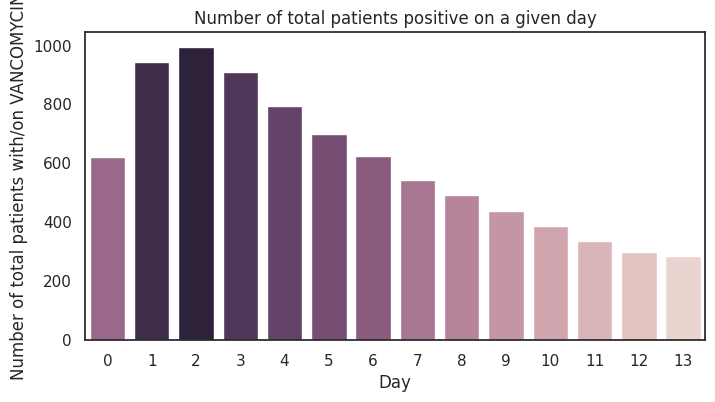

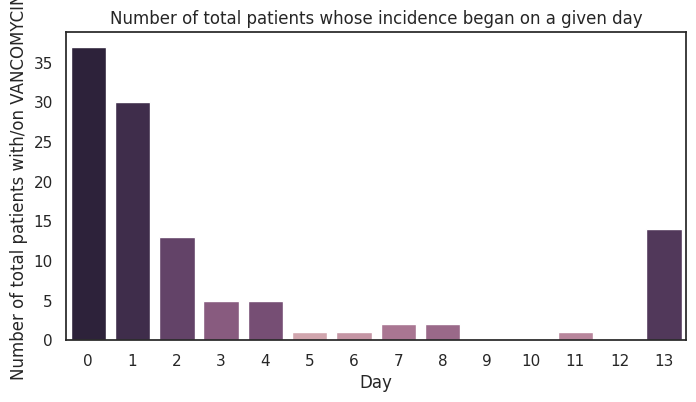

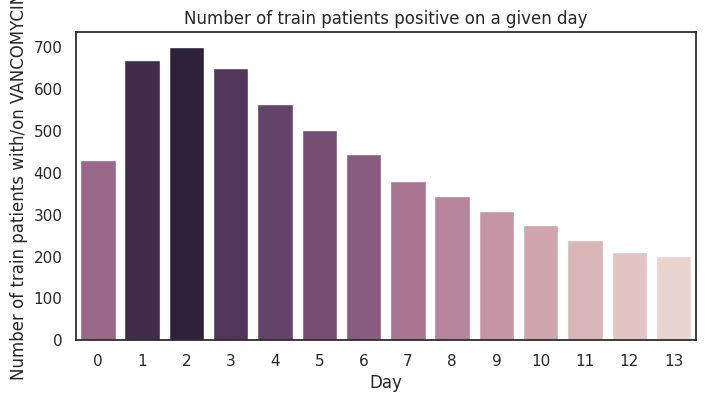

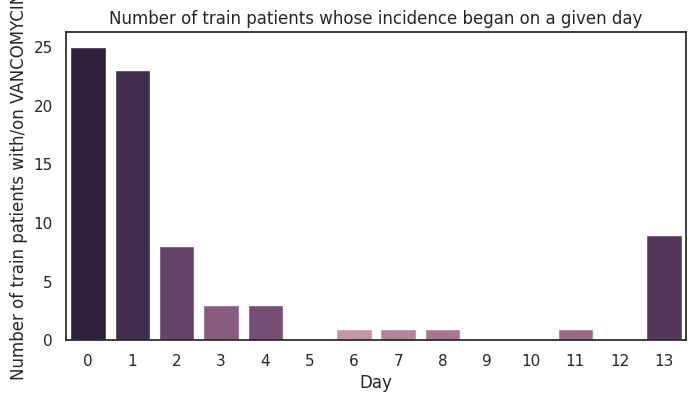

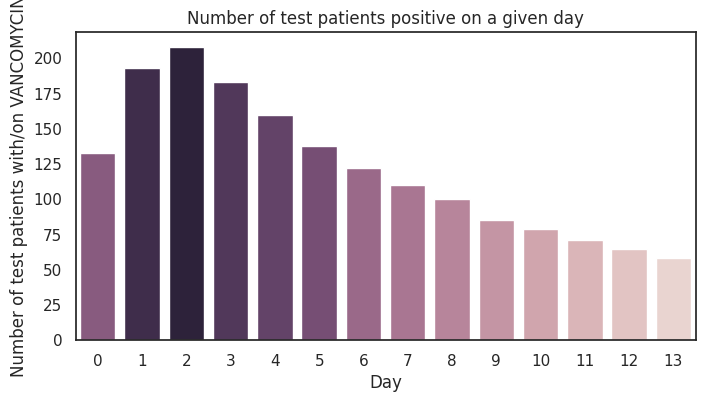

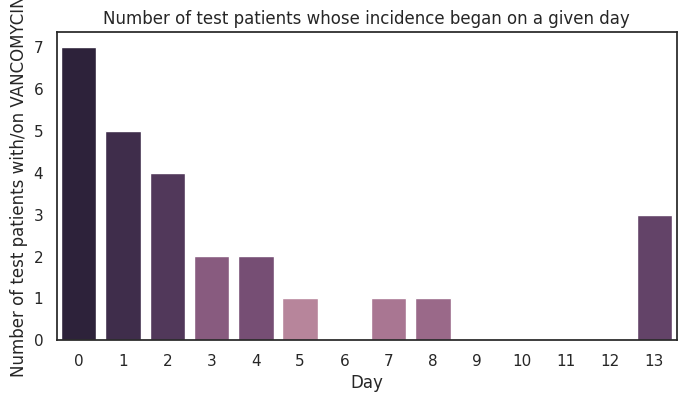

In [ ]:
############################
## SUPPLEMENTARY FIGURE 1 ##
############################

sns.set(style="white")
sns.despine(left=True, bottom=True)

## TOTAL

### When do people have incidents?

# number of people who are positive on a given day
plt.figure(figsize = (8,4))
plt.title('Number of total patients positive on a given day')
plt.ylabel('Number of total patients with/on {0}'.format(target))
plt.xlabel('Day')
y_vector_total = np.nansum(Y_TOTAL, axis=0).squeeze()
print("The total kurtosis is {0} with {1} % of events \
occuring between days 0 and 2".format(kurtosis(y_vector_total),
                                            100*int(np.sum(y_vector_total[0:2]))/np.sum(y_vector_total)))
color_rank = np.argsort(np.argsort(y_vector_total))
sns.barplot(y=y_vector_total, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Total_Patients_Positive_Supplemental_Figure_1.eps'.format(target), format='eps',
             dpi=300, bbox_inches='tight')

# first incident - number of people who had their first incident on a given day
plt.figure(figsize = (8,4))
plt.title('Number of total patients whose incidence began on a given day')
plt.ylabel('Number of total patients with/on {0}'.format(target))
plt.xlabel('Day')
POS_Y_TOTAL = Y_TOTAL[np.nansum(Y_TOTAL.squeeze(), axis=1) == 1]
(days_total, value_counts_total) = np.unique(np.nanargmax(POS_Y_TOTAL, axis=1), return_counts=True)
day_value_dict_total = dict(zip(np.arange(14), np.zeros(14)))
for i in range(len(days_total)):
    day_value_dict_total[days_total[i]] = value_counts_total[i]
y_vector_total_pos = list(day_value_dict_total.values())
color_rank = np.argsort(np.argsort(y_vector_total_pos))
sns.barplot(y=y_vector_total_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
#plt.show()

plt.savefig(ROOT+'figures/{0}_Total_Patients_First_Positive_Supplemental_Figure_1.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## TRAIN

## When do people have incidents?

# number of people who are positive on a given day
plt.figure(figsize = (8,4))
plt.title('Number of train patients positive on a given day')
plt.ylabel('Number of train patients with/on {0}'.format(target))
plt.xlabel('Day')
y_vector_train = np.nansum(Y_TRAIN, axis=0).squeeze()
print("The train kurtosis is {0} with {1} % of events \
occuring between days 0 and 2".format(kurtosis(y_vector_train),
                                            100*int(np.sum(y_vector_train[0:2]))/np.sum(y_vector_train)))
color_rank = np.argsort(np.argsort(y_vector_train))
sns.barplot(y=y_vector_train, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Train_Patients_Positive_Supplemental_Figure_1.eps'.format(target), format='eps',
             dpi=300, bbox_inches='tight')


# first incident - number of people who had their first incident on a given day
plt.figure(figsize = (8,4))
plt.title('Number of train patients whose incidence began on a given day')
plt.ylabel('Number of train patients with/on {0}'.format(target))
plt.xlabel('Day')
POS_Y_TRAIN = Y_TRAIN[np.nansum(Y_TRAIN.squeeze(), axis=1) == 1]
(days_train_pos, value_counts_train_pos) = np.unique(np.nanargmax(POS_Y_TRAIN, axis=1), return_counts=True)
day_value_dict_train_pos = dict(zip(np.arange(14), np.zeros(14)))
for i in range(len(days_train_pos)):
    day_value_dict_train_pos[days_train_pos[i]] = value_counts_train_pos[i]
y_vector_train_pos = list(day_value_dict_train_pos.values())
color_rank = np.argsort(np.argsort(y_vector_train_pos))
sns.barplot(y=y_vector_train_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Train_Patients_First_Positive_Supplemental_Figure_1.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## TEST

# number of people who are positive on a given day
plt.figure(figsize = (8,4))
plt.title('Number of test patients positive on a given day')
plt.ylabel('Number of test patients with/on {0}'.format(target))
plt.xlabel('Day')
y_vector_test = np.nansum(Y_TEST, axis=0).squeeze()
print("The test kurtosis is {0} with {1} % of events \
occuring between days 0 and 2".format(kurtosis(y_vector_test),
                                          100*int(np.sum(y_vector_test[0:2]))/np.sum(y_vector_test)))
color_rank = np.argsort(np.argsort(y_vector_test))
sns.barplot(y=y_vector_test, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Test_Patients_Positive_Supplemental_Figure_1.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

# first incident - nmber of people who had their first incident on a given day
plt.figure(figsize = (8,4))
plt.title('Number of test patients whose incidence began on a given day')
plt.ylabel('Number of test patients with/on {0}'.format(target))
plt.xlabel('Day')
POS_Y_TEST = Y_TEST[np.nansum(Y_TEST.squeeze(), axis=1) == 1]
(days, value_counts) = np.unique(np.nanargmax(POS_Y_TEST, axis=1), return_counts=True)
day_value_dict = dict(zip(np.arange(14), np.zeros(14)))
for i in range(len(days)):
    day_value_dict[days[i]] = value_counts[i]
y_vector_test_pos = list(day_value_dict.values())
color_rank = np.argsort(np.argsort(y_vector_test_pos))
sns.barplot(y=y_vector_test_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Test_Patients_First_Positive_Supplemental_Figure_1.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_80_percent = m_80.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_60_percent = m_60.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_40_percent = m_40.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_20_percent = m_20.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_10_percent = m_10.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_5_percent = m_5.predict(X_TEST_MASK)
del X_TEST_MASK

# AUROC values with models that have been trained with various fractions of training data

28/28 [==============================] - 3s 38ms/step


In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 WITHOUT ATTENTION ###
#############################

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_80_percent_without_attention = m_80_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_60_percent_without_attention = m_60_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_40_percent_without_attention = m_40_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_20_percent_without_attention = m_20_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_10_percent_without_attention = m_10_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_5_percent_without_attention = m_5_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

# AUROC values with models(without attention) that have been trained with various fractions of training data

28/28 [==============================] - 2s 21ms/step


In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

(fpr_100, tpr_100, thresholds_100) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test])
(fpr_80, tpr_80, thresholds_80) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_80_percent[~y_boolmat_test])
(fpr_60, tpr_60, thresholds_60) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_60_percent[~y_boolmat_test])
(fpr_40, tpr_40, thresholds_40) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_40_percent[~y_boolmat_test])
(fpr_20, tpr_20, thresholds_20) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_20_percent[~y_boolmat_test])
(fpr_10, tpr_10, thresholds_10) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_10_percent[~y_boolmat_test])
(fpr_5, tpr_5, thresholds_5) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_5_percent[~y_boolmat_test])

fpr_tprs = [(fpr_100, tpr_100), (fpr_80, tpr_80), (fpr_60, tpr_60),
            (fpr_40, tpr_40), (fpr_20, tpr_20), (fpr_10, tpr_10), (fpr_5, tpr_5)]

In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 WITHOUT ATTENTION ###
#############################

(fpr_100_without_attention, tpr_100_without_attention, thresholds_100_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0_without_attention[~y_boolmat_test])
(fpr_80_without_attention, tpr_80_without_attention, thresholds_80_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_80_percent_without_attention[~y_boolmat_test])
(fpr_60_without_attention, tpr_60_without_attention, thresholds_60_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_60_percent_without_attention[~y_boolmat_test])
(fpr_40_without_attention, tpr_40_without_attention, thresholds_40_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_40_percent_without_attention[~y_boolmat_test])
(fpr_20_without_attention, tpr_20_without_attention, thresholds_20_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_20_percent_without_attention[~y_boolmat_test])
(fpr_10_without_attention, tpr_10_without_attention, thresholds_10_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_10_percent_without_attention[~y_boolmat_test])
(fpr_5_without_attention, tpr_5_without_attention, thresholds_5_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_5_percent_without_attention[~y_boolmat_test])

fpr_tprs_without_attention = [(fpr_100_without_attention, tpr_100_without_attention), (fpr_80_without_attention, tpr_80_without_attention), (fpr_60_without_attention, tpr_60_without_attention),
            (fpr_40_without_attention, tpr_40_without_attention), (fpr_20_without_attention, tpr_20_without_attention), (fpr_10_without_attention, tpr_10_without_attention), (fpr_5_without_attention, tpr_5_without_attention)]

0.848758148858242
0.8526205387146262
0.8395599097725637
0.810552395608676
0.7240235072377239
0.6839896320395731
0.6414222474805121
PPV for full model is 0.7021466905187835
Sensitivity for full model is 0.46
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      5511
         1.0       0.70      0.46      0.56      1705

    accuracy                           0.83      7216
   macro avg       0.78      0.70      0.72      7216
weighted avg       0.81      0.83      0.81      7216



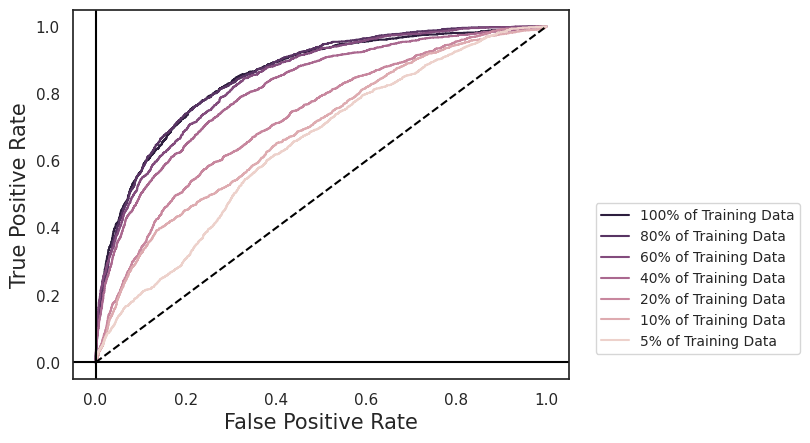

In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[::-1], fpr_tprs, [100,80,60,40,20,10,5]):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0}% of Training Data'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.48, 0.05))
plt.savefig(ROOT+'figures/{0}_less_data_roc_curves_Supplemental_Figure_2.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

# 100 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test]))
# 80 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_80_percent[~y_boolmat_test]))
# 60 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_60_percent[~y_boolmat_test]))
# 40 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_40_percent[~y_boolmat_test]))
# 20 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_20_percent[~y_boolmat_test]))
# 10 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_10_percent[~y_boolmat_test]))
# 5 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_5_percent[~y_boolmat_test]))

## 100% Training Data ##
TN, FP, FN, TP = confusion_matrix(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test])).ravel()
PPV = TP/(TP+FP)
print("PPV for full model is {0}".format(PPV))
CR = classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print("Sensitivity for full model is {0}".format(CR.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test])))

0.8955904240572442
0.895513691358951
0.8850832592346631
0.8773194746204739
0.8551179166593499
0.7963468424388227
0.7537351849220779
PPV for full model(without attention) is 0.6871859296482412
Sensitivity for full model(without attention) is 0.64
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      5511
         1.0       0.69      0.64      0.66      1705

    accuracy                           0.85      7216
   macro avg       0.79      0.78      0.78      7216
weighted avg       0.84      0.85      0.84      7216



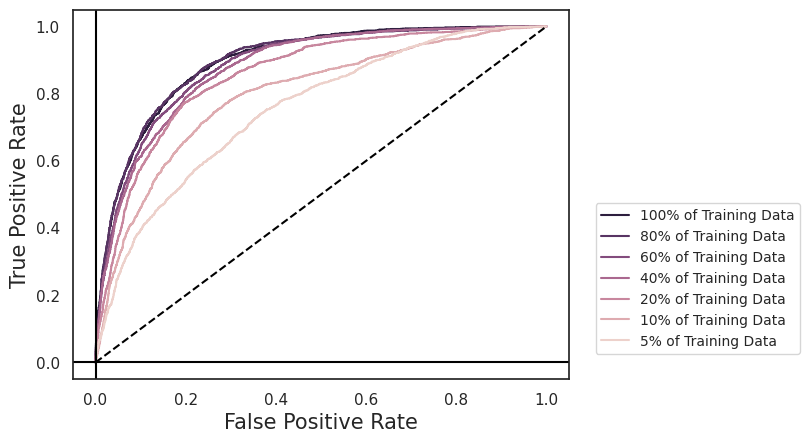

In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 WITHOUT ATTENTION ###
#############################

fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[::-1], fpr_tprs_without_attention, [100,80,60,40,20,10,5]):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0}% of Training Data'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.48, 0.05))
plt.savefig(ROOT+'figures/{0}_less_data_roc_curves_Supplemental_Figure_2_without_attention.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

# 100 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0_without_attention[~y_boolmat_test]))
# 80 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_80_percent_without_attention[~y_boolmat_test]))
# 60 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_60_percent_without_attention[~y_boolmat_test]))
# 40 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_40_percent_without_attention[~y_boolmat_test]))
# 20 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_20_percent_without_attention[~y_boolmat_test]))
# 10 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_10_percent_without_attention[~y_boolmat_test]))
# 5 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_5_percent_without_attention[~y_boolmat_test]))

## 100% Training Data ##
TN_without_attention, FP_without_attention, FN_without_attention, TP_without_attention = confusion_matrix(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0_without_attention[~y_boolmat_test])).ravel()
PPV_without_attention = TP_without_attention/(TP_without_attention+FP_without_attention)
print("PPV for full model(without attention) is {0}".format(PPV_without_attention))
CR_without_attention = classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0_without_attention[~y_boolmat_test]))

print("Sensitivity for full model(without attention) is {0}".format(CR_without_attention.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0_without_attention[~y_boolmat_test])))

In [ ]:
# GET ACTIVATIONS MATRIX ; OUTPUT IS (BATCH_SIZE, TIME_STEPS, FEATURES)

activations = get_activations(m, X_TEST, print_shape_only=True, layer_name='attention_vec')[0]
activations[x_boolmat_test] = np.nan

# AVERAGE THE ATTENTION MATRIX OVER FEATURES ; OUTPUT IS BATCH_SIZE, TIME_STEPS
attention_matrix = np.nanmean(activations, axis=2).squeeze()

# AVERAGE ATTENTION VECTOR ACROSS SAMPLES ; OUTPUT IS 1D TIME_STEPS
attention_vector_final = np.nanmean(attention_matrix, axis=0)

# This allows us to rank color intensity by activation. We sort the intensities, then argsort the indices ##
color_order = np.argsort(attention_vector_final, axis=0)
color_order_order = np.argsort(color_order)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(
<ipython-input-161-02a72c2243f8>:7: RuntimeWarning: Mean of empty slice
  attention_matrix = np.nanmean(activations, axis=2).squeeze()


In [ ]:
attention_vector_final

array([0.10419367, 0.08765447, 0.0771189 , 0.07301676, 0.0838332 ,
       0.0574194 , 0.0710417 , 0.06086222, 0.06559445, 0.05306421,
       0.05680618, 0.05776683, 0.06747448, 0.05073266], dtype=float32)

In [ ]:
''' Due to the way features are selectd from the EMR and the fact potassium can be a
delivered medication or a lab value, special care was taken to ensure proper representation on heatmaps '''

if 'digoxin(?!.*fab)' in features:
    indexy = features.index('digoxin(?!.*fab)')
    features[indexy] = 'digoxin'

if 'potassium_y' in features:
    indexy = features.index('potassium_y')
    features[indexy] = 'potassium_med'

if 'potassium_x' in features:
    indexy = features.index('potassium_x')
    features[indexy] = 'potassium'

if 'cipfloxacin' in features:
    indexy = features.index('cipfloxacin')
    features[indexy] = 'ciprofloxacin'

features = [feature.lower() for feature in features]

In [ ]:
## FEATURES BY CATEGORY ##

cbc_diff_features = ['RBCs', 'WBCs', 'platelets', 'hemoglobin', 'hemocrit',
                              'atypical lymphocytes', 'bands', 'basophils', 'eosinophils', 'neutrophils',
                              'lymphocytes', 'monocytes', 'polymorphonuclear leukocytes']

vital_features = ['temperature (F)', 'heart rate', 'respiratory rate', 'systolic', 'diastolic',
                  'pulse oximetry']

lab_features = ['troponin', 'HDL', 'LDL', 'BUN', 'INR', 'PTT', 'PT', 'triglycerides', 'creatinine',
                  'glucose', 'sodium', 'potassium', 'chloride', 'bicarbonate',
                  'blood culture', 'urine culture', 'surface culture', 'sputum' +
                  ' culture', 'wound culture', 'Inspired O2 Fraction', 'central venous pressure',
                  'PEEP Set', 'tidal volume', 'anion gap']

demographic_features = ['age', 'm', 'black', 'daily weight', 'tobacco', 'diabetes', 'history of CV events']

med_features = ['epoetin', 'warfarin', 'heparin', 'enoxaparin', 'fondaparinux',
                                      'asprin', 'ketorolac', 'acetominophen',
                                      'insulin', 'glucagon',
                                      'potassium_med', 'calcium gluconate',
                                      'fentanyl', 'magensium sulfate',
                                      'D5W', 'dextrose',
                                      'ranitidine', 'ondansetron', 'pantoprazole', 'metoclopramide',
                                      'lisinopril', 'captopril', 'statin',
                                      'hydralazine', 'diltiazem',
                                      'carvedilol', 'metoprolol', 'labetalol', 'atenolol',
                                      'amiodarone', 'digoxin',
                                      'clopidogrel', 'nitroprusside', 'nitroglycerin',
                                      'vasopressin', 'hydrochlorothiazide', 'furosemide',
                                      'atropine', 'neostigmine',
                                      'levothyroxine',
                                      'oxycodone', 'hydromorphone', 'fentanyl citrate',
                                      'tacrolimus', 'prednisone',
                                      'phenylephrine', 'norepinephrine',
                                      'haloperidol', 'phenytoin', 'trazodone', 'levetiracetam',
                                      'diazepam', 'clonazepam',
                                      'propofol', 'zolpidem', 'midazolam',
                                      'albuterol', 'ipratropium',
                                      'diphenhydramine',
                                      '0.9% Sodium Chloride',
                                      'phytonadione',
                                      'metronidazole',
                                      'cefazolin', 'cefepime', 'vancomycin', 'levofloxacin',
                                      'ciprofloxacin', 'fluconazole',
                                      'meropenem', 'ceftriaxone', 'piperacillin',
                                      'ampicillin-sulbactam', 'nafcillin', 'oxacillin',
                                      'amoxicillin', 'penicillin', 'SMX-TMP']

cbc_diff_features = [[i.lower(), i.lower()+'_min', i.lower()+'_max', i.lower()+'_std'] for i in cbc_diff_features]
vital_features = [[i.lower(), i.lower()+'_min', i.lower()+'_max', i.lower()+'_std'] for i in vital_features]
lab_features = [[i.lower(), i.lower()+'_min', i.lower()+'_max', i.lower()+'_std'] for i in lab_features]
demographic_features = [i.lower() for i in demographic_features]
med_features = [i.lower() for i in med_features]

cbc_diff_feature_array = np.array(cbc_diff_features).flatten()
vital_features_array = np.array(vital_features).flatten()
lab_features_array = np.array(lab_features).flatten()
demographic_feature_array = np.array(demographic_features).flatten()
med_features_array = np.array(med_features).flatten()

features_built = np.hstack([cbc_diff_feature_array,vital_features_array,
                            lab_features_array,demographic_feature_array,med_features_array])

features_built_reduced = [i for i in features_built if i in features]

In [ ]:
## Identifies the index in the features list in the desired order ##
arranged_indices = [features.index(i) for i in features_built_reduced]

In [ ]:
## This is a sanity check to ensure that features_built_reduced has the same number of elements as our target ##

print(len(features_SEPSIS))
print(len(features_MI))
print(len(features_VANCOMYCIN))
print('\n')
print(len(features_built))
print(len(features_built_reduced))

224
220
223


256
223


#### Evaluation

Display Evaluation Results for VANCOMYCIN

In [ ]:
##############
## FIGURE 1 ##
##############

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 1
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_1 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 2
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_2 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 3
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_3 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 4
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_4 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 5
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_5 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 6
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_6 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 7
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_7 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 8
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_8 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 9
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_9 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 10
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_10 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 11
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_11 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 12
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_12 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 13
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_13 = m.predict(X_TEST_MASK)
del X_TEST_MASK

28/28 [==============================] - 1s 33ms/step


In [ ]:
##############
## FIGURE 1 without attention ##
##############

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 1
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_1_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 2
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_2_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 3
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_3_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 4
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_4_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 5
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_5_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 6
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_6_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 7
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_7_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 8
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_8_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 9
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_9_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 10
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_10_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 11
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_11_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 12
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_12_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 13
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_13_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

28/28 [==============================] - 1s 38ms/step


In [ ]:
##############
## FIGURE 1 ##
##############

(fpr_mask_0, tpr_mask_0, thresholds_mask_0) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test])
(fpr_mask_1, tpr_mask_1, thresholds_mask_1) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_1[~y_boolmat_test])
(fpr_mask_2, tpr_mask_2, thresholds_mask_2) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_2[~y_boolmat_test])
(fpr_mask_3, tpr_mask_3, thresholds_mask_3) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_3[~y_boolmat_test])
(fpr_mask_4, tpr_mask_4, thresholds_mask_4) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_4[~y_boolmat_test])
(fpr_mask_5, tpr_mask_5, thresholds_mask_5) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_5[~y_boolmat_test])
(fpr_mask_6, tpr_mask_6, thresholds_mask_6) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_6[~y_boolmat_test])
(fpr_mask_7, tpr_mask_7, thresholds_mask_7) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_7[~y_boolmat_test])
(fpr_mask_8, tpr_mask_8, thresholds_mask_8) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_8[~y_boolmat_test])
(fpr_mask_9, tpr_mask_9, thresholds_mask_9) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_9[~y_boolmat_test])
(fpr_mask_10, tpr_mask_10, thresholds_mask_10) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_10[~y_boolmat_test])
(fpr_mask_11, tpr_mask_11, thresholds_mask_11) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_11[~y_boolmat_test])
(fpr_mask_12, tpr_mask_12, thresholds_mask_12) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_12[~y_boolmat_test])
(fpr_mask_13, tpr_mask_13, thresholds_mask_13) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_13[~y_boolmat_test])

fpr_tprs = [(fpr_mask_1, tpr_mask_1), (fpr_mask_2, tpr_mask_2), (fpr_mask_3, tpr_mask_3), (fpr_mask_4, tpr_mask_4),
            (fpr_mask_5, tpr_mask_5), (fpr_mask_6, tpr_mask_6), (fpr_mask_7, tpr_mask_7), (fpr_mask_8, tpr_mask_8),
            (fpr_mask_9, tpr_mask_9), (fpr_mask_10, tpr_mask_10), (fpr_mask_11, tpr_mask_11), (fpr_mask_12, tpr_mask_12),
            (fpr_mask_13, tpr_mask_13), (fpr_mask_0, tpr_mask_0)]

print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_13[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_12[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_11[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_10[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_9[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_8[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_7[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_6[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_5[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_4[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_3[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_2[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_1[~y_boolmat_test]))

0.848758148858242
0.8489382205995899
0.8473731821880102
0.8475675149301504
0.8314066614837508
0.8332169571813451
0.8376356857066992
0.8331639573425796
0.8285695737291081
0.8091075114500406
0.7903835091746658
0.7564299819449345
0.7109283432601605
0.6291356503202606


In [ ]:
##############
## FIGURE 1 without attention ##
##############

(fpr_mask_0_without_attention, tpr_mask_0_without_attention, thresholds_mask_0_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0_without_attention[~y_boolmat_test])
(fpr_mask_1_without_attention, tpr_mask_1_without_attention, thresholds_mask_1_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_1_without_attention[~y_boolmat_test])
(fpr_mask_2_without_attention, tpr_mask_2_without_attention, thresholds_mask_2_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_2_without_attention[~y_boolmat_test])
(fpr_mask_3_without_attention, tpr_mask_3_without_attention, thresholds_mask_3_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_3_without_attention[~y_boolmat_test])
(fpr_mask_4_without_attention, tpr_mask_4_without_attention, thresholds_mask_4_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_4_without_attention[~y_boolmat_test])
(fpr_mask_5_without_attention, tpr_mask_5_without_attention, thresholds_mask_5_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_5_without_attention[~y_boolmat_test])
(fpr_mask_6_without_attention, tpr_mask_6_without_attention, thresholds_mask_6_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_6_without_attention[~y_boolmat_test])
(fpr_mask_7_without_attention, tpr_mask_7_without_attention, thresholds_mask_7_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_7_without_attention[~y_boolmat_test])
(fpr_mask_8_without_attention, tpr_mask_8_without_attention, thresholds_mask_8_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_8_without_attention[~y_boolmat_test])
(fpr_mask_9_without_attention, tpr_mask_9_without_attention, thresholds_mask_9_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_9_without_attention[~y_boolmat_test])
(fpr_mask_10_without_attention, tpr_mask_10_without_attention, thresholds_mask_10_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_10_without_attention[~y_boolmat_test])
(fpr_mask_11_without_attention, tpr_mask_11_without_attention, thresholds_mask_11_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_11_without_attention[~y_boolmat_test])
(fpr_mask_12_without_attention, tpr_mask_12_without_attention, thresholds_mask_12_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_12_without_attention[~y_boolmat_test])
(fpr_mask_13_without_attention, tpr_mask_13_without_attention, thresholds_mask_13_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_13_without_attention[~y_boolmat_test])

fpr_tprs_without_attention = [(fpr_mask_1_without_attention, tpr_mask_1_without_attention), (fpr_mask_2_without_attention, tpr_mask_2_without_attention), (fpr_mask_3_without_attention, tpr_mask_3_without_attention), (fpr_mask_4_without_attention, tpr_mask_4_without_attention),
            (fpr_mask_5_without_attention, tpr_mask_5_without_attention), (fpr_mask_6_without_attention, tpr_mask_6_without_attention), (fpr_mask_7_without_attention, tpr_mask_7_without_attention), (fpr_mask_8_without_attention, tpr_mask_8_without_attention),
            (fpr_mask_9_without_attention, tpr_mask_9_without_attention), (fpr_mask_10_without_attention, tpr_mask_10_without_attention), (fpr_mask_11_without_attention, tpr_mask_11_without_attention), (fpr_mask_12_without_attention, tpr_mask_12_without_attention),
            (fpr_mask_13_without_attention, tpr_mask_13_without_attention), (fpr_mask_0_without_attention, tpr_mask_0_without_attention)]

print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_13_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_12_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_11_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_10_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_9_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_8_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_7_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_6_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_5_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_4_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_3_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_2_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_1_without_attention[~y_boolmat_test]))

0.8955904240572442
0.8948123481110293
0.8938595749051085
0.8905474042583987
0.8821560291839675
0.8743853801328295
0.863337627597378
0.8493471069058898
0.8362771125304709
0.8115652991537585
0.7940599738938545
0.7807610585281051
0.748685513537042
0.6836482194235896


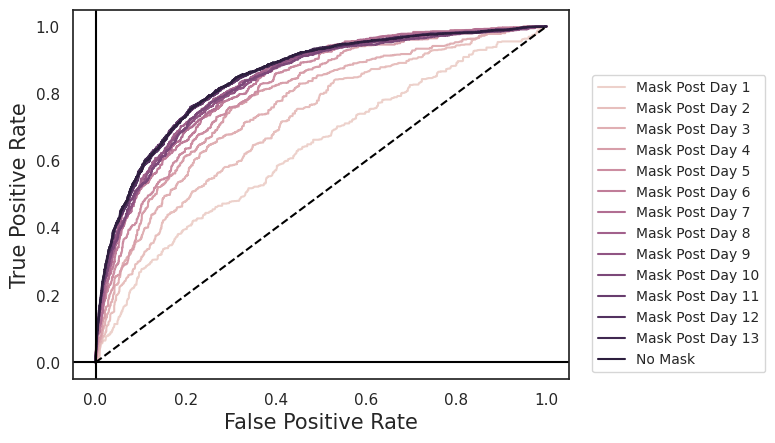

In [ ]:
##############
## FIGURE 1 ##
##############

fig, ax = plt.subplots()
ax.set_facecolor('white')

counter = 1

for color, fpr_tpr_tuple in zip(color_list, fpr_tprs):
    if counter != 14:
        plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='Mask Post Day {0}'.format(counter), color=color)
        counter = counter+1
    elif counter == 14:
        plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='No Mask', color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.41, 0))
plt.savefig(ROOT+'figures/{0}_roc_curves_Fig_1.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

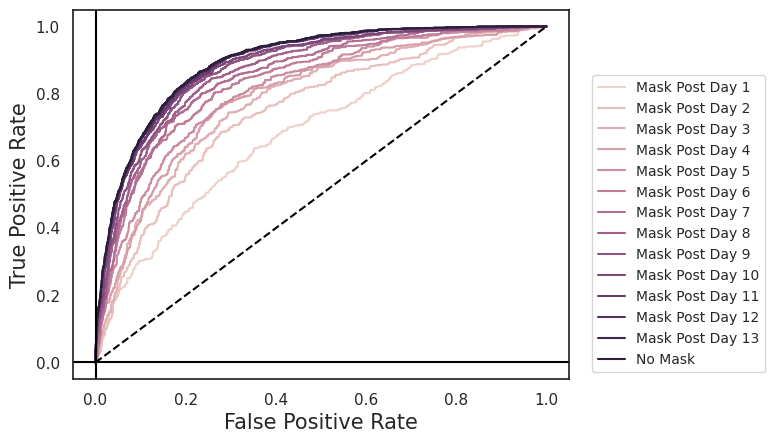

In [ ]:
##############
## FIGURE 1 without attention ##
##############

fig, ax = plt.subplots()
ax.set_facecolor('white')

counter = 1

for color, fpr_tpr_tuple_without_attention in zip(color_list, fpr_tprs_without_attention):
    if counter != 14:
        plt.plot(fpr_tpr_tuple_without_attention[0], fpr_tpr_tuple_without_attention[1], label='Mask Post Day {0}'.format(counter), color=color)
        counter = counter+1
    elif counter == 14:
        plt.plot(fpr_tpr_tuple_without_attention[0], fpr_tpr_tuple_without_attention[1], label='No Mask', color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.41, 0))
plt.savefig(ROOT+'figures/{0}_roc_curves_Fig_1_without_attention.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

In [ ]:
##############################
## FIGURE 2 LAG EXPERIMENTS ##
##############################

### 1 DAY LAGGED EXPERIMENTS ###

### Y_PRED_mask_0_LAG_1 ###

Y_PRED_mask_0_LAG_1 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(1,13)], axis=0)
Y_PRED_mask_0_LAG_2 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(2,13)], axis=0)
Y_PRED_mask_0_LAG_3 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(3,13)], axis=0)
Y_PRED_mask_0_LAG_4 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(4,13)], axis=0)
Y_PRED_mask_0_LAG_5 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(5,13)], axis=0)
Y_PRED_mask_0_LAG_6 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(6,13)], axis=0)
Y_PRED_mask_0_LAG_7 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(7,13)], axis=0)

# below is an equivalent representation

# Y_PRED_mask_0_LAG_1 = np.concatenate([Y_PRED_mask_0[:,1][~y_boolmat_test[:,1,::]],
#                                     Y_PRED_mask_0[:,2][~y_boolmat_test[:,2,::]],
#                                     Y_PRED_mask_0[:,3][~y_boolmat_test[:,3,::]],
#                                     Y_PRED_mask_0[:,4][~y_boolmat_test[:,4,::]],
#                                     Y_PRED_mask_0[:,5][~y_boolmat_test[:,5,::]],
#                                     Y_PRED_mask_0[:,6][~y_boolmat_test[:,6,::]],
#                                     Y_PRED_mask_0[:,7][~y_boolmat_test[:,7,::]],
#                                     Y_PRED_mask_0[:,8][~y_boolmat_test[:,8,::]],
#                                     Y_PRED_mask_0[:,9][~y_boolmat_test[:,9,::]],
#                                     Y_PRED_mask_0[:,10][~y_boolmat_test[:,10,::]],
#                                     Y_PRED_mask_0[:,11][~y_boolmat_test[:,11,::]],
#                                     Y_PRED_mask_0[:,12][~y_boolmat_test[:,12,::]],
#                                     Y_PRED_mask_0[:,13][~y_boolmat_test[:,13,::]]], axis=0)

### all the first day soft every person, all the second days, third days, in a 1D vector

Y_TEST_LAG_1 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(1,14)], axis=0)
Y_TEST_LAG_2 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(2,14)], axis=0)
Y_TEST_LAG_3 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(3,14)], axis=0)
Y_TEST_LAG_4 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(4,14)], axis=0)
Y_TEST_LAG_5 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(5,14)], axis=0)
Y_TEST_LAG_6 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(6,14)], axis=0)
Y_TEST_LAG_7 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(7,14)], axis=0)

#############
## Y_PREDS ##
#############

Y_PRED_LAG_1 = np.concatenate([Y_PRED_mask_1[:,1,::][~y_boolmat_test[:,1,::]],
                             Y_PRED_mask_2[:,2,::][~y_boolmat_test[:,2,::]],
                             Y_PRED_mask_3[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_4[:,4,::][~y_boolmat_test[:,4,:]],
                             Y_PRED_mask_5[:,5,::][~y_boolmat_test[:,5,::]],
                             Y_PRED_mask_6[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_7[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_8[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_9[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_10[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_11[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_12[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_13[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_2 = np.concatenate([Y_PRED_mask_1[:,2,::][~y_boolmat_test[:,2,::]],
                             Y_PRED_mask_2[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_3[:,4,::][~y_boolmat_test[:,4,::]],
                             Y_PRED_mask_4[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_5[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_6[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_7[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_8[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_9[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_10[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_11[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_12[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_3 = np.concatenate([Y_PRED_mask_1[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_2[:,4,::][~y_boolmat_test[:,4,::]],
                             Y_PRED_mask_3[:,5,::][~y_boolmat_test[:,5,::]],
                             Y_PRED_mask_4[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_5[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_6[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_7[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_8[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_9[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_10[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_11[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_4 = np.concatenate([Y_PRED_mask_1[:,4,::][~y_boolmat_test[:,4,:]],
                             Y_PRED_mask_2[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_3[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_4[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_5[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_6[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_7[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_8[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_10[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_5 = np.concatenate([Y_PRED_mask_1[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_2[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_3[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_4[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_6[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_7[:,11,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_8[:,12,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9[:,13,::][~y_boolmat_test[:,12,::]]], axis=0)

Y_PRED_LAG_5 = np.concatenate([Y_PRED_mask_1[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_2[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_3[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_4[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_6[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_7[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_8[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_9[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_6 = np.concatenate([Y_PRED_mask_1[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_2[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_3[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_4[:,9,::][~y_boolmat_test[:,9,:]],
                             Y_PRED_mask_5[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_6[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_7[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_8[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_7 = np.concatenate([Y_PRED_mask_1[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_2[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_3[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_4[:,10,::][~y_boolmat_test[:,10,:]],
                             Y_PRED_mask_5[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_6[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_7[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

## LAG ROC ##

# Day 1 Lag
print(roc_auc_score(Y_TEST_LAG_1, Y_PRED_LAG_1))
# Day 2 Lag
print(roc_auc_score(Y_TEST_LAG_2, Y_PRED_LAG_2))
# # Day 3 Lag
print(roc_auc_score(Y_TEST_LAG_3, Y_PRED_LAG_3))
# Day 4 Lag
print(roc_auc_score(Y_TEST_LAG_4, Y_PRED_LAG_4))
# Day 5 Lag
print(roc_auc_score(Y_TEST_LAG_5, Y_PRED_LAG_5))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_6, Y_PRED_LAG_6))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_7, Y_PRED_LAG_7))

confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1))

## 100% Training Data with 1 day lag ##
TN, FP, FN, TP = confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1)).ravel()
PPV = TP/(TP+FP)
print("PPV for full model w/ 1 day lag is {0}".format(PPV))
CR = classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1))

print("Sensitivity for full model w/ 1 day lag is {0}".format(CR.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1)))

0.7979020566900425
0.7447781073401012
0.6975720024945263
0.6726965901134878
0.6589808893108727
0.6459666116308934
0.6357096304930022
PPV for full model w/ 1 day lag is 0.6475869809203143
Sensitivity for full model w/ 1 day lag is 0.37
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      4771
         1.0       0.65      0.37      0.47      1572

    accuracy                           0.79      6343
   macro avg       0.73      0.65      0.67      6343
weighted avg       0.78      0.79      0.77      6343



In [ ]:
##############################
## FIGURE 2 LAG EXPERIMENTS WITHOUT ATTENTION ##
##############################

### 1 DAY LAGGED EXPERIMENTS ###

### Y_PRED_mask_0_LAG_1 ###

Y_PRED_mask_0_LAG_1_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(1,13)], axis=0)
Y_PRED_mask_0_LAG_2_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(2,13)], axis=0)
Y_PRED_mask_0_LAG_3_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(3,13)], axis=0)
Y_PRED_mask_0_LAG_4_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(4,13)], axis=0)
Y_PRED_mask_0_LAG_5_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(5,13)], axis=0)
Y_PRED_mask_0_LAG_6_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(6,13)], axis=0)
Y_PRED_mask_0_LAG_7_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(7,13)], axis=0)

# below is an equivalent representation

# Y_PRED_mask_0_LAG_1 = np.concatenate([Y_PRED_mask_0[:,1][~y_boolmat_test[:,1,::]],
#                                     Y_PRED_mask_0[:,2][~y_boolmat_test[:,2,::]],
#                                     Y_PRED_mask_0[:,3][~y_boolmat_test[:,3,::]],
#                                     Y_PRED_mask_0[:,4][~y_boolmat_test[:,4,::]],
#                                     Y_PRED_mask_0[:,5][~y_boolmat_test[:,5,::]],
#                                     Y_PRED_mask_0[:,6][~y_boolmat_test[:,6,::]],
#                                     Y_PRED_mask_0[:,7][~y_boolmat_test[:,7,::]],
#                                     Y_PRED_mask_0[:,8][~y_boolmat_test[:,8,::]],
#                                     Y_PRED_mask_0[:,9][~y_boolmat_test[:,9,::]],
#                                     Y_PRED_mask_0[:,10][~y_boolmat_test[:,10,::]],
#                                     Y_PRED_mask_0[:,11][~y_boolmat_test[:,11,::]],
#                                     Y_PRED_mask_0[:,12][~y_boolmat_test[:,12,::]],
#                                     Y_PRED_mask_0[:,13][~y_boolmat_test[:,13,::]]], axis=0)

### all the first day soft every person, all the second days, third days, in a 1D vector

Y_TEST_LAG_1 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(1,14)], axis=0)
Y_TEST_LAG_2 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(2,14)], axis=0)
Y_TEST_LAG_3 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(3,14)], axis=0)
Y_TEST_LAG_4 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(4,14)], axis=0)
Y_TEST_LAG_5 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(5,14)], axis=0)
Y_TEST_LAG_6 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(6,14)], axis=0)
Y_TEST_LAG_7 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(7,14)], axis=0)

#############
## Y_PREDS ##
#############

Y_PRED_LAG_1_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,1,::][~y_boolmat_test[:,1,::]],
                             Y_PRED_mask_2_without_attention[:,2,::][~y_boolmat_test[:,2,::]],
                             Y_PRED_mask_3_without_attention[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_4_without_attention[:,4,::][~y_boolmat_test[:,4,:]],
                             Y_PRED_mask_5_without_attention[:,5,::][~y_boolmat_test[:,5,::]],
                             Y_PRED_mask_6_without_attention[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_7_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_8_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_9_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_10_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_11_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_12_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_13_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_2_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,2,::][~y_boolmat_test[:,2,::]],
                             Y_PRED_mask_2_without_attention[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_3_without_attention[:,4,::][~y_boolmat_test[:,4,::]],
                             Y_PRED_mask_4_without_attention[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_5_without_attention[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_6_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_7_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_8_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_9_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_10_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_11_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_12_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_3_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_2_without_attention[:,4,::][~y_boolmat_test[:,4,::]],
                             Y_PRED_mask_3_without_attention[:,5,::][~y_boolmat_test[:,5,::]],
                             Y_PRED_mask_4_without_attention[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_5_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_6_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_7_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_8_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_9_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_10_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_11_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_4_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,4,::][~y_boolmat_test[:,4,:]],
                             Y_PRED_mask_2_without_attention[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_3_without_attention[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_4_without_attention[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_5_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_6_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_7_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_8_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_10_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_5_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_2_without_attention[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_3_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_4_without_attention[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_6_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_7_without_attention[:,11,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_8_without_attention[:,12,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9_without_attention[:,13,::][~y_boolmat_test[:,12,::]]], axis=0)

Y_PRED_LAG_5_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_2_without_attention[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_3_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_4_without_attention[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_6_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_7_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_8_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_9_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_6_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_2_without_attention[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_3_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_4_without_attention[:,9,::][~y_boolmat_test[:,9,:]],
                             Y_PRED_mask_5_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_6_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_7_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_8_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_7_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_2_without_attention[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_3_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_4_without_attention[:,10,::][~y_boolmat_test[:,10,:]],
                             Y_PRED_mask_5_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_6_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_7_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

## LAG ROC ##

# Day 1 Lag
print(roc_auc_score(Y_TEST_LAG_1, Y_PRED_LAG_1_without_attention))
# Day 2 Lag
print(roc_auc_score(Y_TEST_LAG_2, Y_PRED_LAG_2_without_attention))
# # Day 3 Lag
print(roc_auc_score(Y_TEST_LAG_3, Y_PRED_LAG_3_without_attention))
# Day 4 Lag
print(roc_auc_score(Y_TEST_LAG_4, Y_PRED_LAG_4_without_attention))
# Day 5 Lag
print(roc_auc_score(Y_TEST_LAG_5, Y_PRED_LAG_5_without_attention))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_6, Y_PRED_LAG_6_without_attention))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_7, Y_PRED_LAG_7_without_attention))

confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1_without_attention))

## 100% Training Data with 1 day lag ##
TN_without_attention, FP_without_attention, FN_without_attention, TP_without_attention = confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1_without_attention)).ravel()
PPV_without_attention = TP_without_attention/(TP_without_attention+FP_without_attention)
print("PPV for full model(without attention)  w/ 1 day lag is {0}".format(PPV_without_attention))
CR_without_attention = classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1_without_attention))

print("Sensitivity for full model(without attention) w/ 1 day lag is {0}".format(CR_without_attention.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1_without_attention)))

0.8340679988245352
0.7775322259779289
0.7231009560309095
0.6924088722911438
0.6758691969768447
0.6538954320308201
0.6316390922922246
PPV for full model(without attention)  w/ 1 day lag is 0.6201760324983073
Sensitivity for full model(without attention) w/ 1 day lag is 0.58
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      4771
         1.0       0.62      0.58      0.60      1572

    accuracy                           0.81      6343
   macro avg       0.74      0.73      0.74      6343
weighted avg       0.80      0.81      0.81      6343



In [ ]:
(fpr_mask_1, tpr_mask_1, thresholds_mask_1) = roc_curve(Y_TEST_LAG_1, Y_PRED_LAG_1)
(fpr_mask_2, tpr_mask_2, thresholds_mask_2) = roc_curve(Y_TEST_LAG_2, Y_PRED_LAG_2)
(fpr_mask_3, tpr_mask_3, thresholds_mask_3) = roc_curve(Y_TEST_LAG_3, Y_PRED_LAG_3)
(fpr_mask_4, tpr_mask_4, thresholds_mask_4) = roc_curve(Y_TEST_LAG_4, Y_PRED_LAG_4)
(fpr_mask_5, tpr_mask_5, thresholds_mask_5) = roc_curve(Y_TEST_LAG_5, Y_PRED_LAG_5)
(fpr_mask_6, tpr_mask_6, thresholds_mask_6) = roc_curve(Y_TEST_LAG_6, Y_PRED_LAG_6)
(fpr_mask_7, tpr_mask_7, thresholds_mask_7) = roc_curve(Y_TEST_LAG_7, Y_PRED_LAG_7)

fpr_tprs = [(fpr_mask_1, tpr_mask_1), (fpr_mask_2, tpr_mask_2), (fpr_mask_3, tpr_mask_3), (fpr_mask_4, tpr_mask_4),
            (fpr_mask_5, tpr_mask_5), (fpr_mask_6, tpr_mask_6), (fpr_mask_7, tpr_mask_7), (fpr_mask_8, tpr_mask_8),
            (fpr_mask_9, tpr_mask_9), (fpr_mask_10, tpr_mask_10), (fpr_mask_11, tpr_mask_11), (fpr_mask_12, tpr_mask_12),
            (fpr_mask_13, tpr_mask_13), (fpr_mask_0, tpr_mask_0)]

In [ ]:
(fpr_mask_1_without_attention, tpr_mask_1_without_attention, thresholds_mask_1_without_attention) = roc_curve(Y_TEST_LAG_1, Y_PRED_LAG_1_without_attention)
(fpr_mask_2_without_attention, tpr_mask_2_without_attention, thresholds_mask_2_without_attention) = roc_curve(Y_TEST_LAG_2, Y_PRED_LAG_2_without_attention)
(fpr_mask_3_without_attention, tpr_mask_3_without_attention, thresholds_mask_3_without_attention) = roc_curve(Y_TEST_LAG_3, Y_PRED_LAG_3_without_attention)
(fpr_mask_4_without_attention, tpr_mask_4_without_attention, thresholds_mask_4_without_attention) = roc_curve(Y_TEST_LAG_4, Y_PRED_LAG_4_without_attention)
(fpr_mask_5_without_attention, tpr_mask_5_without_attention, thresholds_mask_5_without_attention) = roc_curve(Y_TEST_LAG_5, Y_PRED_LAG_5_without_attention)
(fpr_mask_6_without_attention, tpr_mask_6_without_attention, thresholds_mask_6_without_attention) = roc_curve(Y_TEST_LAG_6, Y_PRED_LAG_6_without_attention)
(fpr_mask_7_without_attention, tpr_mask_7_without_attention, thresholds_mask_7_without_attention) = roc_curve(Y_TEST_LAG_7, Y_PRED_LAG_7_without_attention)

fpr_tprs_without_attention = [(fpr_mask_1_without_attention, tpr_mask_1_without_attention), (fpr_mask_2_without_attention, tpr_mask_2_without_attention), (fpr_mask_3_without_attention, tpr_mask_3_without_attention), (fpr_mask_4_without_attention, tpr_mask_4_without_attention),
            (fpr_mask_5_without_attention, tpr_mask_5_without_attention), (fpr_mask_6_without_attention, tpr_mask_6_without_attention), (fpr_mask_7_without_attention, tpr_mask_7_without_attention), (fpr_mask_8_without_attention, tpr_mask_8_without_attention),
            (fpr_mask_9_without_attention, tpr_mask_9_without_attention), (fpr_mask_10_without_attention, tpr_mask_10_without_attention), (fpr_mask_11_without_attention, tpr_mask_11_without_attention), (fpr_mask_12_without_attention, tpr_mask_12_without_attention),
            (fpr_mask_13_without_attention, tpr_mask_13_without_attention), (fpr_mask_0_without_attention, tpr_mask_0_without_attention)]

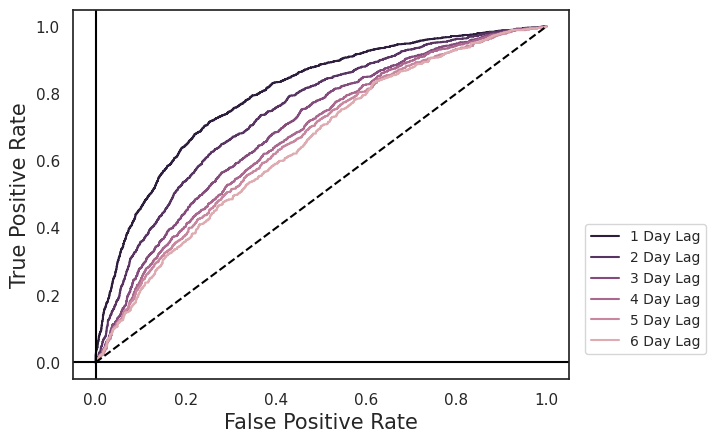

In [ ]:
fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[-1:0:-1], fpr_tprs, range(1,8)):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0} Day Lag'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.29, 0.05))
plt.savefig(ROOT+'figures/{0}_lagged_roc_curves_Fig_2.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

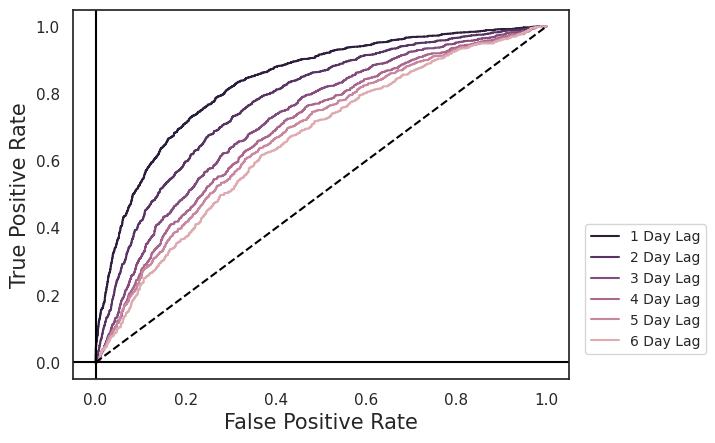

In [ ]:
fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[-1:0:-1], fpr_tprs_without_attention, range(1,8)):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0} Day Lag'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.29, 0.05))
plt.savefig(ROOT+'figures/{0}_lagged_roc_curves_Fig_2.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

<ipython-input-179-8d81daee8518>:11: RuntimeWarning: Mean of empty slice
  heatmap(np.nanmean(activations,axis=0).T[arranged_indices],
<ipython-input-179-8d81daee8518>:27: RuntimeWarning: Mean of empty slice
  y_vector = np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1)
<ipython-input-179-8d81daee8518>:30: RuntimeWarning: Mean of empty slice
  plot = sns.barplot(x=list(range(14)), y=np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1),
<ipython-input-179-8d81daee8518>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=list(range(14)), y=np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1),
<ipython-input-179-8d81daee8518>:30: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  plot = sns.barplot(x=list(range(14)), y=

There is a -0.1587349111131292 % change between day 0 and 1


<ipython-input-179-8d81daee8518>:43: RuntimeWarning: Mean of empty slice
  y_vector = np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0)
<ipython-input-179-8d81daee8518>:45: RuntimeWarning: Mean of empty slice
  plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
<ipython-input-179-8d81daee8518>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
<ipython-input-179-8d81daee8518>:45: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
<ipython-input-179-8d81daee8518>:

['metoprolol' 'pantoprazole' 'neostigmine' 'hemoglobin_std' 'asprin'
 'furosemide' 'platelets' 'ptt_std' 'hemocrit_std' 'rbcs_std' 'tobacco'
 'heparin' 'diastolic_std' 'inspired o2 fraction_std']


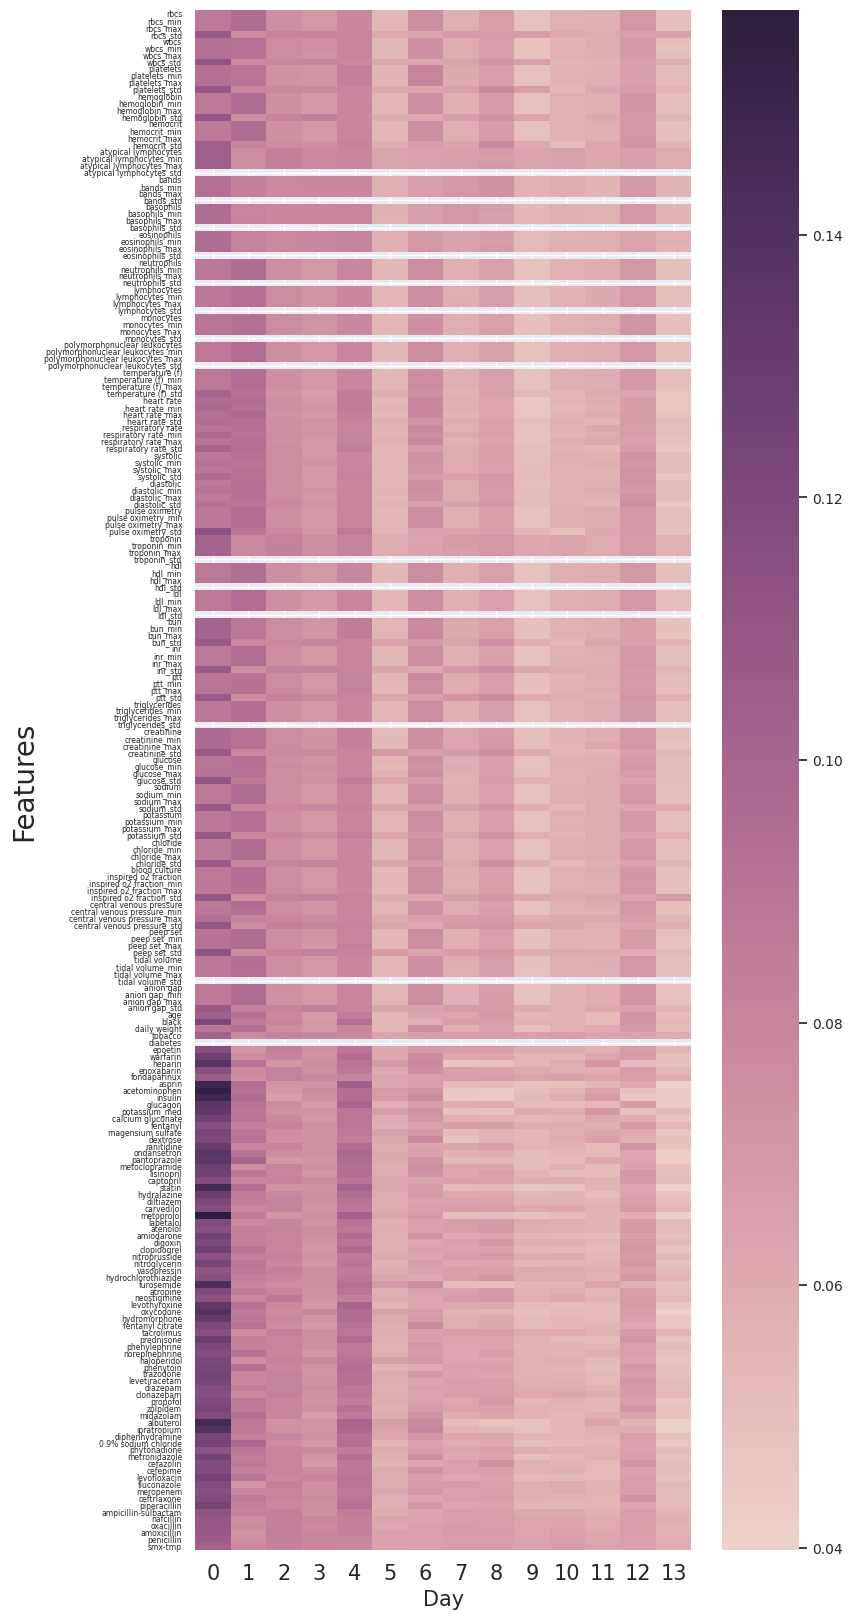

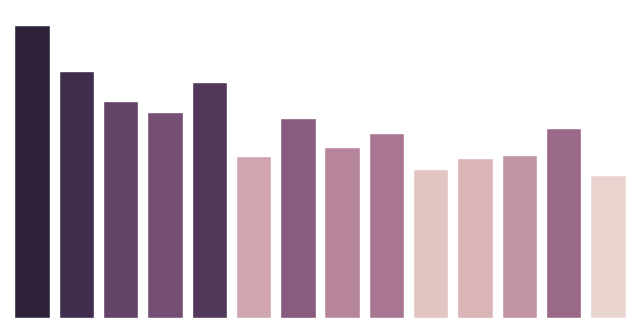

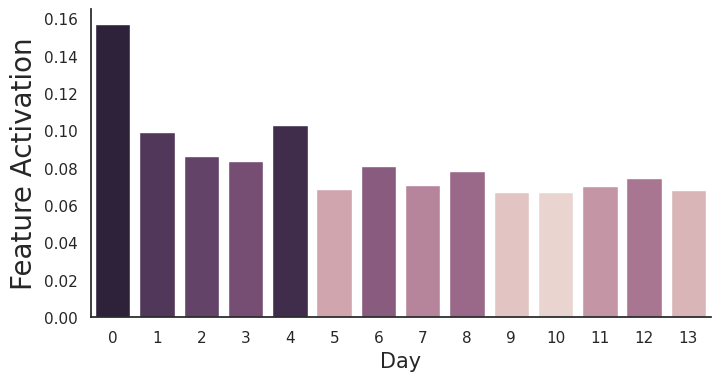

In [ ]:
##############
## FIGURE 3 ##
##############

## GET HEATMAPS FOR ALL INCIDENTS AVERAGE ##

plt.figure(figsize = (8,20))

sns.set(font_scale = 0.5)

heatmap(np.nanmean(activations,axis=0).T[arranged_indices],
        square=False,
        yticklabels=np.array(features)[arranged_indices],
        cmap=my_cmap)
plt.gcf().axes[-1].tick_params(labelsize=10)
plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Features', fontsize=20)
plt.savefig(ROOT+'figures/heatmap_{0}_med_ranked_average_activation_Figure_3.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## MAKE THE BARPLOT THAT GOES ON TOP OF THE HEATMAP ##
## THE ATTENTION ON EVERY TIME STEP AVERAGED OVER FEATURES ##

plt.figure(figsize = (8,4))
sns.set(style="white")
y_vector = np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1)
print('There is a {0} % change between day 0 and 1'.format((y_vector[1] - y_vector[0])/float(y_vector[0])))
color_rank = np.argsort(np.argsort(y_vector))
plot = sns.barplot(x=list(range(14)), y=np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1),
                    palette=np.array(color_list)[color_rank])
plot.set(xticklabels=[])
plot.set(yticklabels=[])
sns.despine(left=True, bottom=True)

plt.savefig(ROOT+'figures/heatmap_{0}_med_ranked_average_barplot_Figure_3.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## IDENTIFY MOST IMPORTANT FEATURE AT EVERY TIME STEP ##

plt.figure(figsize = (8,4))
sns.set(style="white")
y_vector = np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0)
color_rank = np.argsort(np.argsort(y_vector))
plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
                    palette=np.array(color_list)[color_rank])
plt.xlabel('Day', fontsize=15)
plt.ylabel('Feature Activation', fontsize=20)
sns.despine()# left=True, bottom=True)

plt.savefig(ROOT+'figures/{0}_highest_feature_activation_by_timestep_barplot_Figure_3.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## list of features by day that these activations correspond to ##

np.nanargmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0)
print(np.array(features)[arranged_indices][np.nanargmax(np.nanmean(activations, axis=0).T[arranged_indices],
                                                     axis=0)])
#####

In [ ]:
def find_intrahospital_incidents():
    IHI_keys =  np.where(np.nansum(Y_TEST.squeeze(), axis=1) > 1)[0]
    for i in IHI_keys:
        predictions = Y_PRED_mask_0[i][~y_boolmat_test[i].squeeze()].squeeze()
        predictions_without_attention = Y_PRED_mask_0_without_attention[i][~y_boolmat_test[i].squeeze()].squeeze()
        ground_truth = Y_TEST[i].squeeze()[~y_boolmat_test[i].squeeze()].squeeze()
        acc = accuracy_score(np.around(predictions), ground_truth)
        acc_without_attention = accuracy_score(np.around(predictions_without_attention), ground_truth)
        criteria = (acc > .9 and
#                    np.around(predictions[0]) == 0 and
                    (np.add(ground_truth, np.around(predictions)) == 2).any()  and
                    (ground_truth[0] == 0) and
                    (np.sum(ground_truth[0:2]) == 0) and
#                    (np.sum(ground_truth) > 1) and
                    ground_truth.shape[0] == 14)
        if criteria:
            print("Person {0} with IHI".format(i))
            print('Ground Truth')
            print(ground_truth)
            print('Predicted Sequence')
            print(np.around(predictions))
            print('Predicted Sequence without attention')
            print(np.around(predictions_without_attention))
            print('\n')

find_intrahospital_incidents()

Person 123 with IHI
Ground Truth
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
Predicted Sequence
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
Predicted Sequence without attention
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]


Person 156 with IHI
Ground Truth
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
Predicted Sequence
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
Predicted Sequence without attention
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


Person 376 with IHI
Ground Truth
[0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
Predicted Sequence
[0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
Predicted Sequence without attention
[0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


Person 446 with IHI
Ground Truth
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
Predicted Sequence
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
Predicted Sequence without attention
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]


Person 459 with IHI
Ground Truth
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
Predicted Sequence
[0. 0. 0. 0.

In [ ]:
if target == 'MI':
    patient_num = 3947
elif target == 'SEPSIS':
    patient_num = 927
elif target == 'VANCOMYCIN':
    patient_num = 474

In [ ]:
def patient_heatmap(patient_num, savefig=False, target=None):

        if target == None:
            raise Exception('Specify Target')

        print('\n')
        print('Visualize Inputs')
        print('Ground Truth')
        ground_truth = Y_TEST[patient_num].squeeze()[~y_boolmat_test[patient_num].squeeze()]
        print(ground_truth)
        print('Predicted Sequence')
        predictions = Y_PRED_mask_0[patient_num].squeeze()[~y_boolmat_test[patient_num].squeeze()]
        print(np.around(predictions))

        if target == 'MI':
            color_list_barplot = sns.color_palette("Reds", ground_truth.shape[0])
        elif target == 'SEPSIS':
            color_list_barplot = sns.cubehelix_palette(ground_truth.shape[0], start=2, rot=0, dark=0.25, light=.95)
        elif target == 'VANCOMYCIN':
            color_list_barplot = sns.cubehelix_palette(ground_truth.shape[0])

        print('Individual Heatmap')
        plt.figure(figsize = (8,20))
        sns.set(font_scale = 0.5)

    #    activations_map = np.nanmean(activations,axis=0)/(np.nanmax(np.nanmean(activations, axis=0), axis=1))[:,None]
        activations_map = activations[patient_num]/np.nanmax(activations[patient_num,::,::], axis=1)[:,None]
        heatmap(activations[patient_num].T[arranged_indices],
                       square=False,
#                      vmin=np.amin(activations[patient_num,:,:]),
#                      vmax=np.amax(activations[patient_num,:,:]),
                     yticklabels=np.array(features)[arranged_indices], cmap=my_cmap)
        plt.gcf().axes[-1].tick_params(labelsize=10)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15)
        plt.yticks(fontsize=8)
        plt.xlabel('Day', fontsize=20)
        plt.ylabel('Features', fontsize=20)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)

        if savefig:
            plt.savefig(ROOT+'figures/heatmap_{0}_patient_{1}.eps'.format(target, patient_num),
                        format='eps', dpi=300, bbox_inches='tight')

        rel_vector = np.nanmean(activations[patient_num,::,::].T.squeeze(), axis=0)
        rel_vector = rel_vector[~y_boolmat_test[patient_num].squeeze()]
        color_order = np.argsort(rel_vector, axis=0)
        color_order_order = np.argsort(color_order)

        plt.figure(figsize = (8,4))
        sns.set(style="white")
        plot = sns.barplot(x=np.arange(14)[~y_boolmat_test[patient_num].squeeze()], y=rel_vector,
                           palette=np.array(color_list_barplot)[color_order_order])
        plot.set(xticklabels=[])
        plot.set(yticklabels=[])
        sns.despine(left=True, bottom=True)

        print('Patient Features Heatmap')
        if savefig:
            plt.savefig(ROOT+'figures/barplot_for_heatmap_{0}_patient_{1}.eps'.format(target, patient_num),
                        format='eps', dpi=300, bbox_inches='tight')

        plt.figure(figsize= (8,20))
        sns.set(font_scale = 0.5)
        activations_map = X_TEST[patient_num,::,::]/np.nanmax(X_TEST[patient_num,::,::], axis=0) #[:,None]
        heatmap(X_TEST[patient_num,::,::].T[arranged_indices], square=False,
                yticklabels=np.array(features)[arranged_indices],
                cmap=my_cmap) #, cbar_kws={'ticks':[]})
        plt.gcf().axes[-1].tick_params(labelsize=10)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)
        plt.yticks(fontsize=8)
        plt.xlabel('Day', fontsize=20)
        plt.ylabel('Features', fontsize=20)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)
        if savefig:
            plt.savefig(ROOT+'figures/features_heatmap_{0}_patient_{1}.eps'.format(target, patient_num),
                        format='eps', dpi=300, bbox_inches='tight')

        rel_vector = np.nanmean(X_TEST[patient_num,::,::].T.squeeze(), axis=0)[~y_boolmat_test[patient_num].squeeze()]
        color_order = np.argsort(rel_vector, axis=0)
        color_order_order = np.argsort(color_order)

        plt.figure(figsize = (8,4))
        sns.set(style="white")
        plot = sns.barplot(x=np.arange(14)[~y_boolmat_test[patient_num].squeeze()], y=rel_vector,
                           palette=np.array(color_list_barplot)[color_order_order])
        plot.set(xticklabels=[])
        plot.set(yticklabels=[])
        sns.despine(left=True, bottom=True)
        if savefig:
            plt.savefig(ROOT+'figures/barplot_features_heatmap_{0}_patient_{1}.eps'.format(target, patient_num),
                        format='eps', dpi=300, bbox_inches='tight')

[0.4373931  0.61114717 0.48423555 0.2855439  0.42587152 0.1828098
 0.5947981  0.43473372 0.23089066 0.2439935  0.21648826 0.23883009
 0.23609827 0.14155097]
4.7643847


<ipython-input-192-5e1517b7b79a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=days_string, y=y_vector[days],
<ipython-input-192-5e1517b7b79a>:25: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  plot = sns.barplot(x=days_string, y=y_vector[days],


['acetominophen' 'ceftriaxone' 'piperacillin']
[0.4373931  0.61114717 0.48423555]


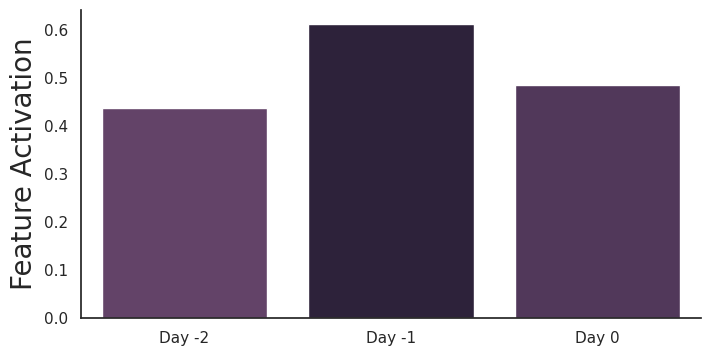

In [ ]:
## Get the top activations for that day, the day before, the day before ##

def features_driving_incident(patient_num, savefig=False):

    plt.figure(figsize = (8,4))
    sns.set(style="white")

    if np.where(Y_TEST[patient_num] == 1)[0][0] == 1:
        day_zero = 1
        day_neg_one = 0
        days = np.array([day_neg_one, day_zero])
        days_string = ['Day -1', 'Day 0']
    else:
        assert np.where(Y_TEST[patient_num] == 1)[0][0] >= 2
        day_zero = np.where(Y_TEST[patient_num] == 1)[0][0]
        day_neg_one = day_zero - 1
        day_neg_two = day_zero - 2
        days = np.array([day_neg_two, day_neg_one, day_zero])
        days_string = ['Day -2', 'Day -1', 'Day 0']

    y_vector = np.nanmax(activations[patient_num], axis=1) #[days]
    print(y_vector)
    print(np.nansum(y_vector))
    color_rank = np.argsort(np.argsort(y_vector))
    plot = sns.barplot(x=days_string, y=y_vector[days],
                       palette=np.array(color_list)[color_rank][days])
    plt.ylabel('Feature Activation', fontsize=20)
        #plot.set(xticklabels=[])
        #plot.set(yticklabels=[])
    sns.despine() # left=True, bottom=True)

    if savefig:
        plt.savefig(ROOT+'figures/max_activation_pre_incident_barplot_Figure_4_{0}_patient_{1}.eps'.format(target, patient_num),
             format='eps', dpi=300, bbox_inches='tight')

    ## list of features by day that these activations correspond to ##

    print(np.array(features)[np.nanargmax(activations[patient_num], axis=1)][days])
    print(np.nanmax(activations[patient_num], axis=1)[days])

#####

features_driving_incident(patient_num, savefig=True)

#####

In [ ]:
print(activations[patient_num].shape)

print(activations[patient_num].T[features.index('phenylephrine'),1])

#activations[patient_num][list(np.array(features)[arranged_indices]).index('levothyroxine'),0]

(14, 223)
0.047873363


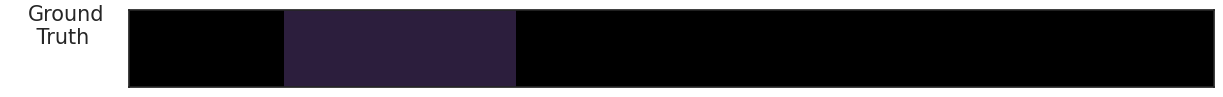

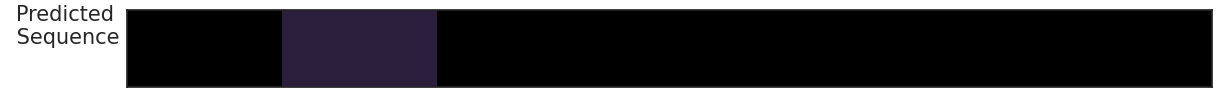

In [ ]:
## FIGURE 4 ##

def predictions_labels_palplot(patient_num, savefig=False):

    color_list_gt = np.array(color_list.copy())
    color_list_gt[Y_TEST[patient_num].squeeze() == 1] = color_list_gt[-1]
    color_list_gt[Y_TEST[patient_num].squeeze() == 0] = [0,0,0]
    sns.palplot(color_list_gt)
    plt.ylabel('Ground\n    Truth     ', fontsize=15, rotation='horizontal', labelpad=45) #.set_rotation(0)

    if savefig:
        plt.savefig(ROOT+'figures/{0}_GT_labels_Figure_4.eps'.format(target), format='eps',
                dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

    color_list_pred = np.array(color_list.copy())
    color_list_pred[np.around(Y_PRED_mask_0[patient_num].squeeze()) == 1] = color_list_pred[-1]
    color_list_pred[np.around(Y_PRED_mask_0[patient_num].squeeze()) == 0] = [0,0,0]
    sns.palplot(color_list_pred)
    plt.ylabel('Predicted\n Sequence', fontsize=15, rotation='horizontal', labelpad=45)
    if savefig:
        plt.savefig(ROOT+'figures/{0}_PRED_labels_Figure_4.eps'.format(target), format='eps',
                   dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,),
                    bbox_inches='tight')

predictions_labels_palplot(patient_num, savefig=True)

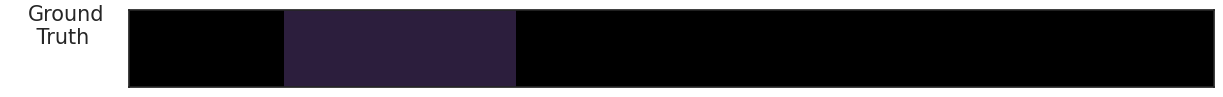

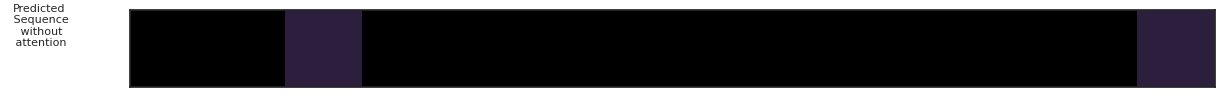

In [ ]:
## FIGURE 4 WITHOUT ATTENTION##

def predictions_labels_palplot_without_attention(patient_num, savefig=False):

    color_list_gt = np.array(color_list.copy())
    color_list_gt[Y_TEST[patient_num].squeeze() == 1] = color_list_gt[-1]
    color_list_gt[Y_TEST[patient_num].squeeze() == 0] = [0,0,0]
    sns.palplot(color_list_gt)
    plt.ylabel('Ground\n    Truth     ', fontsize=15, rotation='horizontal', labelpad=45) #.set_rotation(0)

    if savefig:
        plt.savefig(ROOT+'figures/{0}_GT_labels_Figure_4_without_attention.eps'.format(target), format='eps',
                dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

    color_list_pred = np.array(color_list.copy())
    color_list_pred[np.around(Y_PRED_mask_0_without_attention[patient_num].squeeze()) == 1] = color_list_pred[-1]
    color_list_pred[np.around(Y_PRED_mask_0_without_attention[patient_num].squeeze()) == 0] = [0,0,0]
    sns.palplot(color_list_pred)
    plt.ylabel('Predicted\n Sequence\n without\n attention', fontsize=8, rotation='horizontal', labelpad=65)
    if savefig:
        plt.savefig(ROOT+'figures/{0}_PRED_labels_Figure_4_without_attention.eps'.format(target), format='eps',
                   dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,),
                    bbox_inches='tight')

predictions_labels_palplot_without_attention(patient_num, savefig=True)

In [ ]:
# TODO use the get_activations function in combo with the graphs created to populate this section

### Target: SEPSIS

#### Training

In [ ]:
target = 'SEPSIS'

In [ ]:
## PICKLE LOADS
ROOT = "/content/drive/MyDrive/Colab Notebooks/"

X_TRAIN_MI = pickle.load(open(ROOT+'pickled_objects/X_TRAIN_MI.txt', 'rb'))
X_TRAIN_SEPSIS = pickle.load(open(ROOT+'pickled_objects/X_TRAIN_SEPSIS.txt', 'rb'))
X_TRAIN_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/X_TRAIN_VANCOMYCIN.txt', 'rb'))

Y_TRAIN_MI = pickle.load(open(ROOT+'pickled_objects/Y_TRAIN_MI.txt', 'rb'))
Y_TRAIN_SEPSIS = pickle.load(open(ROOT+'pickled_objects/Y_TRAIN_SEPSIS.txt', 'rb'))
Y_TRAIN_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/Y_TRAIN_VANCOMYCIN.txt', 'rb'))

Y_VAL_MI = pickle.load(open(ROOT+'pickled_objects/Y_VAL_MI.txt', 'rb'))
Y_VAL_SEPSIS = pickle.load(open(ROOT+'pickled_objects/Y_VAL_SEPSIS.txt', 'rb'))
Y_VAL_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/Y_VAL_VANCOMYCIN.txt', 'rb'))

X_VAL_MI = pickle.load(open(ROOT+'pickled_objects/X_VAL_MI.txt', 'rb'))
X_VAL_SEPSIS = pickle.load(open(ROOT+'pickled_objects/X_VAL_SEPSIS.txt', 'rb'))
X_VAL_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/X_VAL_VANCOMYCIN.txt', 'rb'))

Y_TEST_MI = pickle.load(open(ROOT+'pickled_objects/Y_TEST_MI.txt', 'rb'))
Y_TEST_SEPSIS = pickle.load(open(ROOT+'pickled_objects/Y_TEST_SEPSIS.txt', 'rb'))
Y_TEST_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/Y_TEST_VANCOMYCIN.txt', 'rb'))

X_TEST_MI = pickle.load(open(ROOT+'pickled_objects/X_TEST_MI.txt', 'rb'))
X_TEST_SEPSIS = pickle.load(open(ROOT+'pickled_objects/X_TEST_SEPSIS.txt', 'rb'))
X_TEST_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/X_TEST_VANCOMYCIN.txt', 'rb'))

y_boolmat_test_MI = pickle.load(open(ROOT+'pickled_objects/y_boolmat_test_MI.txt', 'rb'))
y_boolmat_test_SEPSIS = pickle.load(open(ROOT+'pickled_objects/y_boolmat_test_SEPSIS.txt', 'rb'))
y_boolmat_test_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/y_boolmat_test_VANCOMYCIN.txt', 'rb'))

x_boolmat_test_MI = pickle.load(open(ROOT+'pickled_objects/x_boolmat_test_MI.txt', 'rb'))
x_boolmat_test_SEPSIS = pickle.load(open(ROOT+'pickled_objects/x_boolmat_test_SEPSIS.txt', 'rb'))
x_boolmat_test_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/x_boolmat_test_VANCOMYCIN.txt', 'rb'))

no_features_cols_MI = pickle.load(open(ROOT+'pickled_objects/no_feature_cols_MI.txt', 'rb'))
no_features_cols_SEPSIS = pickle.load(open(ROOT+'pickled_objects/no_feature_cols_SEPSIS.txt', 'rb'))
no_features_cols_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/no_feature_cols_VANCOMYCIN.txt', 'rb'))

features_MI = pickle.load(open(ROOT+'pickled_objects/features_MI.txt', 'rb'))
features_SEPSIS = pickle.load(open(ROOT+'pickled_objects/features_SEPSIS.txt', 'rb'))
features_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/features_VANCOMYCIN.txt', 'rb'))

if target == 'MI':
    my_cmap = ListedColormap(sns.color_palette("Reds", 150))
    color_list = sns.color_palette("Reds", 14)
    color_list_reduced = sns.color_palette("Reds", 7)
    X_TRAIN = X_TRAIN_MI
    X_VAL = X_VAL_MI
    Y_TRAIN = Y_TRAIN_MI
    Y_VAL = Y_VAL_MI
    Y_TEST = Y_TEST_MI
    X_TEST = X_TEST_MI
    y_boolmat_test = y_boolmat_test_MI
    x_boolmat_test = x_boolmat_test_MI
    features = features_MI

elif target == 'SEPSIS':
    my_cmap = sns.cubehelix_palette(14, start=2, rot=0, dark=0.25, light=.95, as_cmap=True)
    color_list = sns.cubehelix_palette(14, start=2, rot=0, dark=0.15, light=.8)
    color_list_reduced = sns.cubehelix_palette(7, start=2, rot=0, dark=0.15, light=.8)
    X_TRAIN = X_TRAIN_SEPSIS
    X_VAL = X_VAL_SEPSIS
    Y_TRAIN = Y_TRAIN_SEPSIS
    Y_VAL = Y_VAL_SEPSIS
    Y_TEST = Y_TEST_SEPSIS
    X_TEST = X_TEST_SEPSIS
    y_boolmat_test = y_boolmat_test_SEPSIS
    x_boolmat_test = x_boolmat_test_SEPSIS
    features = features_SEPSIS

elif target == 'VANCOMYCIN':
    my_cmap= sns.cubehelix_palette(14, as_cmap=True)
    color_list = sns.cubehelix_palette(14)
    color_list_reduced = sns.cubehelix_palette(7)
    X_TRAIN = X_TRAIN_VANCOMYCIN
    X_VAL = X_VAL_VANCOMYCIN
    Y_TRAIN = Y_TRAIN_VANCOMYCIN
    Y_VAL = Y_VAL_VANCOMYCIN
    Y_TEST = Y_TEST_VANCOMYCIN
    X_TEST = X_TEST_VANCOMYCIN
    y_boolmat_test = y_boolmat_test_VANCOMYCIN
    x_boolmat_test = x_boolmat_test_VANCOMYCIN
    features = features_VANCOMYCIN

# Y_TRAIN[Y_TRAIN == -1] = np.nan
# Y_VAL[Y_VAL == -1] = np.nan
# Y_TEST[Y_TEST == -1] = np.nan
Y_TOTAL = np.concatenate([Y_TRAIN, Y_VAL, Y_TEST], axis=0)

In [ ]:
Y_MI = np.concatenate([Y_TRAIN_MI, Y_VAL_MI], axis=0)
Y_SEPSIS = np.concatenate([Y_TRAIN_SEPSIS, Y_VAL_SEPSIS], axis=0)
Y_VANCOMYCIN = np.concatenate([Y_TRAIN_VANCOMYCIN, Y_VAL_VANCOMYCIN], axis=0)

In [ ]:
''' this function is adapted from Keras documentation '''

def get_activations(model, inputs, print_shape_only=False, layer_name=None, verbose=False):

    """
    Get activations from a model
    Args:
        model: a keras model
        inputs: the inputs for the model
        print_shape_only: whether to print the shape of the layer or the whole activation layer
        layer_name: name of specific layer to return
        verbose: whether to show all outputs
    Returns:
        activations: list, list of activations
    """
    activations = []
    inp = model.input
    if layer_name is None:
        outputs = [layer.output for layer in model.layers]
    else:
        outputs = [layer.output for layer in model.layers if layer.name == layer_name]  # all layer outputs
    funcs = [K.function([inp], [out]) for out in outputs]  # evaluation functions
    K.set_learning_phase(1)
    layer_outputs = [func([inputs])[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if verbose:
            print('----- activations -----')
            if print_shape_only:
                print(layer_activations.shape)
            else:
                print(layer_activations)
    return activations

def normalize_activations(activations_matrix):
    means = np.nanmean(activations_matrix, axis=0)
    stds = np.nanstd(activations_matrix, axis=0)
    return (activations_matrix - means) / stds

In [ ]:
TIME_STEPS = X_VAL.shape[1] #number of time_steps

In [ ]:
if target == 'MI':
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14")
    m_80 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_80_percent")
    m_60 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_60_percent")
    m_40 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_40_percent")
    m_20 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_20_percent")
    m_10 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_10_percent")
    m_5 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_5_percent")
   # m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_bench")
elif target == 'SEPSIS':
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14")
    m_80 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_80_percent")
    m_60 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_60_percent")
    m_40 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_40_percent")
    m_20 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_20_percent")
    m_10 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_10_percent")
    m_5 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_5_percent")
    #m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_bench")
elif target == 'VANCOMYCIN':
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14")
    m_80 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_80_percent")
    m_60 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_60_percent")
    m_40 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_40_percent")
    m_20 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_20_percent")
    m_10 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_10_percent")
    m_5 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_5_percent")
    #m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_bench")

In [ ]:
if target == 'MI':
    m_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_without_attention")
    m_80_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_80_percent_without_attention")
    m_60_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_60_percent_without_attention")
    m_40_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_40_percent_without_attention")
    m_20_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_20_percent_without_attention")
    m_10_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_10_percent_without_attention")
    m_5_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_5_percent_without_attention")
    # m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_bench")
elif target == 'SEPSIS':
    m_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_without_attention")
    m_80_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_80_percent_without_attention")
    m_60_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_60_percent_without_attention")
    m_40_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_40_percent_without_attention")
    m_20_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_20_percent_without_attention")
    m_10_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_10_percent_without_attention")
    m_5_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_5_percent_without_attention")
    #m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_bench")
elif target == 'VANCOMYCIN':
    m_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_without_attention")
    m_80_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_80_percent_without_attention")
    m_60_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_60_percent_without_attention")
    m_40_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_40_percent_without_attention")
    m_20_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_20_percent_without_attention")
    m_10_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_10_percent_without_attention")
    m_5_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_5_percent_without_attention")
    #m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_bench")

The total kurtosis is -0.5955854800632636 with 30.930607853684776 % of events occuring between days 0 and 2


<ipython-input-205-7af7364de9e5>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_total, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-205-7af7364de9e5>:22: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=y_vector_total, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-205-7af7364de9e5>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_total_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-205-7af7364de9e5>:39: UserWarning: Numpy array is not a supported type for `palette`. Please 

The train kurtosis is -0.44971804805141913 with 31.03271983640082 % of events occuring between days 0 and 2


<ipython-input-205-7af7364de9e5>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_train, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-205-7af7364de9e5>:59: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=y_vector_train, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-205-7af7364de9e5>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_train_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-205-7af7364de9e5>:77: UserWarning: Numpy array is not a supported type for `palette`. Please 

The test kurtosis is -0.9406801193912093 with 31.486611265004615 % of events occuring between days 0 and 2


<ipython-input-205-7af7364de9e5>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_test, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-205-7af7364de9e5>:94: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=y_vector_test, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-205-7af7364de9e5>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_test_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-205-7af7364de9e5>:111: UserWarning: Numpy array is not a supported type for `palette`. Please c

<Figure size 640x480 with 0 Axes>

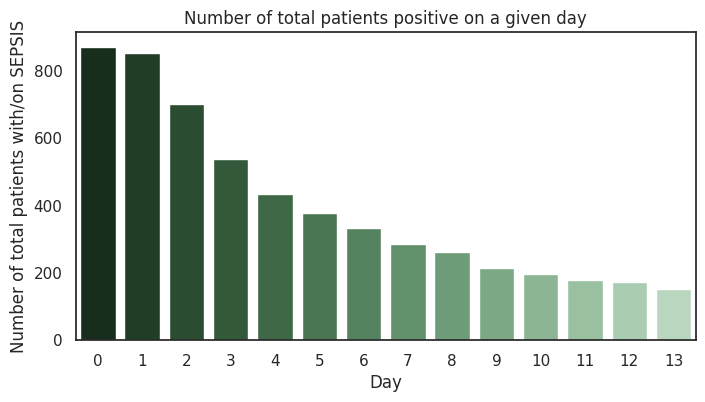

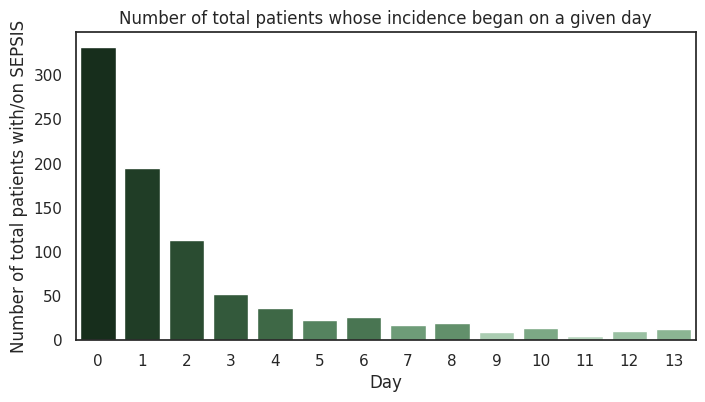

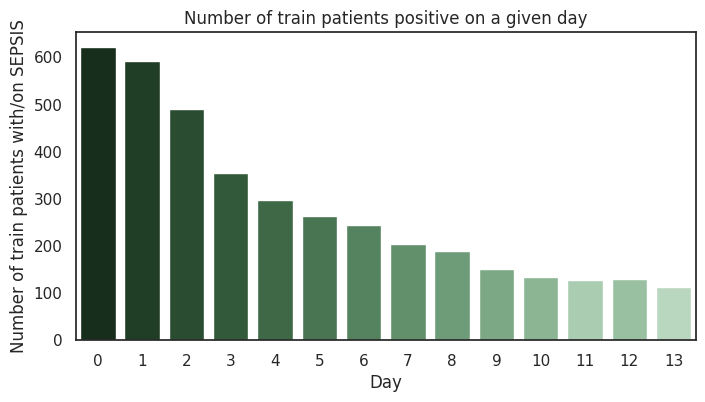

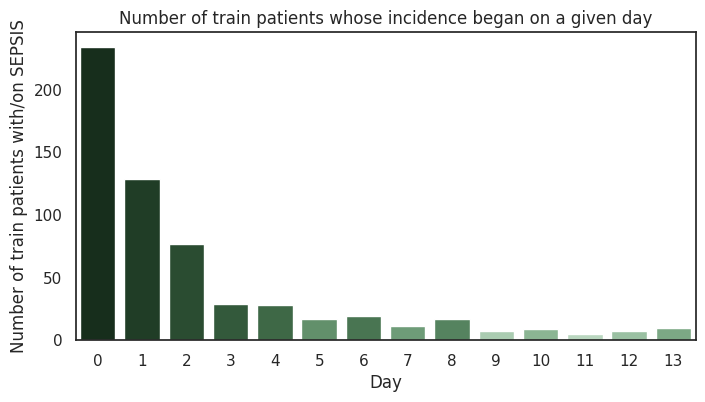

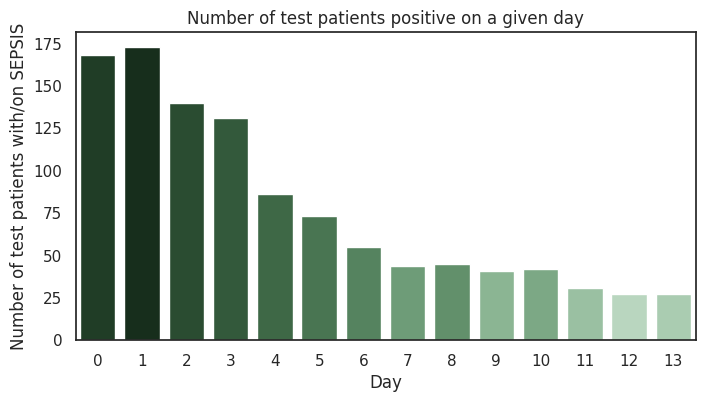

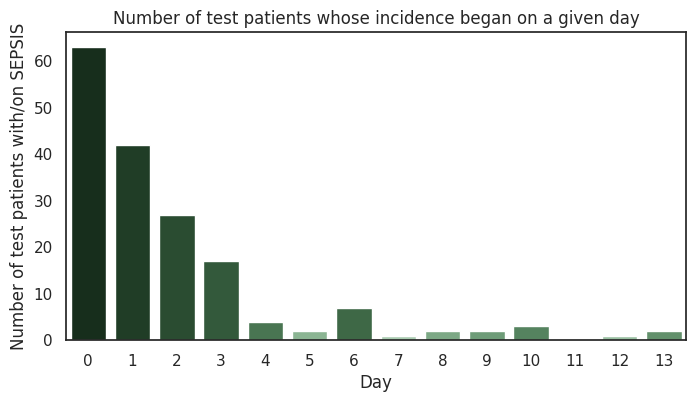

In [ ]:
############################
## SUPPLEMENTARY FIGURE 1 ##
############################

sns.set(style="white")
sns.despine(left=True, bottom=True)

## TOTAL

### When do people have incidents?

# number of people who are positive on a given day
plt.figure(figsize = (8,4))
plt.title('Number of total patients positive on a given day')
plt.ylabel('Number of total patients with/on {0}'.format(target))
plt.xlabel('Day')
y_vector_total = np.nansum(Y_TOTAL, axis=0).squeeze()
print("The total kurtosis is {0} with {1} % of events \
occuring between days 0 and 2".format(kurtosis(y_vector_total),
                                            100*int(np.sum(y_vector_total[0:2]))/np.sum(y_vector_total)))
color_rank = np.argsort(np.argsort(y_vector_total))
sns.barplot(y=y_vector_total, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Total_Patients_Positive_Supplemental_Figure_1.eps'.format(target), format='eps',
             dpi=300, bbox_inches='tight')

# first incident - number of people who had their first incident on a given day
plt.figure(figsize = (8,4))
plt.title('Number of total patients whose incidence began on a given day')
plt.ylabel('Number of total patients with/on {0}'.format(target))
plt.xlabel('Day')
POS_Y_TOTAL = Y_TOTAL[np.nansum(Y_TOTAL.squeeze(), axis=1) == 1]
(days_total, value_counts_total) = np.unique(np.nanargmax(POS_Y_TOTAL, axis=1), return_counts=True)
day_value_dict_total = dict(zip(np.arange(14), np.zeros(14)))
for i in range(len(days_total)):
    day_value_dict_total[days_total[i]] = value_counts_total[i]
y_vector_total_pos = list(day_value_dict_total.values())
color_rank = np.argsort(np.argsort(y_vector_total_pos))
sns.barplot(y=y_vector_total_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
#plt.show()

plt.savefig(ROOT+'figures/{0}_Total_Patients_First_Positive_Supplemental_Figure_1.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## TRAIN

## When do people have incidents?

# number of people who are positive on a given day
plt.figure(figsize = (8,4))
plt.title('Number of train patients positive on a given day')
plt.ylabel('Number of train patients with/on {0}'.format(target))
plt.xlabel('Day')
y_vector_train = np.nansum(Y_TRAIN, axis=0).squeeze()
print("The train kurtosis is {0} with {1} % of events \
occuring between days 0 and 2".format(kurtosis(y_vector_train),
                                            100*int(np.sum(y_vector_train[0:2]))/np.sum(y_vector_train)))
color_rank = np.argsort(np.argsort(y_vector_train))
sns.barplot(y=y_vector_train, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Train_Patients_Positive_Supplemental_Figure_1.eps'.format(target), format='eps',
             dpi=300, bbox_inches='tight')


# first incident - number of people who had their first incident on a given day
plt.figure(figsize = (8,4))
plt.title('Number of train patients whose incidence began on a given day')
plt.ylabel('Number of train patients with/on {0}'.format(target))
plt.xlabel('Day')
POS_Y_TRAIN = Y_TRAIN[np.nansum(Y_TRAIN.squeeze(), axis=1) == 1]
(days_train_pos, value_counts_train_pos) = np.unique(np.nanargmax(POS_Y_TRAIN, axis=1), return_counts=True)
day_value_dict_train_pos = dict(zip(np.arange(14), np.zeros(14)))
for i in range(len(days_train_pos)):
    day_value_dict_train_pos[days_train_pos[i]] = value_counts_train_pos[i]
y_vector_train_pos = list(day_value_dict_train_pos.values())
color_rank = np.argsort(np.argsort(y_vector_train_pos))
sns.barplot(y=y_vector_train_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Train_Patients_First_Positive_Supplemental_Figure_1.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## TEST

# number of people who are positive on a given day
plt.figure(figsize = (8,4))
plt.title('Number of test patients positive on a given day')
plt.ylabel('Number of test patients with/on {0}'.format(target))
plt.xlabel('Day')
y_vector_test = np.nansum(Y_TEST, axis=0).squeeze()
print("The test kurtosis is {0} with {1} % of events \
occuring between days 0 and 2".format(kurtosis(y_vector_test),
                                          100*int(np.sum(y_vector_test[0:2]))/np.sum(y_vector_test)))
color_rank = np.argsort(np.argsort(y_vector_test))
sns.barplot(y=y_vector_test, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Test_Patients_Positive_Supplemental_Figure_1.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

# first incident - nmber of people who had their first incident on a given day
plt.figure(figsize = (8,4))
plt.title('Number of test patients whose incidence began on a given day')
plt.ylabel('Number of test patients with/on {0}'.format(target))
plt.xlabel('Day')
POS_Y_TEST = Y_TEST[np.nansum(Y_TEST.squeeze(), axis=1) == 1]
(days, value_counts) = np.unique(np.nanargmax(POS_Y_TEST, axis=1), return_counts=True)
day_value_dict = dict(zip(np.arange(14), np.zeros(14)))
for i in range(len(days)):
    day_value_dict[days[i]] = value_counts[i]
y_vector_test_pos = list(day_value_dict.values())
color_rank = np.argsort(np.argsort(y_vector_test_pos))
sns.barplot(y=y_vector_test_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Test_Patients_First_Positive_Supplemental_Figure_1.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_80_percent = m_80.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_60_percent = m_60.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_40_percent = m_40.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_20_percent = m_20.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_10_percent = m_10.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_5_percent = m_5.predict(X_TEST_MASK)
del X_TEST_MASK

# AUROC values with models that have been trained with various fractions of training data

28/28 [==============================] - 4s 47ms/step


In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 WITHOUT ATTENTION ###
#############################

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_80_percent_without_attention = m_80_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_60_percent_without_attention = m_60_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_40_percent_without_attention = m_40_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_20_percent_without_attention = m_20_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_10_percent_without_attention = m_10_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_5_percent_without_attention = m_5_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

# AUROC values with models(without attention) that have been trained with various fractions of training data

28/28 [==============================] - 2s 22ms/step


In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

(fpr_100, tpr_100, thresholds_100) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test])
(fpr_80, tpr_80, thresholds_80) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_80_percent[~y_boolmat_test])
(fpr_60, tpr_60, thresholds_60) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_60_percent[~y_boolmat_test])
(fpr_40, tpr_40, thresholds_40) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_40_percent[~y_boolmat_test])
(fpr_20, tpr_20, thresholds_20) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_20_percent[~y_boolmat_test])
(fpr_10, tpr_10, thresholds_10) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_10_percent[~y_boolmat_test])
(fpr_5, tpr_5, thresholds_5) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_5_percent[~y_boolmat_test])

fpr_tprs = [(fpr_100, tpr_100), (fpr_80, tpr_80), (fpr_60, tpr_60),
            (fpr_40, tpr_40), (fpr_20, tpr_20), (fpr_10, tpr_10), (fpr_5, tpr_5)]

In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 WITHOUT ATTENTION ###
#############################

(fpr_100_without_attention, tpr_100_without_attention, thresholds_100_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0_without_attention[~y_boolmat_test])
(fpr_80_without_attention, tpr_80_without_attention, thresholds_80_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_80_percent_without_attention[~y_boolmat_test])
(fpr_60_without_attention, tpr_60_without_attention, thresholds_60_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_60_percent_without_attention[~y_boolmat_test])
(fpr_40_without_attention, tpr_40_without_attention, thresholds_40_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_40_percent_without_attention[~y_boolmat_test])
(fpr_20_without_attention, tpr_20_without_attention, thresholds_20_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_20_percent_without_attention[~y_boolmat_test])
(fpr_10_without_attention, tpr_10_without_attention, thresholds_10_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_10_percent_without_attention[~y_boolmat_test])
(fpr_5_without_attention, tpr_5_without_attention, thresholds_5_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_5_percent_without_attention[~y_boolmat_test])

fpr_tprs_without_attention = [(fpr_100_without_attention, tpr_100_without_attention), (fpr_80_without_attention, tpr_80_without_attention), (fpr_60_without_attention, tpr_60_without_attention),
            (fpr_40_without_attention, tpr_40_without_attention), (fpr_20_without_attention, tpr_20_without_attention), (fpr_10_without_attention, tpr_10_without_attention), (fpr_5_without_attention, tpr_5_without_attention)]

0.9031736824597181
0.8960577888510054
0.881275943362115
0.8617258858518709
0.8276935233036381
0.7879466749487508
0.7615909213742473
PPV for full model is 0.7052023121387283
Sensitivity for full model is 0.34
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6065
         1.0       0.71      0.34      0.46      1083

    accuracy                           0.88      7148
   macro avg       0.80      0.66      0.69      7148
weighted avg       0.86      0.88      0.86      7148



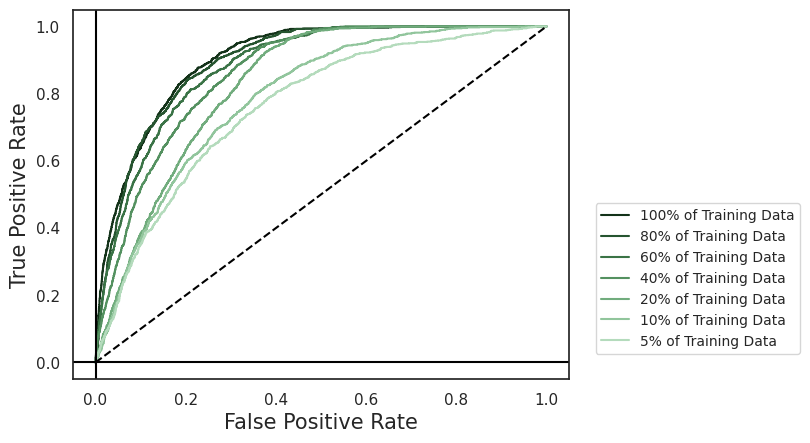

In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[::-1], fpr_tprs, [100,80,60,40,20,10,5]):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0}% of Training Data'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.48, 0.05))
plt.savefig(ROOT+'figures/{0}_less_data_roc_curves_Supplemental_Figure_2.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

# 100 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test]))
# 80 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_80_percent[~y_boolmat_test]))
# 60 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_60_percent[~y_boolmat_test]))
# 40 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_40_percent[~y_boolmat_test]))
# 20 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_20_percent[~y_boolmat_test]))
# 10 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_10_percent[~y_boolmat_test]))
# 5 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_5_percent[~y_boolmat_test]))

## 100% Training Data ##
TN, FP, FN, TP = confusion_matrix(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test])).ravel()
PPV = TP/(TP+FP)
print("PPV for full model is {0}".format(PPV))
CR = classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print("Sensitivity for full model is {0}".format(CR.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test])))

0.9329312564180442
0.9340916616616388
0.9296800816637856
0.9164028655402119
0.9015194731741925
0.8711003981946883
0.8419616968833331
PPV for full model(without attention) is 0.7532281205164992
Sensitivity for full model(without attention) is 0.48
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      6065
         1.0       0.75      0.48      0.59      1083

    accuracy                           0.90      7148
   macro avg       0.83      0.73      0.77      7148
weighted avg       0.89      0.90      0.89      7148



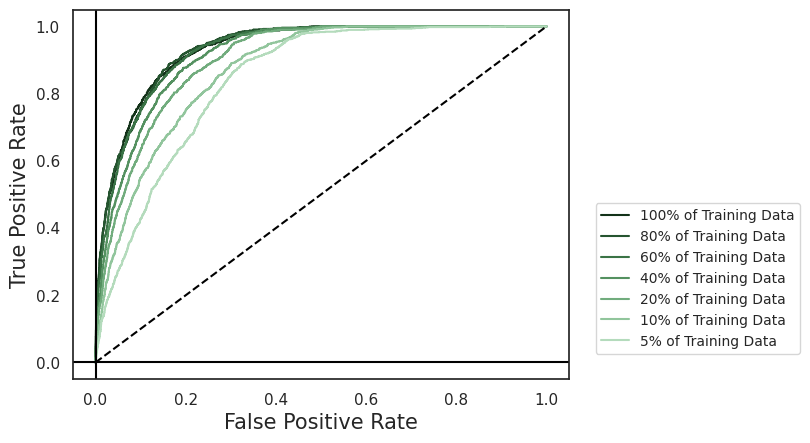

In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 WITHOUT ATTENTION ###
#############################

fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[::-1], fpr_tprs_without_attention, [100,80,60,40,20,10,5]):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0}% of Training Data'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.48, 0.05))
plt.savefig(ROOT+'figures/{0}_less_data_roc_curves_Supplemental_Figure_2_without_attention.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

# 100 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0_without_attention[~y_boolmat_test]))
# 80 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_80_percent_without_attention[~y_boolmat_test]))
# 60 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_60_percent_without_attention[~y_boolmat_test]))
# 40 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_40_percent_without_attention[~y_boolmat_test]))
# 20 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_20_percent_without_attention[~y_boolmat_test]))
# 10 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_10_percent_without_attention[~y_boolmat_test]))
# 5 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_5_percent_without_attention[~y_boolmat_test]))

## 100% Training Data ##
TN_without_attention, FP_without_attention, FN_without_attention, TP_without_attention = confusion_matrix(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0_without_attention[~y_boolmat_test])).ravel()
PPV_without_attention = TP_without_attention/(TP_without_attention+FP_without_attention)
print("PPV for full model(without attention) is {0}".format(PPV_without_attention))
CR_without_attention = classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0_without_attention[~y_boolmat_test]))

print("Sensitivity for full model(without attention) is {0}".format(CR_without_attention.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0_without_attention[~y_boolmat_test])))

In [ ]:
# GET ACTIVATIONS MATRIX ; OUTPUT IS (BATCH_SIZE, TIME_STEPS, FEATURES)

activations = get_activations(m, X_TEST, print_shape_only=True, layer_name='attention_vec')[0]
activations[x_boolmat_test] = np.nan

# AVERAGE THE ATTENTION MATRIX OVER FEATURES ; OUTPUT IS BATCH_SIZE, TIME_STEPS
attention_matrix = np.nanmean(activations, axis=2).squeeze()

# AVERAGE ATTENTION VECTOR ACROSS SAMPLES ; OUTPUT IS 1D TIME_STEPS
attention_vector_final = np.nanmean(attention_matrix, axis=0)

# This allows us to rank color intensity by activation. We sort the intensities, then argsort the indices ##
color_order = np.argsort(attention_vector_final, axis=0)
color_order_order = np.argsort(color_order)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(
<ipython-input-212-02a72c2243f8>:7: RuntimeWarning: Mean of empty slice
  attention_matrix = np.nanmean(activations, axis=2).squeeze()


In [ ]:
attention_vector_final

array([0.07725414, 0.0817054 , 0.08630615, 0.0782006 , 0.07163791,
       0.06836395, 0.07767924, 0.07113022, 0.07234624, 0.06258382,
       0.05511332, 0.06136546, 0.06161739, 0.05821775], dtype=float32)

In [ ]:
''' Due to the way features are selectd from the EMR and the fact potassium can be a
delivered medication or a lab value, special care was taken to ensure proper representation on heatmaps '''

if 'digoxin(?!.*fab)' in features:
    indexy = features.index('digoxin(?!.*fab)')
    features[indexy] = 'digoxin'

if 'potassium_y' in features:
    indexy = features.index('potassium_y')
    features[indexy] = 'potassium_med'

if 'potassium_x' in features:
    indexy = features.index('potassium_x')
    features[indexy] = 'potassium'

if 'cipfloxacin' in features:
    indexy = features.index('cipfloxacin')
    features[indexy] = 'ciprofloxacin'

features = [feature.lower() for feature in features]

In [ ]:
## FEATURES BY CATEGORY ##

cbc_diff_features = ['RBCs', 'WBCs', 'platelets', 'hemoglobin', 'hemocrit',
                              'atypical lymphocytes', 'bands', 'basophils', 'eosinophils', 'neutrophils',
                              'lymphocytes', 'monocytes', 'polymorphonuclear leukocytes']

vital_features = ['temperature (F)', 'heart rate', 'respiratory rate', 'systolic', 'diastolic',
                  'pulse oximetry']

lab_features = ['troponin', 'HDL', 'LDL', 'BUN', 'INR', 'PTT', 'PT', 'triglycerides', 'creatinine',
                  'glucose', 'sodium', 'potassium', 'chloride', 'bicarbonate',
                  'blood culture', 'urine culture', 'surface culture', 'sputum' +
                  ' culture', 'wound culture', 'Inspired O2 Fraction', 'central venous pressure',
                  'PEEP Set', 'tidal volume', 'anion gap']

demographic_features = ['age', 'm', 'black', 'daily weight', 'tobacco', 'diabetes', 'history of CV events']

med_features = ['epoetin', 'warfarin', 'heparin', 'enoxaparin', 'fondaparinux',
                                      'asprin', 'ketorolac', 'acetominophen',
                                      'insulin', 'glucagon',
                                      'potassium_med', 'calcium gluconate',
                                      'fentanyl', 'magensium sulfate',
                                      'D5W', 'dextrose',
                                      'ranitidine', 'ondansetron', 'pantoprazole', 'metoclopramide',
                                      'lisinopril', 'captopril', 'statin',
                                      'hydralazine', 'diltiazem',
                                      'carvedilol', 'metoprolol', 'labetalol', 'atenolol',
                                      'amiodarone', 'digoxin',
                                      'clopidogrel', 'nitroprusside', 'nitroglycerin',
                                      'vasopressin', 'hydrochlorothiazide', 'furosemide',
                                      'atropine', 'neostigmine',
                                      'levothyroxine',
                                      'oxycodone', 'hydromorphone', 'fentanyl citrate',
                                      'tacrolimus', 'prednisone',
                                      'phenylephrine', 'norepinephrine',
                                      'haloperidol', 'phenytoin', 'trazodone', 'levetiracetam',
                                      'diazepam', 'clonazepam',
                                      'propofol', 'zolpidem', 'midazolam',
                                      'albuterol', 'ipratropium',
                                      'diphenhydramine',
                                      '0.9% Sodium Chloride',
                                      'phytonadione',
                                      'metronidazole',
                                      'cefazolin', 'cefepime', 'vancomycin', 'levofloxacin',
                                      'ciprofloxacin', 'fluconazole',
                                      'meropenem', 'ceftriaxone', 'piperacillin',
                                      'ampicillin-sulbactam', 'nafcillin', 'oxacillin',
                                      'amoxicillin', 'penicillin', 'SMX-TMP']

cbc_diff_features = [[i.lower(), i.lower()+'_min', i.lower()+'_max', i.lower()+'_std'] for i in cbc_diff_features]
vital_features = [[i.lower(), i.lower()+'_min', i.lower()+'_max', i.lower()+'_std'] for i in vital_features]
lab_features = [[i.lower(), i.lower()+'_min', i.lower()+'_max', i.lower()+'_std'] for i in lab_features]
demographic_features = [i.lower() for i in demographic_features]
med_features = [i.lower() for i in med_features]

cbc_diff_feature_array = np.array(cbc_diff_features).flatten()
vital_features_array = np.array(vital_features).flatten()
lab_features_array = np.array(lab_features).flatten()
demographic_feature_array = np.array(demographic_features).flatten()
med_features_array = np.array(med_features).flatten()

features_built = np.hstack([cbc_diff_feature_array,vital_features_array,
                            lab_features_array,demographic_feature_array,med_features_array])

features_built_reduced = [i for i in features_built if i in features]

In [ ]:
## Identifies the index in the features list in the desired order ##
arranged_indices = [features.index(i) for i in features_built_reduced]

In [ ]:
## This is a sanity check to ensure that features_built_reduced has the same number of elements as our target ##

print(len(features_SEPSIS))
print(len(features_MI))
print(len(features_VANCOMYCIN))
print('\n')
print(len(features_built))
print(len(features_built_reduced))

224
220
223


256
224


####   Evaluation

Display Evaluation Results for SEPSIS

In [ ]:
##############
## FIGURE 1 ##
##############

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 1
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_1 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 2
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_2 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 3
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_3 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 4
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_4 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 5
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_5 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 6
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_6 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 7
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_7 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 8
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_8 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 9
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_9 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 10
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_10 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 11
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_11 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 12
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_12 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 13
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_13 = m.predict(X_TEST_MASK)
del X_TEST_MASK

28/28 [==============================] - 1s 39ms/step


In [ ]:
##############
## FIGURE 1 without attention ##
##############

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 1
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_1_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 2
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_2_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 3
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_3_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 4
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_4_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 5
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_5_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 6
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_6_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 7
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_7_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 8
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_8_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 9
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_9_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 10
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_10_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 11
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_11_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 12
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_12_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 13
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_13_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

28/28 [==============================] - 1s 35ms/step


In [ ]:
##############
## FIGURE 1 ##
##############

(fpr_mask_0, tpr_mask_0, thresholds_mask_0) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test])
(fpr_mask_1, tpr_mask_1, thresholds_mask_1) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_1[~y_boolmat_test])
(fpr_mask_2, tpr_mask_2, thresholds_mask_2) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_2[~y_boolmat_test])
(fpr_mask_3, tpr_mask_3, thresholds_mask_3) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_3[~y_boolmat_test])
(fpr_mask_4, tpr_mask_4, thresholds_mask_4) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_4[~y_boolmat_test])
(fpr_mask_5, tpr_mask_5, thresholds_mask_5) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_5[~y_boolmat_test])
(fpr_mask_6, tpr_mask_6, thresholds_mask_6) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_6[~y_boolmat_test])
(fpr_mask_7, tpr_mask_7, thresholds_mask_7) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_7[~y_boolmat_test])
(fpr_mask_8, tpr_mask_8, thresholds_mask_8) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_8[~y_boolmat_test])
(fpr_mask_9, tpr_mask_9, thresholds_mask_9) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_9[~y_boolmat_test])
(fpr_mask_10, tpr_mask_10, thresholds_mask_10) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_10[~y_boolmat_test])
(fpr_mask_11, tpr_mask_11, thresholds_mask_11) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_11[~y_boolmat_test])
(fpr_mask_12, tpr_mask_12, thresholds_mask_12) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_12[~y_boolmat_test])
(fpr_mask_13, tpr_mask_13, thresholds_mask_13) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_13[~y_boolmat_test])

fpr_tprs = [(fpr_mask_1, tpr_mask_1), (fpr_mask_2, tpr_mask_2), (fpr_mask_3, tpr_mask_3), (fpr_mask_4, tpr_mask_4),
            (fpr_mask_5, tpr_mask_5), (fpr_mask_6, tpr_mask_6), (fpr_mask_7, tpr_mask_7), (fpr_mask_8, tpr_mask_8),
            (fpr_mask_9, tpr_mask_9), (fpr_mask_10, tpr_mask_10), (fpr_mask_11, tpr_mask_11), (fpr_mask_12, tpr_mask_12),
            (fpr_mask_13, tpr_mask_13), (fpr_mask_0, tpr_mask_0)]

print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_13[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_12[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_11[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_10[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_9[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_8[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_7[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_6[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_5[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_4[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_3[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_2[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_1[~y_boolmat_test]))

0.9031736824597181
0.9045506550687039
0.9021989390102149
0.8967470744375148
0.8932276454141385
0.8848990506813308
0.8775962773249781
0.8606706813460518
0.843003427778019
0.8253411221462779
0.8101386259504796
0.7587313186859195
0.6985428708230854
0.6334981376729019


In [ ]:
##############
## FIGURE 1 without attention ##
##############

(fpr_mask_0_without_attention, tpr_mask_0_without_attention, thresholds_mask_0_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0_without_attention[~y_boolmat_test])
(fpr_mask_1_without_attention, tpr_mask_1_without_attention, thresholds_mask_1_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_1_without_attention[~y_boolmat_test])
(fpr_mask_2_without_attention, tpr_mask_2_without_attention, thresholds_mask_2_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_2_without_attention[~y_boolmat_test])
(fpr_mask_3_without_attention, tpr_mask_3_without_attention, thresholds_mask_3_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_3_without_attention[~y_boolmat_test])
(fpr_mask_4_without_attention, tpr_mask_4_without_attention, thresholds_mask_4_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_4_without_attention[~y_boolmat_test])
(fpr_mask_5_without_attention, tpr_mask_5_without_attention, thresholds_mask_5_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_5_without_attention[~y_boolmat_test])
(fpr_mask_6_without_attention, tpr_mask_6_without_attention, thresholds_mask_6_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_6_without_attention[~y_boolmat_test])
(fpr_mask_7_without_attention, tpr_mask_7_without_attention, thresholds_mask_7_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_7_without_attention[~y_boolmat_test])
(fpr_mask_8_without_attention, tpr_mask_8_without_attention, thresholds_mask_8_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_8_without_attention[~y_boolmat_test])
(fpr_mask_9_without_attention, tpr_mask_9_without_attention, thresholds_mask_9_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_9_without_attention[~y_boolmat_test])
(fpr_mask_10_without_attention, tpr_mask_10_without_attention, thresholds_mask_10_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_10_without_attention[~y_boolmat_test])
(fpr_mask_11_without_attention, tpr_mask_11_without_attention, thresholds_mask_11_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_11_without_attention[~y_boolmat_test])
(fpr_mask_12_without_attention, tpr_mask_12_without_attention, thresholds_mask_12_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_12_without_attention[~y_boolmat_test])
(fpr_mask_13_without_attention, tpr_mask_13_without_attention, thresholds_mask_13_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_13_without_attention[~y_boolmat_test])

fpr_tprs_without_attention = [(fpr_mask_1_without_attention, tpr_mask_1_without_attention), (fpr_mask_2_without_attention, tpr_mask_2_without_attention), (fpr_mask_3_without_attention, tpr_mask_3_without_attention), (fpr_mask_4_without_attention, tpr_mask_4_without_attention),
            (fpr_mask_5_without_attention, tpr_mask_5_without_attention), (fpr_mask_6_without_attention, tpr_mask_6_without_attention), (fpr_mask_7_without_attention, tpr_mask_7_without_attention), (fpr_mask_8_without_attention, tpr_mask_8_without_attention),
            (fpr_mask_9_without_attention, tpr_mask_9_without_attention), (fpr_mask_10_without_attention, tpr_mask_10_without_attention), (fpr_mask_11_without_attention, tpr_mask_11_without_attention), (fpr_mask_12_without_attention, tpr_mask_12_without_attention),
            (fpr_mask_13_without_attention, tpr_mask_13_without_attention), (fpr_mask_0_without_attention, tpr_mask_0_without_attention)]

print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_13_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_12_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_11_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_10_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_9_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_8_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_7_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_6_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_5_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_4_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_3_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_2_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_1_without_attention[~y_boolmat_test]))

0.9329312564180442
0.9312519268405752
0.9304521880916115
0.9246774135842926
0.9187656954248337
0.9120996072861026
0.901001995160157
0.8902623852554542
0.8675313375641995
0.8459170771550736
0.8262810777975441
0.7758214906381239
0.7239347664079276
0.6369126704468899


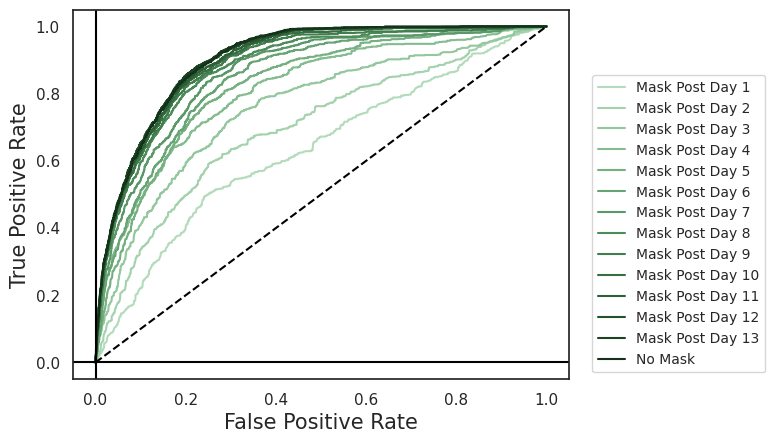

In [ ]:
##############
## FIGURE 1 ##
##############

fig, ax = plt.subplots()
ax.set_facecolor('white')

counter = 1

for color, fpr_tpr_tuple in zip(color_list, fpr_tprs):
    if counter != 14:
        plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='Mask Post Day {0}'.format(counter), color=color)
        counter = counter+1
    elif counter == 14:
        plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='No Mask', color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.41, 0))
plt.savefig(ROOT+'figures/{0}_roc_curves_Fig_1.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

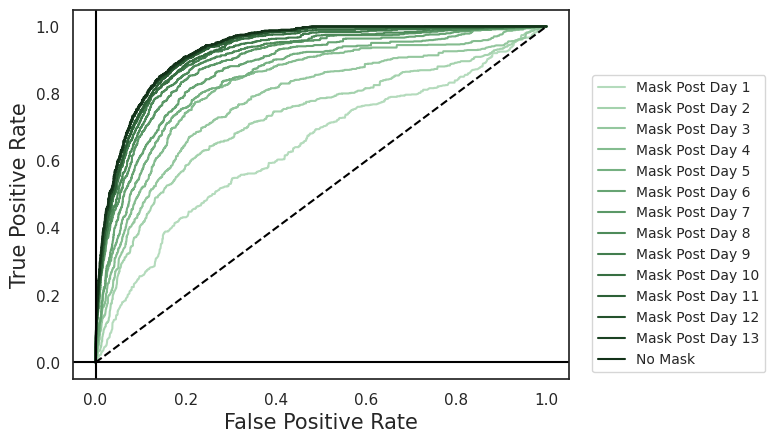

In [ ]:
##############
## FIGURE 1 without attention ##
##############

fig, ax = plt.subplots()
ax.set_facecolor('white')

counter = 1

for color, fpr_tpr_tuple_without_attention in zip(color_list, fpr_tprs_without_attention):
    if counter != 14:
        plt.plot(fpr_tpr_tuple_without_attention[0], fpr_tpr_tuple_without_attention[1], label='Mask Post Day {0}'.format(counter), color=color)
        counter = counter+1
    elif counter == 14:
        plt.plot(fpr_tpr_tuple_without_attention[0], fpr_tpr_tuple_without_attention[1], label='No Mask', color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.41, 0))
plt.savefig(ROOT+'figures/{0}_roc_curves_Fig_1_without_attention.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

In [ ]:
##############################
## FIGURE 2 LAG EXPERIMENTS ##
##############################

### 1 DAY LAGGED EXPERIMENTS ###

### Y_PRED_mask_0_LAG_1 ###

Y_PRED_mask_0_LAG_1 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(1,13)], axis=0)
Y_PRED_mask_0_LAG_2 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(2,13)], axis=0)
Y_PRED_mask_0_LAG_3 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(3,13)], axis=0)
Y_PRED_mask_0_LAG_4 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(4,13)], axis=0)
Y_PRED_mask_0_LAG_5 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(5,13)], axis=0)
Y_PRED_mask_0_LAG_6 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(6,13)], axis=0)
Y_PRED_mask_0_LAG_7 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(7,13)], axis=0)

# below is an equivalent representation

# Y_PRED_mask_0_LAG_1 = np.concatenate([Y_PRED_mask_0[:,1][~y_boolmat_test[:,1,::]],
#                                     Y_PRED_mask_0[:,2][~y_boolmat_test[:,2,::]],
#                                     Y_PRED_mask_0[:,3][~y_boolmat_test[:,3,::]],
#                                     Y_PRED_mask_0[:,4][~y_boolmat_test[:,4,::]],
#                                     Y_PRED_mask_0[:,5][~y_boolmat_test[:,5,::]],
#                                     Y_PRED_mask_0[:,6][~y_boolmat_test[:,6,::]],
#                                     Y_PRED_mask_0[:,7][~y_boolmat_test[:,7,::]],
#                                     Y_PRED_mask_0[:,8][~y_boolmat_test[:,8,::]],
#                                     Y_PRED_mask_0[:,9][~y_boolmat_test[:,9,::]],
#                                     Y_PRED_mask_0[:,10][~y_boolmat_test[:,10,::]],
#                                     Y_PRED_mask_0[:,11][~y_boolmat_test[:,11,::]],
#                                     Y_PRED_mask_0[:,12][~y_boolmat_test[:,12,::]],
#                                     Y_PRED_mask_0[:,13][~y_boolmat_test[:,13,::]]], axis=0)

### all the first day soft every person, all the second days, third days, in a 1D vector

Y_TEST_LAG_1 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(1,14)], axis=0)
Y_TEST_LAG_2 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(2,14)], axis=0)
Y_TEST_LAG_3 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(3,14)], axis=0)
Y_TEST_LAG_4 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(4,14)], axis=0)
Y_TEST_LAG_5 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(5,14)], axis=0)
Y_TEST_LAG_6 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(6,14)], axis=0)
Y_TEST_LAG_7 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(7,14)], axis=0)

#############
## Y_PREDS ##
#############

Y_PRED_LAG_1 = np.concatenate([Y_PRED_mask_1[:,1,::][~y_boolmat_test[:,1,::]],
                             Y_PRED_mask_2[:,2,::][~y_boolmat_test[:,2,::]],
                             Y_PRED_mask_3[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_4[:,4,::][~y_boolmat_test[:,4,:]],
                             Y_PRED_mask_5[:,5,::][~y_boolmat_test[:,5,::]],
                             Y_PRED_mask_6[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_7[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_8[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_9[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_10[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_11[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_12[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_13[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_2 = np.concatenate([Y_PRED_mask_1[:,2,::][~y_boolmat_test[:,2,::]],
                             Y_PRED_mask_2[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_3[:,4,::][~y_boolmat_test[:,4,::]],
                             Y_PRED_mask_4[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_5[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_6[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_7[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_8[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_9[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_10[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_11[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_12[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_3 = np.concatenate([Y_PRED_mask_1[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_2[:,4,::][~y_boolmat_test[:,4,::]],
                             Y_PRED_mask_3[:,5,::][~y_boolmat_test[:,5,::]],
                             Y_PRED_mask_4[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_5[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_6[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_7[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_8[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_9[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_10[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_11[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_4 = np.concatenate([Y_PRED_mask_1[:,4,::][~y_boolmat_test[:,4,:]],
                             Y_PRED_mask_2[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_3[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_4[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_5[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_6[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_7[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_8[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_10[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_5 = np.concatenate([Y_PRED_mask_1[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_2[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_3[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_4[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_6[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_7[:,11,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_8[:,12,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9[:,13,::][~y_boolmat_test[:,12,::]]], axis=0)

Y_PRED_LAG_5 = np.concatenate([Y_PRED_mask_1[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_2[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_3[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_4[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_6[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_7[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_8[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_9[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_6 = np.concatenate([Y_PRED_mask_1[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_2[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_3[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_4[:,9,::][~y_boolmat_test[:,9,:]],
                             Y_PRED_mask_5[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_6[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_7[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_8[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_7 = np.concatenate([Y_PRED_mask_1[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_2[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_3[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_4[:,10,::][~y_boolmat_test[:,10,:]],
                             Y_PRED_mask_5[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_6[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_7[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

## LAG ROC ##

# Day 1 Lag
print(roc_auc_score(Y_TEST_LAG_1, Y_PRED_LAG_1))
# Day 2 Lag
print(roc_auc_score(Y_TEST_LAG_2, Y_PRED_LAG_2))
# # Day 3 Lag
print(roc_auc_score(Y_TEST_LAG_3, Y_PRED_LAG_3))
# Day 4 Lag
print(roc_auc_score(Y_TEST_LAG_4, Y_PRED_LAG_4))
# Day 5 Lag
print(roc_auc_score(Y_TEST_LAG_5, Y_PRED_LAG_5))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_6, Y_PRED_LAG_6))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_7, Y_PRED_LAG_7))

confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1))

## 100% Training Data with 1 day lag ##
TN, FP, FN, TP = confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1)).ravel()
PPV = TP/(TP+FP)
print("PPV for full model w/ 1 day lag is {0}".format(PPV))
CR = classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1))

print("Sensitivity for full model w/ 1 day lag is {0}".format(CR.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1)))

0.8255711198107822
0.7544542357391576
0.7054135360230188
0.6783236184249212
0.6741512108520233
0.6690054323273059
0.6638103381331218
PPV for full model w/ 1 day lag is 0.5625
Sensitivity for full model w/ 1 day lag is 0.26
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      5360
         1.0       0.56      0.26      0.35       915

    accuracy                           0.86      6275
   macro avg       0.72      0.61      0.64      6275
weighted avg       0.84      0.86      0.84      6275



In [ ]:
##############################
## FIGURE 2 LAG EXPERIMENTS WITHOUT ATTENTION ##
##############################

### 1 DAY LAGGED EXPERIMENTS ###

### Y_PRED_mask_0_LAG_1 ###

Y_PRED_mask_0_LAG_1_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(1,13)], axis=0)
Y_PRED_mask_0_LAG_2_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(2,13)], axis=0)
Y_PRED_mask_0_LAG_3_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(3,13)], axis=0)
Y_PRED_mask_0_LAG_4_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(4,13)], axis=0)
Y_PRED_mask_0_LAG_5_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(5,13)], axis=0)
Y_PRED_mask_0_LAG_6_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(6,13)], axis=0)
Y_PRED_mask_0_LAG_7_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(7,13)], axis=0)

# below is an equivalent representation

# Y_PRED_mask_0_LAG_1 = np.concatenate([Y_PRED_mask_0[:,1][~y_boolmat_test[:,1,::]],
#                                     Y_PRED_mask_0[:,2][~y_boolmat_test[:,2,::]],
#                                     Y_PRED_mask_0[:,3][~y_boolmat_test[:,3,::]],
#                                     Y_PRED_mask_0[:,4][~y_boolmat_test[:,4,::]],
#                                     Y_PRED_mask_0[:,5][~y_boolmat_test[:,5,::]],
#                                     Y_PRED_mask_0[:,6][~y_boolmat_test[:,6,::]],
#                                     Y_PRED_mask_0[:,7][~y_boolmat_test[:,7,::]],
#                                     Y_PRED_mask_0[:,8][~y_boolmat_test[:,8,::]],
#                                     Y_PRED_mask_0[:,9][~y_boolmat_test[:,9,::]],
#                                     Y_PRED_mask_0[:,10][~y_boolmat_test[:,10,::]],
#                                     Y_PRED_mask_0[:,11][~y_boolmat_test[:,11,::]],
#                                     Y_PRED_mask_0[:,12][~y_boolmat_test[:,12,::]],
#                                     Y_PRED_mask_0[:,13][~y_boolmat_test[:,13,::]]], axis=0)

### all the first day soft every person, all the second days, third days, in a 1D vector

Y_TEST_LAG_1 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(1,14)], axis=0)
Y_TEST_LAG_2 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(2,14)], axis=0)
Y_TEST_LAG_3 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(3,14)], axis=0)
Y_TEST_LAG_4 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(4,14)], axis=0)
Y_TEST_LAG_5 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(5,14)], axis=0)
Y_TEST_LAG_6 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(6,14)], axis=0)
Y_TEST_LAG_7 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(7,14)], axis=0)

#############
## Y_PREDS ##
#############

Y_PRED_LAG_1_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,1,::][~y_boolmat_test[:,1,::]],
                             Y_PRED_mask_2_without_attention[:,2,::][~y_boolmat_test[:,2,::]],
                             Y_PRED_mask_3_without_attention[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_4_without_attention[:,4,::][~y_boolmat_test[:,4,:]],
                             Y_PRED_mask_5_without_attention[:,5,::][~y_boolmat_test[:,5,::]],
                             Y_PRED_mask_6_without_attention[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_7_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_8_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_9_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_10_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_11_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_12_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_13_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_2_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,2,::][~y_boolmat_test[:,2,::]],
                             Y_PRED_mask_2_without_attention[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_3_without_attention[:,4,::][~y_boolmat_test[:,4,::]],
                             Y_PRED_mask_4_without_attention[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_5_without_attention[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_6_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_7_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_8_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_9_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_10_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_11_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_12_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_3_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_2_without_attention[:,4,::][~y_boolmat_test[:,4,::]],
                             Y_PRED_mask_3_without_attention[:,5,::][~y_boolmat_test[:,5,::]],
                             Y_PRED_mask_4_without_attention[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_5_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_6_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_7_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_8_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_9_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_10_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_11_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_4_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,4,::][~y_boolmat_test[:,4,:]],
                             Y_PRED_mask_2_without_attention[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_3_without_attention[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_4_without_attention[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_5_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_6_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_7_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_8_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_10_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_5_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_2_without_attention[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_3_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_4_without_attention[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_6_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_7_without_attention[:,11,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_8_without_attention[:,12,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9_without_attention[:,13,::][~y_boolmat_test[:,12,::]]], axis=0)

Y_PRED_LAG_5_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_2_without_attention[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_3_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_4_without_attention[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_6_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_7_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_8_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_9_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_6_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_2_without_attention[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_3_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_4_without_attention[:,9,::][~y_boolmat_test[:,9,:]],
                             Y_PRED_mask_5_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_6_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_7_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_8_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_7_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_2_without_attention[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_3_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_4_without_attention[:,10,::][~y_boolmat_test[:,10,:]],
                             Y_PRED_mask_5_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_6_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_7_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

## LAG ROC ##

# Day 1 Lag
print(roc_auc_score(Y_TEST_LAG_1, Y_PRED_LAG_1_without_attention))
# Day 2 Lag
print(roc_auc_score(Y_TEST_LAG_2, Y_PRED_LAG_2_without_attention))
# # Day 3 Lag
print(roc_auc_score(Y_TEST_LAG_3, Y_PRED_LAG_3_without_attention))
# Day 4 Lag
print(roc_auc_score(Y_TEST_LAG_4, Y_PRED_LAG_4_without_attention))
# Day 5 Lag
print(roc_auc_score(Y_TEST_LAG_5, Y_PRED_LAG_5_without_attention))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_6, Y_PRED_LAG_6_without_attention))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_7, Y_PRED_LAG_7_without_attention))

confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1_without_attention))

## 100% Training Data with 1 day lag ##
TN_without_attention, FP_without_attention, FN_without_attention, TP_without_attention = confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1_without_attention)).ravel()
PPV_without_attention = TP_without_attention/(TP_without_attention+FP_without_attention)
print("PPV for full model(without attention)  w/ 1 day lag is {0}".format(PPV_without_attention))
CR_without_attention = classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1_without_attention))

print("Sensitivity for full model(without attention) w/ 1 day lag is {0}".format(CR_without_attention.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1_without_attention)))

0.8394806704183998
0.7686766134909709
0.7127225061226866
0.6825085982882244
0.6724905613637511
0.6604175619538748
0.6584260659082836
PPV for full model(without attention)  w/ 1 day lag is 0.5234493192133132
Sensitivity for full model(without attention) w/ 1 day lag is 0.38
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      5360
         1.0       0.52      0.38      0.44       915

    accuracy                           0.86      6275
   macro avg       0.71      0.66      0.68      6275
weighted avg       0.84      0.86      0.85      6275



In [ ]:
(fpr_mask_1, tpr_mask_1, thresholds_mask_1) = roc_curve(Y_TEST_LAG_1, Y_PRED_LAG_1)
(fpr_mask_2, tpr_mask_2, thresholds_mask_2) = roc_curve(Y_TEST_LAG_2, Y_PRED_LAG_2)
(fpr_mask_3, tpr_mask_3, thresholds_mask_3) = roc_curve(Y_TEST_LAG_3, Y_PRED_LAG_3)
(fpr_mask_4, tpr_mask_4, thresholds_mask_4) = roc_curve(Y_TEST_LAG_4, Y_PRED_LAG_4)
(fpr_mask_5, tpr_mask_5, thresholds_mask_5) = roc_curve(Y_TEST_LAG_5, Y_PRED_LAG_5)
(fpr_mask_6, tpr_mask_6, thresholds_mask_6) = roc_curve(Y_TEST_LAG_6, Y_PRED_LAG_6)
(fpr_mask_7, tpr_mask_7, thresholds_mask_7) = roc_curve(Y_TEST_LAG_7, Y_PRED_LAG_7)

fpr_tprs = [(fpr_mask_1, tpr_mask_1), (fpr_mask_2, tpr_mask_2), (fpr_mask_3, tpr_mask_3), (fpr_mask_4, tpr_mask_4),
            (fpr_mask_5, tpr_mask_5), (fpr_mask_6, tpr_mask_6), (fpr_mask_7, tpr_mask_7), (fpr_mask_8, tpr_mask_8),
            (fpr_mask_9, tpr_mask_9), (fpr_mask_10, tpr_mask_10), (fpr_mask_11, tpr_mask_11), (fpr_mask_12, tpr_mask_12),
            (fpr_mask_13, tpr_mask_13), (fpr_mask_0, tpr_mask_0)]

In [ ]:
(fpr_mask_1_without_attention, tpr_mask_1_without_attention, thresholds_mask_1_without_attention) = roc_curve(Y_TEST_LAG_1, Y_PRED_LAG_1_without_attention)
(fpr_mask_2_without_attention, tpr_mask_2_without_attention, thresholds_mask_2_without_attention) = roc_curve(Y_TEST_LAG_2, Y_PRED_LAG_2_without_attention)
(fpr_mask_3_without_attention, tpr_mask_3_without_attention, thresholds_mask_3_without_attention) = roc_curve(Y_TEST_LAG_3, Y_PRED_LAG_3_without_attention)
(fpr_mask_4_without_attention, tpr_mask_4_without_attention, thresholds_mask_4_without_attention) = roc_curve(Y_TEST_LAG_4, Y_PRED_LAG_4_without_attention)
(fpr_mask_5_without_attention, tpr_mask_5_without_attention, thresholds_mask_5_without_attention) = roc_curve(Y_TEST_LAG_5, Y_PRED_LAG_5_without_attention)
(fpr_mask_6_without_attention, tpr_mask_6_without_attention, thresholds_mask_6_without_attention) = roc_curve(Y_TEST_LAG_6, Y_PRED_LAG_6_without_attention)
(fpr_mask_7_without_attention, tpr_mask_7_without_attention, thresholds_mask_7_without_attention) = roc_curve(Y_TEST_LAG_7, Y_PRED_LAG_7_without_attention)

fpr_tprs_without_attention = [(fpr_mask_1_without_attention, tpr_mask_1_without_attention), (fpr_mask_2_without_attention, tpr_mask_2_without_attention), (fpr_mask_3_without_attention, tpr_mask_3_without_attention), (fpr_mask_4_without_attention, tpr_mask_4_without_attention),
            (fpr_mask_5_without_attention, tpr_mask_5_without_attention), (fpr_mask_6_without_attention, tpr_mask_6_without_attention), (fpr_mask_7_without_attention, tpr_mask_7_without_attention), (fpr_mask_8_without_attention, tpr_mask_8_without_attention),
            (fpr_mask_9_without_attention, tpr_mask_9_without_attention), (fpr_mask_10_without_attention, tpr_mask_10_without_attention), (fpr_mask_11_without_attention, tpr_mask_11_without_attention), (fpr_mask_12_without_attention, tpr_mask_12_without_attention),
            (fpr_mask_13_without_attention, tpr_mask_13_without_attention), (fpr_mask_0_without_attention, tpr_mask_0_without_attention)]

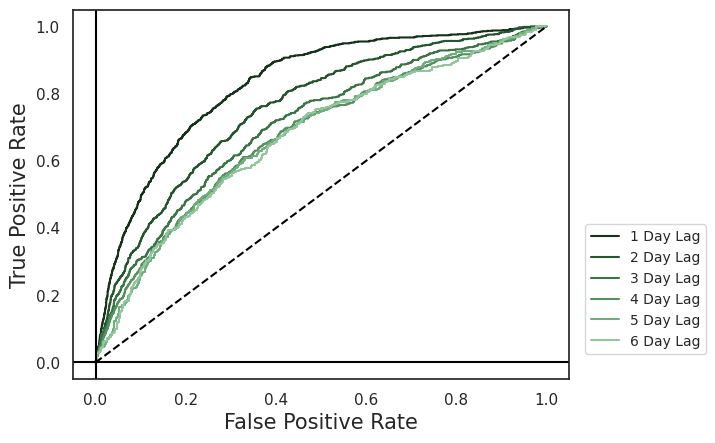

In [ ]:
fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[-1:0:-1], fpr_tprs, range(1,8)):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0} Day Lag'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.29, 0.05))
plt.savefig(ROOT+'figures/{0}_lagged_roc_curves_Fig_2.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

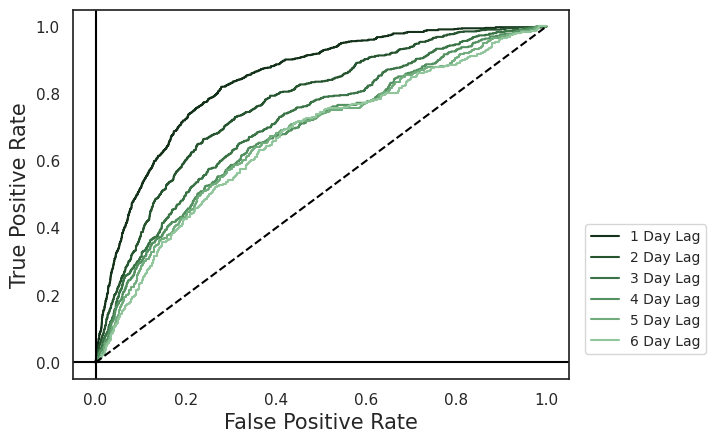

In [ ]:
fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[-1:0:-1], fpr_tprs_without_attention, range(1,8)):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0} Day Lag'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.29, 0.05))
plt.savefig(ROOT+'figures/{0}_lagged_roc_curves_Fig_2.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

<ipython-input-231-8d81daee8518>:11: RuntimeWarning: Mean of empty slice
  heatmap(np.nanmean(activations,axis=0).T[arranged_indices],
<ipython-input-231-8d81daee8518>:27: RuntimeWarning: Mean of empty slice
  y_vector = np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1)
<ipython-input-231-8d81daee8518>:30: RuntimeWarning: Mean of empty slice
  plot = sns.barplot(x=list(range(14)), y=np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1),
<ipython-input-231-8d81daee8518>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=list(range(14)), y=np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1),
<ipython-input-231-8d81daee8518>:30: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  plot = sns.barplot(x=list(range(14)), y=

There is a 0.057618208339863294 % change between day 0 and 1


<ipython-input-231-8d81daee8518>:43: RuntimeWarning: Mean of empty slice
  y_vector = np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0)
<ipython-input-231-8d81daee8518>:45: RuntimeWarning: Mean of empty slice
  plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
<ipython-input-231-8d81daee8518>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
<ipython-input-231-8d81daee8518>:45: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
<ipython-input-231-8d81daee8518>:

['nitroglycerin' 'hemocrit_max' 'temperature (f)_std' 'asprin'
 'temperature (f)_std' 'neostigmine' 'creatinine_std' 'potassium_med'
 'smx-tmp' 'albuterol' 'acetominophen' 'inr_std' 'acetominophen'
 'rbcs_std']


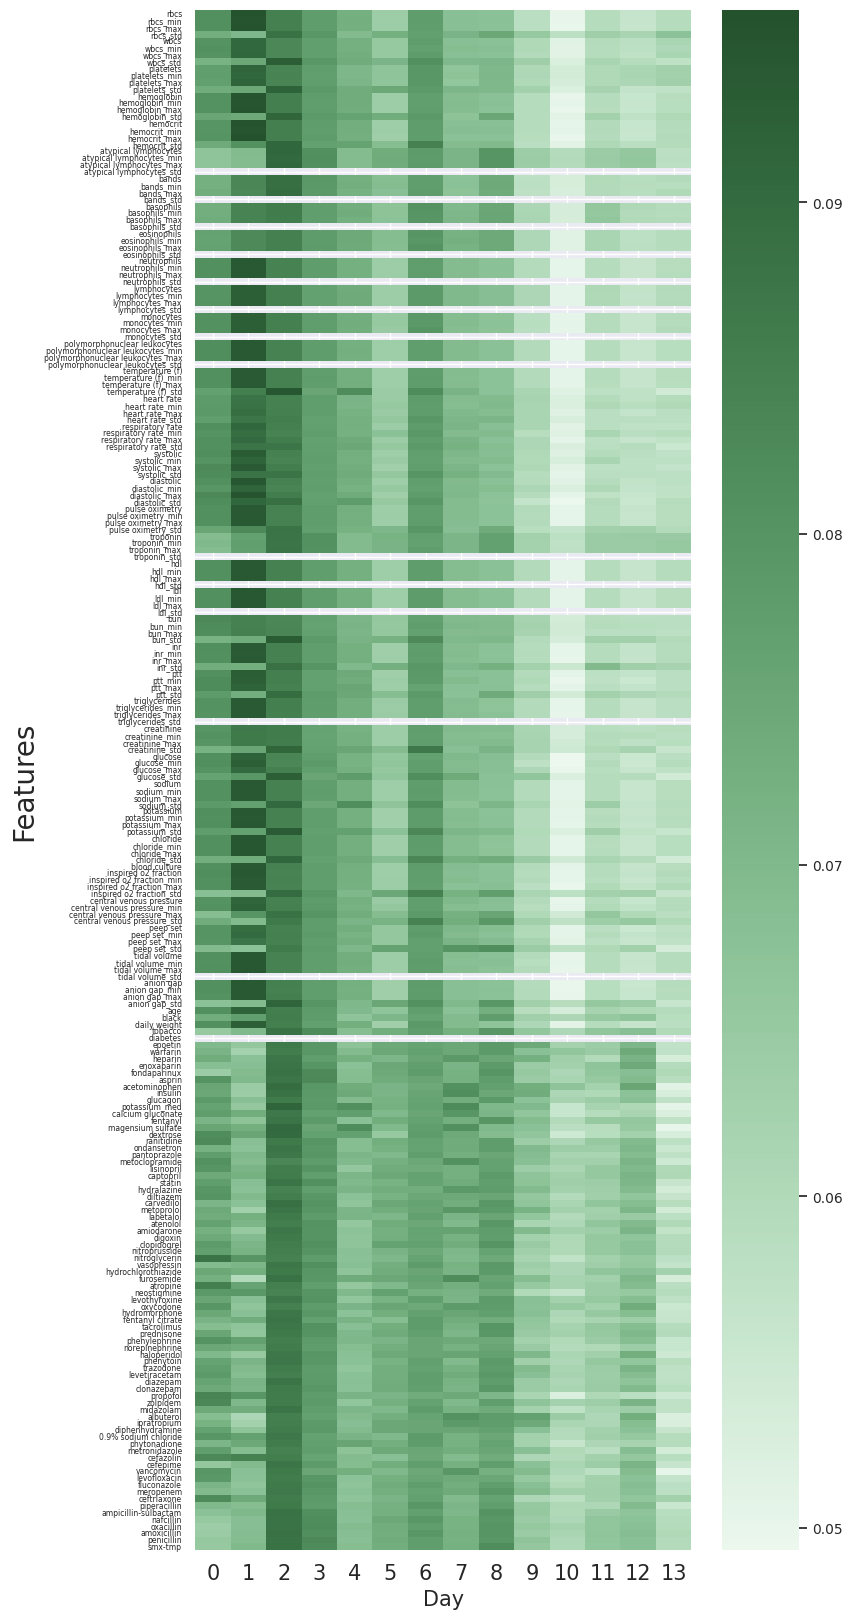

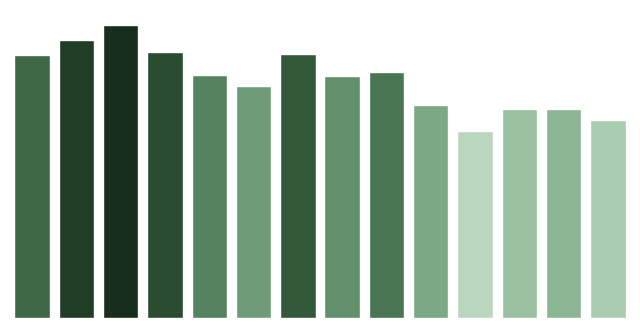

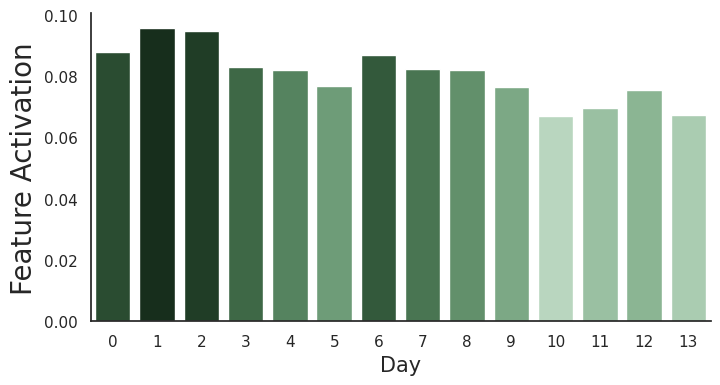

In [ ]:
##############
## FIGURE 3 ##
##############

## GET HEATMAPS FOR ALL INCIDENTS AVERAGE ##

plt.figure(figsize = (8,20))

sns.set(font_scale = 0.5)

heatmap(np.nanmean(activations,axis=0).T[arranged_indices],
        square=False,
        yticklabels=np.array(features)[arranged_indices],
        cmap=my_cmap)
plt.gcf().axes[-1].tick_params(labelsize=10)
plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Features', fontsize=20)
plt.savefig(ROOT+'figures/heatmap_{0}_med_ranked_average_activation_Figure_3.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## MAKE THE BARPLOT THAT GOES ON TOP OF THE HEATMAP ##
## THE ATTENTION ON EVERY TIME STEP AVERAGED OVER FEATURES ##

plt.figure(figsize = (8,4))
sns.set(style="white")
y_vector = np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1)
print('There is a {0} % change between day 0 and 1'.format((y_vector[1] - y_vector[0])/float(y_vector[0])))
color_rank = np.argsort(np.argsort(y_vector))
plot = sns.barplot(x=list(range(14)), y=np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1),
                    palette=np.array(color_list)[color_rank])
plot.set(xticklabels=[])
plot.set(yticklabels=[])
sns.despine(left=True, bottom=True)

plt.savefig(ROOT+'figures/heatmap_{0}_med_ranked_average_barplot_Figure_3.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## IDENTIFY MOST IMPORTANT FEATURE AT EVERY TIME STEP ##

plt.figure(figsize = (8,4))
sns.set(style="white")
y_vector = np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0)
color_rank = np.argsort(np.argsort(y_vector))
plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
                    palette=np.array(color_list)[color_rank])
plt.xlabel('Day', fontsize=15)
plt.ylabel('Feature Activation', fontsize=20)
sns.despine()# left=True, bottom=True)

plt.savefig(ROOT+'figures/{0}_highest_feature_activation_by_timestep_barplot_Figure_3.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## list of features by day that these activations correspond to ##

np.nanargmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0)
print(np.array(features)[arranged_indices][np.nanargmax(np.nanmean(activations, axis=0).T[arranged_indices],
                                                     axis=0)])
#####

In [ ]:
def find_intrahospital_incidents():
    IHI_keys =  np.where(np.nansum(Y_TEST.squeeze(), axis=1) > 1)[0]
    for i in IHI_keys:
        predictions = Y_PRED_mask_0[i][~y_boolmat_test[i].squeeze()].squeeze()
        predictions_without_attention = Y_PRED_mask_0_without_attention[i][~y_boolmat_test[i].squeeze()].squeeze()
        ground_truth = Y_TEST[i].squeeze()[~y_boolmat_test[i].squeeze()].squeeze()
        acc = accuracy_score(np.around(predictions), ground_truth)
        acc_without_attention = accuracy_score(np.around(predictions_without_attention), ground_truth)
        criteria = (acc > .9 and
#                    np.around(predictions[0]) == 0 and
                    (np.add(ground_truth, np.around(predictions)) == 2).any()  and
                    (ground_truth[0] == 0) and
                    (np.sum(ground_truth[0:2]) == 0) and
#                    (np.sum(ground_truth) > 1) and
                    ground_truth.shape[0] == 14)
        if criteria:
            print("Person {0} with IHI".format(i))
            print('Ground Truth')
            print(ground_truth)
            print('Predicted Sequence')
            print(np.around(predictions))
            print('Predicted Sequence without attention')
            print(np.around(predictions_without_attention))
            print('\n')

find_intrahospital_incidents()

Person 113 with IHI
Ground Truth
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
Predicted Sequence
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
Predicted Sequence without attention
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]


Person 229 with IHI
Ground Truth
[0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Predicted Sequence
[0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
Predicted Sequence without attention
[0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


Person 284 with IHI
Ground Truth
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
Predicted Sequence
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Predicted Sequence without attention
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]


Person 387 with IHI
Ground Truth
[0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
Predicted Sequence
[0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
Predicted Sequence without attention
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Person 680 with IHI
Ground Truth
[0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
Predicted Sequence
[0. 0. 0. 1.

In [ ]:
if target == 'MI':
    patient_num = 3947
elif target == 'SEPSIS':
    patient_num = 387
elif target == 'VANCOMYCIN':
    patient_num = 547

In [ ]:
def patient_heatmap(patient_num, savefig=False, target=None):

        if target == None:
            raise Exception('Specify Target')

        print('\n')
        print('Visualize Inputs')
        print('Ground Truth')
        ground_truth = Y_TEST[patient_num].squeeze()[~y_boolmat_test[patient_num].squeeze()]
        print(ground_truth)
        print('Predicted Sequence')
        predictions = Y_PRED_mask_0[patient_num].squeeze()[~y_boolmat_test[patient_num].squeeze()]
        print(np.around(predictions))

        if target == 'MI':
            color_list_barplot = sns.color_palette("Reds", ground_truth.shape[0])
        elif target == 'SEPSIS':
            color_list_barplot = sns.cubehelix_palette(ground_truth.shape[0], start=2, rot=0, dark=0.25, light=.95)
        elif target == 'VANCOMYCIN':
            color_list_barplot = sns.cubehelix_palette(ground_truth.shape[0])

        print('Individual Heatmap')
        plt.figure(figsize = (8,20))
        sns.set(font_scale = 0.5)

    #    activations_map = np.nanmean(activations,axis=0)/(np.nanmax(np.nanmean(activations, axis=0), axis=1))[:,None]
        activations_map = activations[patient_num]/np.nanmax(activations[patient_num,::,::], axis=1)[:,None]
        heatmap(activations[patient_num].T[arranged_indices],
                       square=False,
#                      vmin=np.amin(activations[patient_num,:,:]),
#                      vmax=np.amax(activations[patient_num,:,:]),
                     yticklabels=np.array(features)[arranged_indices], cmap=my_cmap)
        plt.gcf().axes[-1].tick_params(labelsize=10)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15)
        plt.yticks(fontsize=8)
        plt.xlabel('Day', fontsize=20)
        plt.ylabel('Features', fontsize=20)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)

        if savefig:
            plt.savefig(ROOT+'figures/heatmap_{0}_patient_{1}.eps'.format(target, patient_num),
                        format='eps', dpi=300, bbox_inches='tight')

        rel_vector = np.nanmean(activations[patient_num,::,::].T.squeeze(), axis=0)
        rel_vector = rel_vector[~y_boolmat_test[patient_num].squeeze()]
        color_order = np.argsort(rel_vector, axis=0)
        color_order_order = np.argsort(color_order)

        plt.figure(figsize = (8,4))
        sns.set(style="white")
        plot = sns.barplot(x=np.arange(14)[~y_boolmat_test[patient_num].squeeze()], y=rel_vector,
                           palette=np.array(color_list_barplot)[color_order_order])
        plot.set(xticklabels=[])
        plot.set(yticklabels=[])
        sns.despine(left=True, bottom=True)

        print('Patient Features Heatmap')
        if savefig:
            plt.savefig(ROOT+'figures/barplot_for_heatmap_{0}_patient_{1}.eps'.format(target, patient_num),
                        format='eps', dpi=300, bbox_inches='tight')

        plt.figure(figsize= (8,20))
        sns.set(font_scale = 0.5)
        activations_map = X_TEST[patient_num,::,::]/np.nanmax(X_TEST[patient_num,::,::], axis=0) #[:,None]
        heatmap(X_TEST[patient_num,::,::].T[arranged_indices], square=False,
                yticklabels=np.array(features)[arranged_indices],
                cmap=my_cmap) #, cbar_kws={'ticks':[]})
        plt.gcf().axes[-1].tick_params(labelsize=10)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)
        plt.yticks(fontsize=8)
        plt.xlabel('Day', fontsize=20)
        plt.ylabel('Features', fontsize=20)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)
        if savefig:
            plt.savefig(ROOT+'figures/features_heatmap_{0}_patient_{1}.eps'.format(target, patient_num),
                        format='eps', dpi=300, bbox_inches='tight')

        rel_vector = np.nanmean(X_TEST[patient_num,::,::].T.squeeze(), axis=0)[~y_boolmat_test[patient_num].squeeze()]
        color_order = np.argsort(rel_vector, axis=0)
        color_order_order = np.argsort(color_order)

        plt.figure(figsize = (8,4))
        sns.set(style="white")
        plot = sns.barplot(x=np.arange(14)[~y_boolmat_test[patient_num].squeeze()], y=rel_vector,
                           palette=np.array(color_list_barplot)[color_order_order])
        plot.set(xticklabels=[])
        plot.set(yticklabels=[])
        sns.despine(left=True, bottom=True)
        if savefig:
            plt.savefig(ROOT+'figures/barplot_features_heatmap_{0}_patient_{1}.eps'.format(target, patient_num),
                        format='eps', dpi=300, bbox_inches='tight')

[0.442896   0.23696582 0.15680844 0.23944455 0.13378578 0.27667713
 0.2189004  0.31737456 0.13835481 0.51172715 0.15415014 0.09605623
 0.16370377 0.1752946 ]
3.2621396


<ipython-input-235-5e1517b7b79a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=days_string, y=y_vector[days],
<ipython-input-235-5e1517b7b79a>:25: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  plot = sns.barplot(x=days_string, y=y_vector[days],


['platelets_min' 'platelets_std' 'dextrose']
[0.15680844 0.23944455 0.13378578]


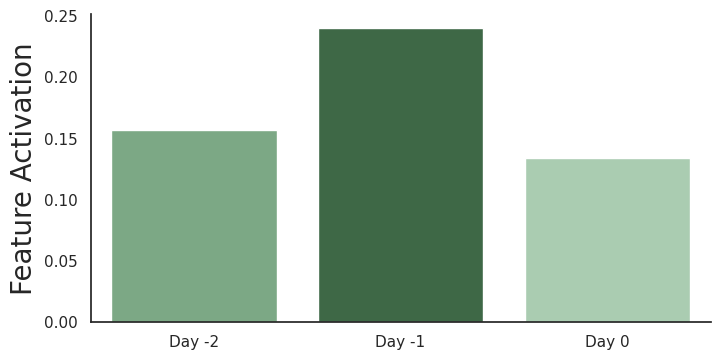

In [ ]:
## Get the top activations for that day, the day before, the day before ##

def features_driving_incident(patient_num, savefig=False):

    plt.figure(figsize = (8,4))
    sns.set(style="white")

    if np.where(Y_TEST[patient_num] == 1)[0][0] == 1:
        day_zero = 1
        day_neg_one = 0
        days = np.array([day_neg_one, day_zero])
        days_string = ['Day -1', 'Day 0']
    else:
        assert np.where(Y_TEST[patient_num] == 1)[0][0] >= 2
        day_zero = np.where(Y_TEST[patient_num] == 1)[0][0]
        day_neg_one = day_zero - 1
        day_neg_two = day_zero - 2
        days = np.array([day_neg_two, day_neg_one, day_zero])
        days_string = ['Day -2', 'Day -1', 'Day 0']

    y_vector = np.nanmax(activations[patient_num], axis=1) #[days]
    print(y_vector)
    print(np.nansum(y_vector))
    color_rank = np.argsort(np.argsort(y_vector))
    plot = sns.barplot(x=days_string, y=y_vector[days],
                       palette=np.array(color_list)[color_rank][days])
    plt.ylabel('Feature Activation', fontsize=20)
        #plot.set(xticklabels=[])
        #plot.set(yticklabels=[])
    sns.despine() # left=True, bottom=True)

    if savefig:
        plt.savefig(ROOT+'figures/max_activation_pre_incident_barplot_Figure_4_{0}_patient_{1}.eps'.format(target, patient_num),
             format='eps', dpi=300, bbox_inches='tight')

    ## list of features by day that these activations correspond to ##

    print(np.array(features)[np.nanargmax(activations[patient_num], axis=1)][days])
    print(np.nanmax(activations[patient_num], axis=1)[days])

#####

features_driving_incident(patient_num, savefig=True)

#####

In [ ]:
print(activations[patient_num].shape)

print(activations[patient_num].T[features.index('phenylephrine'),1])

#activations[patient_num][list(np.array(features)[arranged_indices]).index('levothyroxine'),0]

(14, 224)
0.068276584


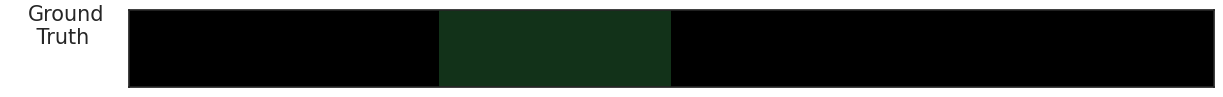

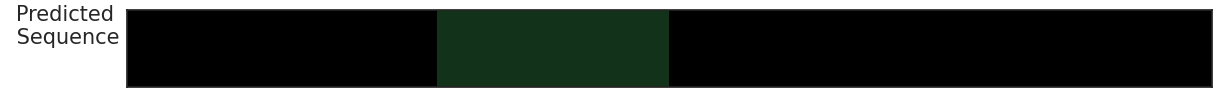

In [ ]:
## FIGURE 4 ##

def predictions_labels_palplot(patient_num, savefig=False):

    color_list_gt = np.array(color_list.copy())
    color_list_gt[Y_TEST[patient_num].squeeze() == 1] = color_list_gt[-1]
    color_list_gt[Y_TEST[patient_num].squeeze() == 0] = [0,0,0]
    sns.palplot(color_list_gt)
    plt.ylabel('Ground\n    Truth     ', fontsize=15, rotation='horizontal', labelpad=45) #.set_rotation(0)

    if savefig:
        plt.savefig(ROOT+'figures/{0}_GT_labels_Figure_4.eps'.format(target), format='eps',
                dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

    color_list_pred = np.array(color_list.copy())
    color_list_pred[np.around(Y_PRED_mask_0[patient_num].squeeze()) == 1] = color_list_pred[-1]
    color_list_pred[np.around(Y_PRED_mask_0[patient_num].squeeze()) == 0] = [0,0,0]
    sns.palplot(color_list_pred)
    plt.ylabel('Predicted\n Sequence', fontsize=15, rotation='horizontal', labelpad=45)
    if savefig:
        plt.savefig(ROOT+'figures/{0}_PRED_labels_Figure_4.eps'.format(target), format='eps',
                   dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,),
                    bbox_inches='tight')

predictions_labels_palplot(patient_num, savefig=True)

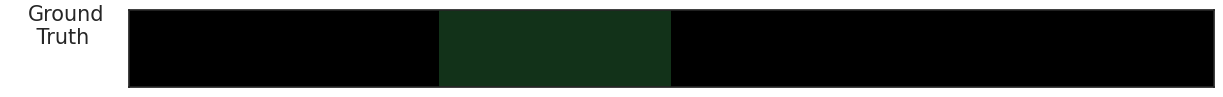

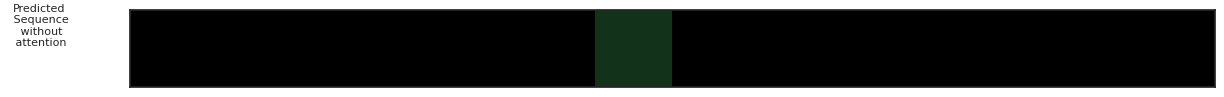

In [ ]:
## FIGURE 4 WITHOUT ATTENTION##

def predictions_labels_palplot_without_attention(patient_num, savefig=False):

    color_list_gt = np.array(color_list.copy())
    color_list_gt[Y_TEST[patient_num].squeeze() == 1] = color_list_gt[-1]
    color_list_gt[Y_TEST[patient_num].squeeze() == 0] = [0,0,0]
    sns.palplot(color_list_gt)
    plt.ylabel('Ground\n    Truth     ', fontsize=15, rotation='horizontal', labelpad=45) #.set_rotation(0)

    if savefig:
        plt.savefig(ROOT+'figures/{0}_GT_labels_Figure_4_without_attention.eps'.format(target), format='eps',
                dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

    color_list_pred = np.array(color_list.copy())
    color_list_pred[np.around(Y_PRED_mask_0_without_attention[patient_num].squeeze()) == 1] = color_list_pred[-1]
    color_list_pred[np.around(Y_PRED_mask_0_without_attention[patient_num].squeeze()) == 0] = [0,0,0]
    sns.palplot(color_list_pred)
    plt.ylabel('Predicted\n Sequence\n without\n attention', fontsize=8, rotation='horizontal', labelpad=65)
    if savefig:
        plt.savefig(ROOT+'figures/{0}_PRED_labels_Figure_4_without_attention.eps'.format(target), format='eps',
                   dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,),
                    bbox_inches='tight')

predictions_labels_palplot_without_attention(patient_num, savefig=True)

In [ ]:
# TODO use the get_activations function in combo with the graphs created to populate this section

### Target: MI

#### Training

In [ ]:
target = 'MI'

In [ ]:
## PICKLE LOADS
ROOT = "/content/drive/MyDrive/Colab Notebooks/"

X_TRAIN_MI = pickle.load(open(ROOT+'pickled_objects/X_TRAIN_MI.txt', 'rb'))
X_TRAIN_SEPSIS = pickle.load(open(ROOT+'pickled_objects/X_TRAIN_SEPSIS.txt', 'rb'))
X_TRAIN_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/X_TRAIN_VANCOMYCIN.txt', 'rb'))

Y_TRAIN_MI = pickle.load(open(ROOT+'pickled_objects/Y_TRAIN_MI.txt', 'rb'))
Y_TRAIN_SEPSIS = pickle.load(open(ROOT+'pickled_objects/Y_TRAIN_SEPSIS.txt', 'rb'))
Y_TRAIN_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/Y_TRAIN_VANCOMYCIN.txt', 'rb'))

Y_VAL_MI = pickle.load(open(ROOT+'pickled_objects/Y_VAL_MI.txt', 'rb'))
Y_VAL_SEPSIS = pickle.load(open(ROOT+'pickled_objects/Y_VAL_SEPSIS.txt', 'rb'))
Y_VAL_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/Y_VAL_VANCOMYCIN.txt', 'rb'))

X_VAL_MI = pickle.load(open(ROOT+'pickled_objects/X_VAL_MI.txt', 'rb'))
X_VAL_SEPSIS = pickle.load(open(ROOT+'pickled_objects/X_VAL_SEPSIS.txt', 'rb'))
X_VAL_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/X_VAL_VANCOMYCIN.txt', 'rb'))

Y_TEST_MI = pickle.load(open(ROOT+'pickled_objects/Y_TEST_MI.txt', 'rb'))
Y_TEST_SEPSIS = pickle.load(open(ROOT+'pickled_objects/Y_TEST_SEPSIS.txt', 'rb'))
Y_TEST_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/Y_TEST_VANCOMYCIN.txt', 'rb'))

X_TEST_MI = pickle.load(open(ROOT+'pickled_objects/X_TEST_MI.txt', 'rb'))
X_TEST_SEPSIS = pickle.load(open(ROOT+'pickled_objects/X_TEST_SEPSIS.txt', 'rb'))
X_TEST_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/X_TEST_VANCOMYCIN.txt', 'rb'))

y_boolmat_test_MI = pickle.load(open(ROOT+'pickled_objects/y_boolmat_test_MI.txt', 'rb'))
y_boolmat_test_SEPSIS = pickle.load(open(ROOT+'pickled_objects/y_boolmat_test_SEPSIS.txt', 'rb'))
y_boolmat_test_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/y_boolmat_test_VANCOMYCIN.txt', 'rb'))

x_boolmat_test_MI = pickle.load(open(ROOT+'pickled_objects/x_boolmat_test_MI.txt', 'rb'))
x_boolmat_test_SEPSIS = pickle.load(open(ROOT+'pickled_objects/x_boolmat_test_SEPSIS.txt', 'rb'))
x_boolmat_test_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/x_boolmat_test_VANCOMYCIN.txt', 'rb'))

no_features_cols_MI = pickle.load(open(ROOT+'pickled_objects/no_feature_cols_MI.txt', 'rb'))
no_features_cols_SEPSIS = pickle.load(open(ROOT+'pickled_objects/no_feature_cols_SEPSIS.txt', 'rb'))
no_features_cols_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/no_feature_cols_VANCOMYCIN.txt', 'rb'))

features_MI = pickle.load(open(ROOT+'pickled_objects/features_MI.txt', 'rb'))
features_SEPSIS = pickle.load(open(ROOT+'pickled_objects/features_SEPSIS.txt', 'rb'))
features_VANCOMYCIN = pickle.load(open(ROOT+'pickled_objects/features_VANCOMYCIN.txt', 'rb'))

if target == 'MI':
    my_cmap = ListedColormap(sns.color_palette("Reds", 150))
    color_list = sns.color_palette("Reds", 14)
    color_list_reduced = sns.color_palette("Reds", 7)
    X_TRAIN = X_TRAIN_MI
    X_VAL = X_VAL_MI
    Y_TRAIN = Y_TRAIN_MI
    Y_VAL = Y_VAL_MI
    Y_TEST = Y_TEST_MI
    X_TEST = X_TEST_MI
    y_boolmat_test = y_boolmat_test_MI
    x_boolmat_test = x_boolmat_test_MI
    features = features_MI

elif target == 'SEPSIS':
    my_cmap = sns.cubehelix_palette(14, start=2, rot=0, dark=0.25, light=.95, as_cmap=True)
    color_list = sns.cubehelix_palette(14, start=2, rot=0, dark=0.15, light=.8)
    color_list_reduced = sns.cubehelix_palette(7, start=2, rot=0, dark=0.15, light=.8)
    X_TRAIN = X_TRAIN_SEPSIS
    X_VAL = X_VAL_SEPSIS
    Y_TRAIN = Y_TRAIN_SEPSIS
    Y_VAL = Y_VAL_SEPSIS
    Y_TEST = Y_TEST_SEPSIS
    X_TEST = X_TEST_SEPSIS
    y_boolmat_test = y_boolmat_test_SEPSIS
    x_boolmat_test = x_boolmat_test_SEPSIS
    features = features_SEPSIS

elif target == 'VANCOMYCIN':
    my_cmap= sns.cubehelix_palette(14, as_cmap=True)
    color_list = sns.cubehelix_palette(14)
    color_list_reduced = sns.cubehelix_palette(7)
    X_TRAIN = X_TRAIN_VANCOMYCIN
    X_VAL = X_VAL_VANCOMYCIN
    Y_TRAIN = Y_TRAIN_VANCOMYCIN
    Y_VAL = Y_VAL_VANCOMYCIN
    Y_TEST = Y_TEST_VANCOMYCIN
    X_TEST = X_TEST_VANCOMYCIN
    y_boolmat_test = y_boolmat_test_VANCOMYCIN
    x_boolmat_test = x_boolmat_test_VANCOMYCIN
    features = features_VANCOMYCIN

# Y_TRAIN[Y_TRAIN == -1] = np.nan
# Y_VAL[Y_VAL == -1] = np.nan
# Y_TEST[Y_TEST == -1] = np.nan
Y_TOTAL = np.concatenate([Y_TRAIN, Y_VAL, Y_TEST], axis=0)

In [ ]:
Y_MI = np.concatenate([Y_TRAIN_MI, Y_VAL_MI], axis=0)
Y_SEPSIS = np.concatenate([Y_TRAIN_SEPSIS, Y_VAL_SEPSIS], axis=0)
Y_VANCOMYCIN = np.concatenate([Y_TRAIN_VANCOMYCIN, Y_VAL_VANCOMYCIN], axis=0)

In [ ]:
''' this function is adapted from Keras documentation '''

def get_activations(model, inputs, print_shape_only=False, layer_name=None, verbose=False):

    """
    Get activations from a model
    Args:
        model: a keras model
        inputs: the inputs for the model
        print_shape_only: whether to print the shape of the layer or the whole activation layer
        layer_name: name of specific layer to return
        verbose: whether to show all outputs
    Returns:
        activations: list, list of activations
    """
    activations = []
    inp = model.input
    if layer_name is None:
        outputs = [layer.output for layer in model.layers]
    else:
        outputs = [layer.output for layer in model.layers if layer.name == layer_name]  # all layer outputs
    funcs = [K.function([inp], [out]) for out in outputs]  # evaluation functions
    K.set_learning_phase(1)
    layer_outputs = [func([inputs])[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if verbose:
            print('----- activations -----')
            if print_shape_only:
                print(layer_activations.shape)
            else:
                print(layer_activations)
    return activations

def normalize_activations(activations_matrix):
    means = np.nanmean(activations_matrix, axis=0)
    stds = np.nanstd(activations_matrix, axis=0)
    return (activations_matrix - means) / stds

In [ ]:
TIME_STEPS = X_VAL.shape[1] #number of time_steps

In [ ]:
if target == 'MI':
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14")
    m_80 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_80_percent")
    m_60 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_60_percent")
    m_40 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_40_percent")
    m_20 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_20_percent")
    m_10 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_10_percent")
    m_5 = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_5_percent")
   # m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_bench")
elif target == 'SEPSIS':
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14")
    m_80 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_80_percent")
    m_60 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_60_percent")
    m_40 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_40_percent")
    m_20 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_20_percent")
    m_10 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_10_percent")
    m_5 = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_5_percent")
    #m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_bench")
elif target == 'VANCOMYCIN':
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14")
    m_80 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_80_percent")
    m_60 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_60_percent")
    m_40 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_40_percent")
    m_20 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_20_percent")
    m_10 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_10_percent")
    m_5 = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_5_percent")
    #m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_bench")

In [ ]:
if target == 'MI':
    m_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_without_attention")
    m_80_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_80_percent_without_attention")
    m_60_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_60_percent_without_attention")
    m_40_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_40_percent_without_attention")
    m_20_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_20_percent_without_attention")
    m_10_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_10_percent_without_attention")
    m_5_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_5_percent_without_attention")
    # m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_bench")
elif target == 'SEPSIS':
    m_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_without_attention")
    m_80_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_80_percent_without_attention")
    m_60_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_60_percent_without_attention")
    m_40_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_40_percent_without_attention")
    m_20_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_20_percent_without_attention")
    m_10_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_10_percent_without_attention")
    m_5_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_5_percent_without_attention")
    #m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_bench")
elif target == 'VANCOMYCIN':
    m_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_without_attention")
    m_80_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_80_percent_without_attention")
    m_60_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_60_percent_without_attention")
    m_40_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_40_percent_without_attention")
    m_20_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_20_percent_without_attention")
    m_10_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_10_percent_without_attention")
    m_5_without_attention = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_5_percent_without_attention")
    #m_bench = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_bench")

The total kurtosis is 0.2664043513826422 with 50.0 % of events occuring between days 0 and 2


<ipython-input-246-7af7364de9e5>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_total, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-246-7af7364de9e5>:22: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=y_vector_total, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-246-7af7364de9e5>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_total_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-246-7af7364de9e5>:39: UserWarning: Numpy array is not a supported type for `palette`. Please 

The train kurtosis is 0.5542908099482204 with 56.22119815668203 % of events occuring between days 0 and 2


<ipython-input-246-7af7364de9e5>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_train, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-246-7af7364de9e5>:59: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=y_vector_train, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-246-7af7364de9e5>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_train_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-246-7af7364de9e5>:77: UserWarning: Numpy array is not a supported type for `palette`. Please 

The test kurtosis is -0.7402368580385286 with 36.144578313253014 % of events occuring between days 0 and 2


<ipython-input-246-7af7364de9e5>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_test, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-246-7af7364de9e5>:94: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=y_vector_test, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-246-7af7364de9e5>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_vector_test_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
<ipython-input-246-7af7364de9e5>:111: UserWarning: Numpy array is not a supported type for `palette`. Please c

<Figure size 640x480 with 0 Axes>

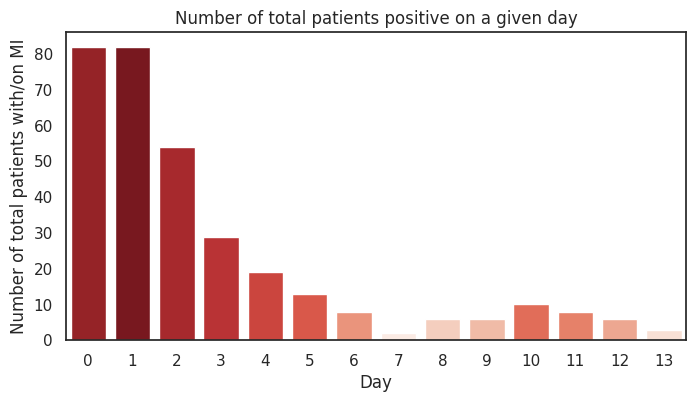

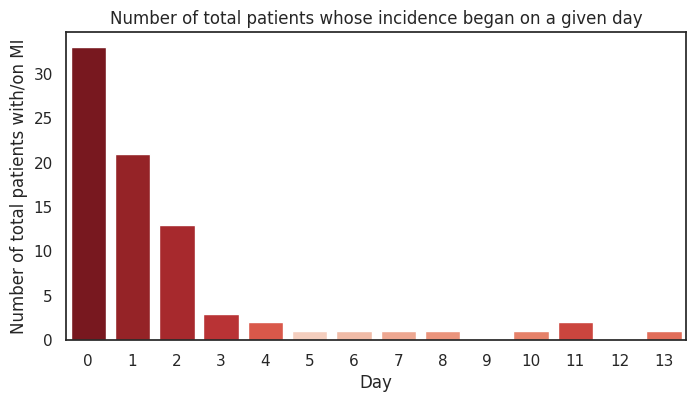

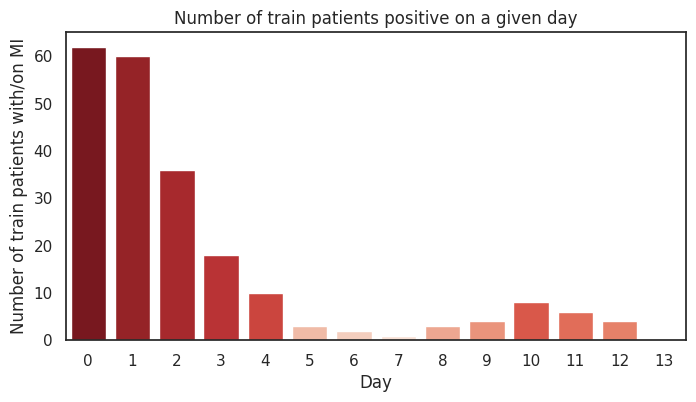

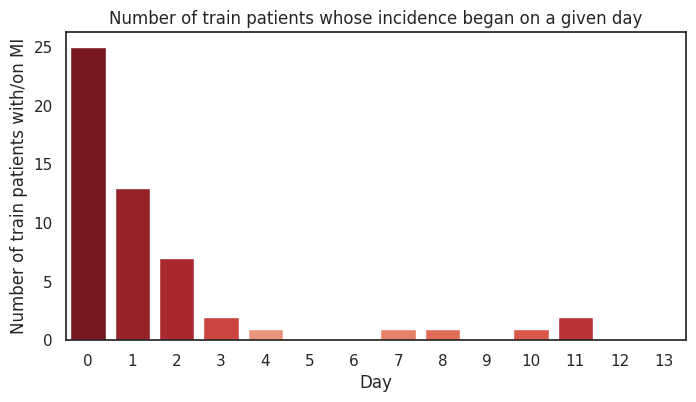

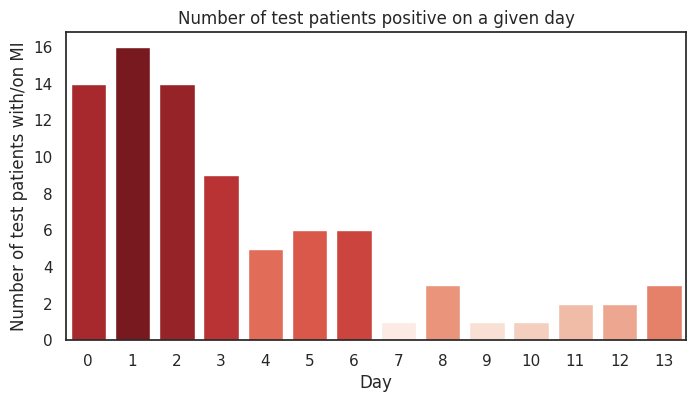

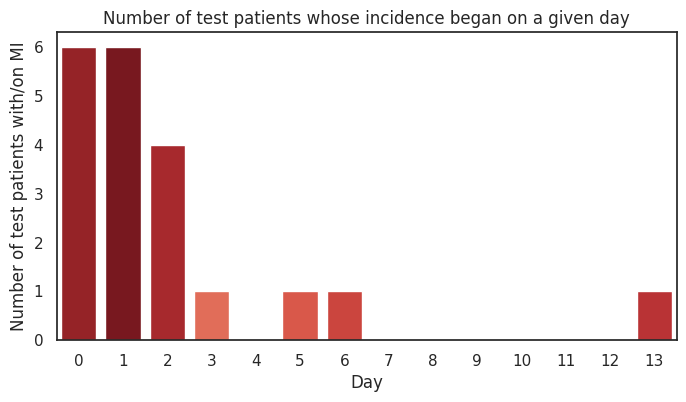

In [ ]:
############################
## SUPPLEMENTARY FIGURE 1 ##
############################

sns.set(style="white")
sns.despine(left=True, bottom=True)

## TOTAL

### When do people have incidents?

# number of people who are positive on a given day
plt.figure(figsize = (8,4))
plt.title('Number of total patients positive on a given day')
plt.ylabel('Number of total patients with/on {0}'.format(target))
plt.xlabel('Day')
y_vector_total = np.nansum(Y_TOTAL, axis=0).squeeze()
print("The total kurtosis is {0} with {1} % of events \
occuring between days 0 and 2".format(kurtosis(y_vector_total),
                                            100*int(np.sum(y_vector_total[0:2]))/np.sum(y_vector_total)))
color_rank = np.argsort(np.argsort(y_vector_total))
sns.barplot(y=y_vector_total, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Total_Patients_Positive_Supplemental_Figure_1.eps'.format(target), format='eps',
             dpi=300, bbox_inches='tight')

# first incident - number of people who had their first incident on a given day
plt.figure(figsize = (8,4))
plt.title('Number of total patients whose incidence began on a given day')
plt.ylabel('Number of total patients with/on {0}'.format(target))
plt.xlabel('Day')
POS_Y_TOTAL = Y_TOTAL[np.nansum(Y_TOTAL.squeeze(), axis=1) == 1]
(days_total, value_counts_total) = np.unique(np.nanargmax(POS_Y_TOTAL, axis=1), return_counts=True)
day_value_dict_total = dict(zip(np.arange(14), np.zeros(14)))
for i in range(len(days_total)):
    day_value_dict_total[days_total[i]] = value_counts_total[i]
y_vector_total_pos = list(day_value_dict_total.values())
color_rank = np.argsort(np.argsort(y_vector_total_pos))
sns.barplot(y=y_vector_total_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])
#plt.show()

plt.savefig(ROOT+'figures/{0}_Total_Patients_First_Positive_Supplemental_Figure_1.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## TRAIN

## When do people have incidents?

# number of people who are positive on a given day
plt.figure(figsize = (8,4))
plt.title('Number of train patients positive on a given day')
plt.ylabel('Number of train patients with/on {0}'.format(target))
plt.xlabel('Day')
y_vector_train = np.nansum(Y_TRAIN, axis=0).squeeze()
print("The train kurtosis is {0} with {1} % of events \
occuring between days 0 and 2".format(kurtosis(y_vector_train),
                                            100*int(np.sum(y_vector_train[0:2]))/np.sum(y_vector_train)))
color_rank = np.argsort(np.argsort(y_vector_train))
sns.barplot(y=y_vector_train, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Train_Patients_Positive_Supplemental_Figure_1.eps'.format(target), format='eps',
             dpi=300, bbox_inches='tight')


# first incident - number of people who had their first incident on a given day
plt.figure(figsize = (8,4))
plt.title('Number of train patients whose incidence began on a given day')
plt.ylabel('Number of train patients with/on {0}'.format(target))
plt.xlabel('Day')
POS_Y_TRAIN = Y_TRAIN[np.nansum(Y_TRAIN.squeeze(), axis=1) == 1]
(days_train_pos, value_counts_train_pos) = np.unique(np.nanargmax(POS_Y_TRAIN, axis=1), return_counts=True)
day_value_dict_train_pos = dict(zip(np.arange(14), np.zeros(14)))
for i in range(len(days_train_pos)):
    day_value_dict_train_pos[days_train_pos[i]] = value_counts_train_pos[i]
y_vector_train_pos = list(day_value_dict_train_pos.values())
color_rank = np.argsort(np.argsort(y_vector_train_pos))
sns.barplot(y=y_vector_train_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Train_Patients_First_Positive_Supplemental_Figure_1.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## TEST

# number of people who are positive on a given day
plt.figure(figsize = (8,4))
plt.title('Number of test patients positive on a given day')
plt.ylabel('Number of test patients with/on {0}'.format(target))
plt.xlabel('Day')
y_vector_test = np.nansum(Y_TEST, axis=0).squeeze()
print("The test kurtosis is {0} with {1} % of events \
occuring between days 0 and 2".format(kurtosis(y_vector_test),
                                          100*int(np.sum(y_vector_test[0:2]))/np.sum(y_vector_test)))
color_rank = np.argsort(np.argsort(y_vector_test))
sns.barplot(y=y_vector_test, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Test_Patients_Positive_Supplemental_Figure_1.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

# first incident - nmber of people who had their first incident on a given day
plt.figure(figsize = (8,4))
plt.title('Number of test patients whose incidence began on a given day')
plt.ylabel('Number of test patients with/on {0}'.format(target))
plt.xlabel('Day')
POS_Y_TEST = Y_TEST[np.nansum(Y_TEST.squeeze(), axis=1) == 1]
(days, value_counts) = np.unique(np.nanargmax(POS_Y_TEST, axis=1), return_counts=True)
day_value_dict = dict(zip(np.arange(14), np.zeros(14)))
for i in range(len(days)):
    day_value_dict[days[i]] = value_counts[i]
y_vector_test_pos = list(day_value_dict.values())
color_rank = np.argsort(np.argsort(y_vector_test_pos))
sns.barplot(y=y_vector_test_pos, x=np.arange(14), palette=np.array(color_list)[color_rank])

plt.savefig(ROOT+'figures/{0}_Test_Patients_First_Positive_Supplemental_Figure_1.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_80_percent = m_80.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_60_percent = m_60.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_40_percent = m_40.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_20_percent = m_20.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_10_percent = m_10.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_5_percent = m_5.predict(X_TEST_MASK)
del X_TEST_MASK

# AUROC values with models that have been trained with various fractions of training data

28/28 [==============================] - 5s 41ms/step


In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 WITHOUT ATTENTION ###
#############################

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_80_percent_without_attention = m_80_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_60_percent_without_attention = m_60_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_40_percent_without_attention = m_40_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_20_percent_without_attention = m_20_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_10_percent_without_attention = m_10_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_5_percent_without_attention = m_5_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

# AUROC values with models(without attention) that have been trained with various fractions of training data

28/28 [==============================] - 4s 21ms/step


In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

(fpr_100, tpr_100, thresholds_100) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test])
(fpr_80, tpr_80, thresholds_80) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_80_percent[~y_boolmat_test])
(fpr_60, tpr_60, thresholds_60) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_60_percent[~y_boolmat_test])
(fpr_40, tpr_40, thresholds_40) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_40_percent[~y_boolmat_test])
(fpr_20, tpr_20, thresholds_20) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_20_percent[~y_boolmat_test])
(fpr_10, tpr_10, thresholds_10) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_10_percent[~y_boolmat_test])
(fpr_5, tpr_5, thresholds_5) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_5_percent[~y_boolmat_test])

fpr_tprs = [(fpr_100, tpr_100), (fpr_80, tpr_80), (fpr_60, tpr_60),
            (fpr_40, tpr_40), (fpr_20, tpr_20), (fpr_10, tpr_10), (fpr_5, tpr_5)]

In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 WITHOUT ATTENTION ###
#############################

(fpr_100_without_attention, tpr_100_without_attention, thresholds_100_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0_without_attention[~y_boolmat_test])
(fpr_80_without_attention, tpr_80_without_attention, thresholds_80_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_80_percent_without_attention[~y_boolmat_test])
(fpr_60_without_attention, tpr_60_without_attention, thresholds_60_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_60_percent_without_attention[~y_boolmat_test])
(fpr_40_without_attention, tpr_40_without_attention, thresholds_40_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_40_percent_without_attention[~y_boolmat_test])
(fpr_20_without_attention, tpr_20_without_attention, thresholds_20_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_20_percent_without_attention[~y_boolmat_test])
(fpr_10_without_attention, tpr_10_without_attention, thresholds_10_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_10_percent_without_attention[~y_boolmat_test])
(fpr_5_without_attention, tpr_5_without_attention, thresholds_5_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_5_percent_without_attention[~y_boolmat_test])

fpr_tprs_without_attention = [(fpr_100_without_attention, tpr_100_without_attention), (fpr_80_without_attention, tpr_80_without_attention), (fpr_60_without_attention, tpr_60_without_attention),
            (fpr_40_without_attention, tpr_40_without_attention), (fpr_20_without_attention, tpr_20_without_attention), (fpr_10_without_attention, tpr_10_without_attention), (fpr_5_without_attention, tpr_5_without_attention)]

0.6528792876329755
0.6715293947700594
0.7013575283148007
0.6055721601793987
0.5971525267498771
0.6594502474643078
0.6663496693023879
PPV for full model is 0.02145214521452145
Sensitivity for full model is 0.31
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      7006
         1.0       0.02      0.31      0.04        83

    accuracy                           0.82      7089
   macro avg       0.51      0.57      0.47      7089
weighted avg       0.98      0.82      0.89      7089



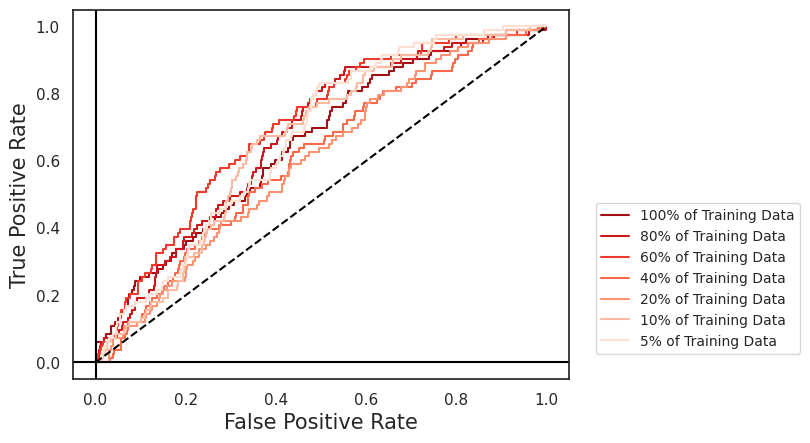

In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[::-1], fpr_tprs, [100,80,60,40,20,10,5]):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0}% of Training Data'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.48, 0.05))
plt.savefig(ROOT+'figures/{0}_less_data_roc_curves_Supplemental_Figure_2.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

# 100 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test]))
# 80 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_80_percent[~y_boolmat_test]))
# 60 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_60_percent[~y_boolmat_test]))
# 40 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_40_percent[~y_boolmat_test]))
# 20 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_20_percent[~y_boolmat_test]))
# 10 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_10_percent[~y_boolmat_test]))
# 5 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_5_percent[~y_boolmat_test]))

## 100% Training Data ##
TN, FP, FN, TP = confusion_matrix(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test])).ravel()
PPV = TP/(TP+FP)
print("PPV for full model is {0}".format(PPV))
CR = classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print("Sensitivity for full model is {0}".format(CR.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test])))

0.8146408070191127
0.7989846912629106
0.7678323915129545
0.7420352262604515
0.6891150098538602
0.7217410893932568
0.7102242828006288
PPV for full model(without attention) is 0.03018867924528302
Sensitivity for full model(without attention) is 0.58
              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87      7006
         1.0       0.03      0.58      0.06        83

    accuracy                           0.78      7089
   macro avg       0.51      0.68      0.47      7089
weighted avg       0.98      0.78      0.86      7089



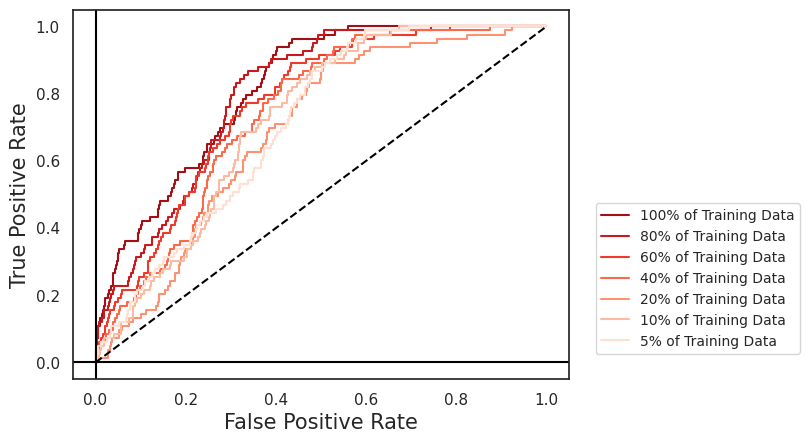

In [ ]:
#############################
## SUPPLEMENTARY FIGURE 2 WITHOUT ATTENTION ###
#############################

fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[::-1], fpr_tprs_without_attention, [100,80,60,40,20,10,5]):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0}% of Training Data'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.48, 0.05))
plt.savefig(ROOT+'figures/{0}_less_data_roc_curves_Supplemental_Figure_2_without_attention.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

# 100 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0_without_attention[~y_boolmat_test]))
# 80 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_80_percent_without_attention[~y_boolmat_test]))
# 60 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_60_percent_without_attention[~y_boolmat_test]))
# 40 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_40_percent_without_attention[~y_boolmat_test]))
# 20 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_20_percent_without_attention[~y_boolmat_test]))
# 10 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_10_percent_without_attention[~y_boolmat_test]))
# 5 % Training Data
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_5_percent_without_attention[~y_boolmat_test]))

## 100% Training Data ##
TN_without_attention, FP_without_attention, FN_without_attention, TP_without_attention = confusion_matrix(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0_without_attention[~y_boolmat_test])).ravel()
PPV_without_attention = TP_without_attention/(TP_without_attention+FP_without_attention)
print("PPV for full model(without attention) is {0}".format(PPV_without_attention))
CR_without_attention = classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0_without_attention[~y_boolmat_test]))

print("Sensitivity for full model(without attention) is {0}".format(CR_without_attention.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0_without_attention[~y_boolmat_test])))

In [ ]:
# GET ACTIVATIONS MATRIX ; OUTPUT IS (BATCH_SIZE, TIME_STEPS, FEATURES)

activations = get_activations(m, X_TEST, print_shape_only=True, layer_name='attention_vec')[0]
activations[x_boolmat_test] = np.nan

# AVERAGE THE ATTENTION MATRIX OVER FEATURES ; OUTPUT IS BATCH_SIZE, TIME_STEPS
attention_matrix = np.nanmean(activations, axis=2).squeeze()

# AVERAGE ATTENTION VECTOR ACROSS SAMPLES ; OUTPUT IS 1D TIME_STEPS
attention_vector_final = np.nanmean(attention_matrix, axis=0)

# This allows us to rank color intensity by activation. We sort the intensities, then argsort the indices ##
color_order = np.argsort(attention_vector_final, axis=0)
color_order_order = np.argsort(color_order)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(
<ipython-input-253-02a72c2243f8>:7: RuntimeWarning: Mean of empty slice
  attention_matrix = np.nanmean(activations, axis=2).squeeze()


In [ ]:
attention_vector_final

array([0.08619769, 0.08603362, 0.06271812, 0.07416009, 0.07404698,
       0.08252087, 0.05879765, 0.07382099, 0.05478711, 0.06510131,
       0.08011818, 0.06514662, 0.05895174, 0.09082812], dtype=float32)

In [ ]:
''' Due to the way features are selectd from the EMR and the fact potassium can be a
delivered medication or a lab value, special care was taken to ensure proper representation on heatmaps '''

if 'digoxin(?!.*fab)' in features:
    indexy = features.index('digoxin(?!.*fab)')
    features[indexy] = 'digoxin'

if 'potassium_y' in features:
    indexy = features.index('potassium_y')
    features[indexy] = 'potassium_med'

if 'potassium_x' in features:
    indexy = features.index('potassium_x')
    features[indexy] = 'potassium'

if 'cipfloxacin' in features:
    indexy = features.index('cipfloxacin')
    features[indexy] = 'ciprofloxacin'

features = [feature.lower() for feature in features]

In [ ]:
## FEATURES BY CATEGORY ##

cbc_diff_features = ['RBCs', 'WBCs', 'platelets', 'hemoglobin', 'hemocrit',
                              'atypical lymphocytes', 'bands', 'basophils', 'eosinophils', 'neutrophils',
                              'lymphocytes', 'monocytes', 'polymorphonuclear leukocytes']

vital_features = ['temperature (F)', 'heart rate', 'respiratory rate', 'systolic', 'diastolic',
                  'pulse oximetry']

lab_features = ['troponin', 'HDL', 'LDL', 'BUN', 'INR', 'PTT', 'PT', 'triglycerides', 'creatinine',
                  'glucose', 'sodium', 'potassium', 'chloride', 'bicarbonate',
                  'blood culture', 'urine culture', 'surface culture', 'sputum' +
                  ' culture', 'wound culture', 'Inspired O2 Fraction', 'central venous pressure',
                  'PEEP Set', 'tidal volume', 'anion gap']

demographic_features = ['age', 'm', 'black', 'daily weight', 'tobacco', 'diabetes', 'history of CV events']

med_features = ['epoetin', 'warfarin', 'heparin', 'enoxaparin', 'fondaparinux',
                                      'asprin', 'ketorolac', 'acetominophen',
                                      'insulin', 'glucagon',
                                      'potassium_med', 'calcium gluconate',
                                      'fentanyl', 'magensium sulfate',
                                      'D5W', 'dextrose',
                                      'ranitidine', 'ondansetron', 'pantoprazole', 'metoclopramide',
                                      'lisinopril', 'captopril', 'statin',
                                      'hydralazine', 'diltiazem',
                                      'carvedilol', 'metoprolol', 'labetalol', 'atenolol',
                                      'amiodarone', 'digoxin',
                                      'clopidogrel', 'nitroprusside', 'nitroglycerin',
                                      'vasopressin', 'hydrochlorothiazide', 'furosemide',
                                      'atropine', 'neostigmine',
                                      'levothyroxine',
                                      'oxycodone', 'hydromorphone', 'fentanyl citrate',
                                      'tacrolimus', 'prednisone',
                                      'phenylephrine', 'norepinephrine',
                                      'haloperidol', 'phenytoin', 'trazodone', 'levetiracetam',
                                      'diazepam', 'clonazepam',
                                      'propofol', 'zolpidem', 'midazolam',
                                      'albuterol', 'ipratropium',
                                      'diphenhydramine',
                                      '0.9% Sodium Chloride',
                                      'phytonadione',
                                      'metronidazole',
                                      'cefazolin', 'cefepime', 'vancomycin', 'levofloxacin',
                                      'ciprofloxacin', 'fluconazole',
                                      'meropenem', 'ceftriaxone', 'piperacillin',
                                      'ampicillin-sulbactam', 'nafcillin', 'oxacillin',
                                      'amoxicillin', 'penicillin', 'SMX-TMP']

cbc_diff_features = [[i.lower(), i.lower()+'_min', i.lower()+'_max', i.lower()+'_std'] for i in cbc_diff_features]
vital_features = [[i.lower(), i.lower()+'_min', i.lower()+'_max', i.lower()+'_std'] for i in vital_features]
lab_features = [[i.lower(), i.lower()+'_min', i.lower()+'_max', i.lower()+'_std'] for i in lab_features]
demographic_features = [i.lower() for i in demographic_features]
med_features = [i.lower() for i in med_features]

cbc_diff_feature_array = np.array(cbc_diff_features).flatten()
vital_features_array = np.array(vital_features).flatten()
lab_features_array = np.array(lab_features).flatten()
demographic_feature_array = np.array(demographic_features).flatten()
med_features_array = np.array(med_features).flatten()

features_built = np.hstack([cbc_diff_feature_array,vital_features_array,
                            lab_features_array,demographic_feature_array,med_features_array])

features_built_reduced = [i for i in features_built if i in features]

In [ ]:
## Identifies the index in the features list in the desired order ##
arranged_indices = [features.index(i) for i in features_built_reduced]

In [ ]:
## This is a sanity check to ensure that features_built_reduced has the same number of elements as our target ##

print(len(features_SEPSIS))
print(len(features_MI))
print(len(features_VANCOMYCIN))
print('\n')
print(len(features_built))
print(len(features_built_reduced))

224
220
223


256
220


####   Evaluation

Display Evaluation Results for MI

In [ ]:
##############
## FIGURE 1 ##
##############

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 1
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_1 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 2
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_2 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 3
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_3 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 4
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_4 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 5
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_5 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 6
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_6 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 7
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_7 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 8
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_8 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 9
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_9 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 10
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_10 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 11
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_11 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 12
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_12 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 13
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_13 = m.predict(X_TEST_MASK)
del X_TEST_MASK

28/28 [==============================] - 1s 23ms/step


In [ ]:
##############
## FIGURE 1 without attention ##
##############

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[x_boolmat_test] = 0
Y_PRED_mask_0_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 1
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_1_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 2
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_2_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 3
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_3_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 4
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_4_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 5
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_5_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 6
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_6_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 7
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_7_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 8
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_8_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 9
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_9_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 10
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_10_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 11
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_11_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 12
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_12_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 13
X_TEST_MASK[x_boolmat_test] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_13_without_attention = m_without_attention.predict(X_TEST_MASK)
del X_TEST_MASK

28/28 [==============================] - 1s 20ms/step


In [ ]:
##############
## FIGURE 1 ##
##############

(fpr_mask_0, tpr_mask_0, thresholds_mask_0) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test])
(fpr_mask_1, tpr_mask_1, thresholds_mask_1) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_1[~y_boolmat_test])
(fpr_mask_2, tpr_mask_2, thresholds_mask_2) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_2[~y_boolmat_test])
(fpr_mask_3, tpr_mask_3, thresholds_mask_3) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_3[~y_boolmat_test])
(fpr_mask_4, tpr_mask_4, thresholds_mask_4) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_4[~y_boolmat_test])
(fpr_mask_5, tpr_mask_5, thresholds_mask_5) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_5[~y_boolmat_test])
(fpr_mask_6, tpr_mask_6, thresholds_mask_6) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_6[~y_boolmat_test])
(fpr_mask_7, tpr_mask_7, thresholds_mask_7) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_7[~y_boolmat_test])
(fpr_mask_8, tpr_mask_8, thresholds_mask_8) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_8[~y_boolmat_test])
(fpr_mask_9, tpr_mask_9, thresholds_mask_9) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_9[~y_boolmat_test])
(fpr_mask_10, tpr_mask_10, thresholds_mask_10) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_10[~y_boolmat_test])
(fpr_mask_11, tpr_mask_11, thresholds_mask_11) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_11[~y_boolmat_test])
(fpr_mask_12, tpr_mask_12, thresholds_mask_12) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_12[~y_boolmat_test])
(fpr_mask_13, tpr_mask_13, thresholds_mask_13) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_13[~y_boolmat_test])

fpr_tprs = [(fpr_mask_1, tpr_mask_1), (fpr_mask_2, tpr_mask_2), (fpr_mask_3, tpr_mask_3), (fpr_mask_4, tpr_mask_4),
            (fpr_mask_5, tpr_mask_5), (fpr_mask_6, tpr_mask_6), (fpr_mask_7, tpr_mask_7), (fpr_mask_8, tpr_mask_8),
            (fpr_mask_9, tpr_mask_9), (fpr_mask_10, tpr_mask_10), (fpr_mask_11, tpr_mask_11), (fpr_mask_12, tpr_mask_12),
            (fpr_mask_13, tpr_mask_13), (fpr_mask_0, tpr_mask_0)]

print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_13[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_12[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_11[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_10[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_9[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_8[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_7[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_6[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_5[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_4[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_3[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_2[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_1[~y_boolmat_test]))

0.6528792876329755
0.651232678358309
0.6599695957681712
0.6628466477958652
0.6610478453924176
0.6562430137334953
0.6531836738905379
0.6457580249631125
0.6443169194047098
0.6345946159746035
0.6086959886362464
0.539337194624917
0.5495306948605154
0.4844393273923556


In [ ]:
##############
## FIGURE 1 without attention ##
##############

(fpr_mask_0_without_attention, tpr_mask_0_without_attention, thresholds_mask_0_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0_without_attention[~y_boolmat_test])
(fpr_mask_1_without_attention, tpr_mask_1_without_attention, thresholds_mask_1_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_1_without_attention[~y_boolmat_test])
(fpr_mask_2_without_attention, tpr_mask_2_without_attention, thresholds_mask_2_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_2_without_attention[~y_boolmat_test])
(fpr_mask_3_without_attention, tpr_mask_3_without_attention, thresholds_mask_3_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_3_without_attention[~y_boolmat_test])
(fpr_mask_4_without_attention, tpr_mask_4_without_attention, thresholds_mask_4_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_4_without_attention[~y_boolmat_test])
(fpr_mask_5_without_attention, tpr_mask_5_without_attention, thresholds_mask_5_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_5_without_attention[~y_boolmat_test])
(fpr_mask_6_without_attention, tpr_mask_6_without_attention, thresholds_mask_6_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_6_without_attention[~y_boolmat_test])
(fpr_mask_7_without_attention, tpr_mask_7_without_attention, thresholds_mask_7_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_7_without_attention[~y_boolmat_test])
(fpr_mask_8_without_attention, tpr_mask_8_without_attention, thresholds_mask_8_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_8_without_attention[~y_boolmat_test])
(fpr_mask_9_without_attention, tpr_mask_9_without_attention, thresholds_mask_9_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_9_without_attention[~y_boolmat_test])
(fpr_mask_10_without_attention, tpr_mask_10_without_attention, thresholds_mask_10_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_10_without_attention[~y_boolmat_test])
(fpr_mask_11_without_attention, tpr_mask_11_without_attention, thresholds_mask_11_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_11_without_attention[~y_boolmat_test])
(fpr_mask_12_without_attention, tpr_mask_12_without_attention, thresholds_mask_12_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_12_without_attention[~y_boolmat_test])
(fpr_mask_13_without_attention, tpr_mask_13_without_attention, thresholds_mask_13_without_attention) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_13_without_attention[~y_boolmat_test])

fpr_tprs_without_attention = [(fpr_mask_1_without_attention, tpr_mask_1_without_attention), (fpr_mask_2_without_attention, tpr_mask_2_without_attention), (fpr_mask_3_without_attention, tpr_mask_3_without_attention), (fpr_mask_4_without_attention, tpr_mask_4_without_attention),
            (fpr_mask_5_without_attention, tpr_mask_5_without_attention), (fpr_mask_6_without_attention, tpr_mask_6_without_attention), (fpr_mask_7_without_attention, tpr_mask_7_without_attention), (fpr_mask_8_without_attention, tpr_mask_8_without_attention),
            (fpr_mask_9_without_attention, tpr_mask_9_without_attention), (fpr_mask_10_without_attention, tpr_mask_10_without_attention), (fpr_mask_11_without_attention, tpr_mask_11_without_attention), (fpr_mask_12_without_attention, tpr_mask_12_without_attention),
            (fpr_mask_13_without_attention, tpr_mask_13_without_attention), (fpr_mask_0_without_attention, tpr_mask_0_without_attention)]

print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_0_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_13_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_12_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_11_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_10_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_9_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_8_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_7_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_6_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_5_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_4_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_3_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_2_without_attention[~y_boolmat_test]))
print(roc_auc_score(Y_TEST[~y_boolmat_test], Y_PRED_mask_1_without_attention[~y_boolmat_test]))

0.8146408070191127
0.8084541993265668
0.8094318467131444
0.8104120736442774
0.8128385652229242
0.8149778675077128
0.7740061014827222
0.7729003367165493
0.7696552696655878
0.7630524954514031
0.7464109936749568
0.6460460741051559
0.596597064822235
0.5197928453752206


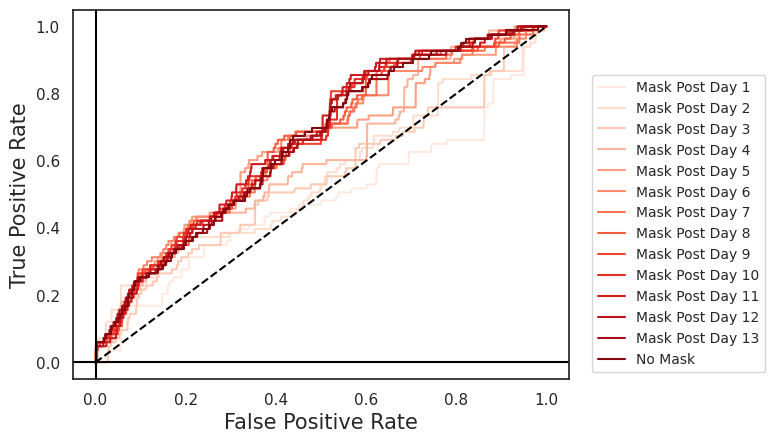

In [ ]:
##############
## FIGURE 1 ##
##############

fig, ax = plt.subplots()
ax.set_facecolor('white')

counter = 1

for color, fpr_tpr_tuple in zip(color_list, fpr_tprs):
    if counter != 14:
        plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='Mask Post Day {0}'.format(counter), color=color)
        counter = counter+1
    elif counter == 14:
        plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='No Mask', color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.41, 0))
plt.savefig(ROOT+'figures/{0}_roc_curves_Fig_1.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

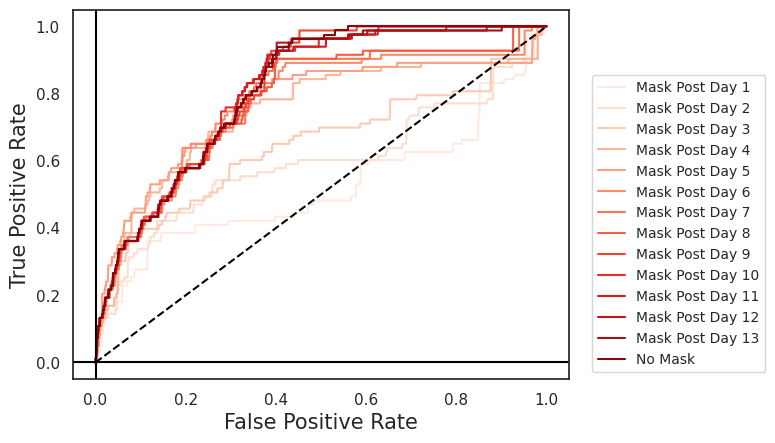

In [ ]:
##############
## FIGURE 1 without attention ##
##############

fig, ax = plt.subplots()
ax.set_facecolor('white')

counter = 1

for color, fpr_tpr_tuple_without_attention in zip(color_list, fpr_tprs_without_attention):
    if counter != 14:
        plt.plot(fpr_tpr_tuple_without_attention[0], fpr_tpr_tuple_without_attention[1], label='Mask Post Day {0}'.format(counter), color=color)
        counter = counter+1
    elif counter == 14:
        plt.plot(fpr_tpr_tuple_without_attention[0], fpr_tpr_tuple_without_attention[1], label='No Mask', color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.41, 0))
plt.savefig(ROOT+'figures/{0}_roc_curves_Fig_1_without_attention.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

In [ ]:
##############################
## FIGURE 2 LAG EXPERIMENTS ##
##############################

### 1 DAY LAGGED EXPERIMENTS ###

### Y_PRED_mask_0_LAG_1 ###

Y_PRED_mask_0_LAG_1 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(1,13)], axis=0)
Y_PRED_mask_0_LAG_2 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(2,13)], axis=0)
Y_PRED_mask_0_LAG_3 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(3,13)], axis=0)
Y_PRED_mask_0_LAG_4 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(4,13)], axis=0)
Y_PRED_mask_0_LAG_5 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(5,13)], axis=0)
Y_PRED_mask_0_LAG_6 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(6,13)], axis=0)
Y_PRED_mask_0_LAG_7 = np.concatenate([Y_PRED_mask_0[:,i][~y_boolmat_test[:,i,:]] for i in range(7,13)], axis=0)

# below is an equivalent representation

# Y_PRED_mask_0_LAG_1 = np.concatenate([Y_PRED_mask_0[:,1][~y_boolmat_test[:,1,::]],
#                                     Y_PRED_mask_0[:,2][~y_boolmat_test[:,2,::]],
#                                     Y_PRED_mask_0[:,3][~y_boolmat_test[:,3,::]],
#                                     Y_PRED_mask_0[:,4][~y_boolmat_test[:,4,::]],
#                                     Y_PRED_mask_0[:,5][~y_boolmat_test[:,5,::]],
#                                     Y_PRED_mask_0[:,6][~y_boolmat_test[:,6,::]],
#                                     Y_PRED_mask_0[:,7][~y_boolmat_test[:,7,::]],
#                                     Y_PRED_mask_0[:,8][~y_boolmat_test[:,8,::]],
#                                     Y_PRED_mask_0[:,9][~y_boolmat_test[:,9,::]],
#                                     Y_PRED_mask_0[:,10][~y_boolmat_test[:,10,::]],
#                                     Y_PRED_mask_0[:,11][~y_boolmat_test[:,11,::]],
#                                     Y_PRED_mask_0[:,12][~y_boolmat_test[:,12,::]],
#                                     Y_PRED_mask_0[:,13][~y_boolmat_test[:,13,::]]], axis=0)

### all the first day soft every person, all the second days, third days, in a 1D vector

Y_TEST_LAG_1 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(1,14)], axis=0)
Y_TEST_LAG_2 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(2,14)], axis=0)
Y_TEST_LAG_3 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(3,14)], axis=0)
Y_TEST_LAG_4 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(4,14)], axis=0)
Y_TEST_LAG_5 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(5,14)], axis=0)
Y_TEST_LAG_6 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(6,14)], axis=0)
Y_TEST_LAG_7 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(7,14)], axis=0)

#############
## Y_PREDS ##
#############

Y_PRED_LAG_1 = np.concatenate([Y_PRED_mask_1[:,1,::][~y_boolmat_test[:,1,::]],
                             Y_PRED_mask_2[:,2,::][~y_boolmat_test[:,2,::]],
                             Y_PRED_mask_3[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_4[:,4,::][~y_boolmat_test[:,4,:]],
                             Y_PRED_mask_5[:,5,::][~y_boolmat_test[:,5,::]],
                             Y_PRED_mask_6[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_7[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_8[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_9[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_10[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_11[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_12[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_13[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_2 = np.concatenate([Y_PRED_mask_1[:,2,::][~y_boolmat_test[:,2,::]],
                             Y_PRED_mask_2[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_3[:,4,::][~y_boolmat_test[:,4,::]],
                             Y_PRED_mask_4[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_5[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_6[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_7[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_8[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_9[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_10[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_11[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_12[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_3 = np.concatenate([Y_PRED_mask_1[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_2[:,4,::][~y_boolmat_test[:,4,::]],
                             Y_PRED_mask_3[:,5,::][~y_boolmat_test[:,5,::]],
                             Y_PRED_mask_4[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_5[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_6[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_7[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_8[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_9[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_10[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_11[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_4 = np.concatenate([Y_PRED_mask_1[:,4,::][~y_boolmat_test[:,4,:]],
                             Y_PRED_mask_2[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_3[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_4[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_5[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_6[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_7[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_8[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_10[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_5 = np.concatenate([Y_PRED_mask_1[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_2[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_3[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_4[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_6[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_7[:,11,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_8[:,12,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9[:,13,::][~y_boolmat_test[:,12,::]]], axis=0)

Y_PRED_LAG_5 = np.concatenate([Y_PRED_mask_1[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_2[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_3[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_4[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_6[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_7[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_8[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_9[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_6 = np.concatenate([Y_PRED_mask_1[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_2[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_3[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_4[:,9,::][~y_boolmat_test[:,9,:]],
                             Y_PRED_mask_5[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_6[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_7[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_8[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_7 = np.concatenate([Y_PRED_mask_1[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_2[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_3[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_4[:,10,::][~y_boolmat_test[:,10,:]],
                             Y_PRED_mask_5[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_6[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_7[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

## LAG ROC ##

# Day 1 Lag
print(roc_auc_score(Y_TEST_LAG_1, Y_PRED_LAG_1))
# Day 2 Lag
print(roc_auc_score(Y_TEST_LAG_2, Y_PRED_LAG_2))
# # Day 3 Lag
print(roc_auc_score(Y_TEST_LAG_3, Y_PRED_LAG_3))
# Day 4 Lag
print(roc_auc_score(Y_TEST_LAG_4, Y_PRED_LAG_4))
# Day 5 Lag
print(roc_auc_score(Y_TEST_LAG_5, Y_PRED_LAG_5))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_6, Y_PRED_LAG_6))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_7, Y_PRED_LAG_7))

confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1))

## 100% Training Data with 1 day lag ##
TN, FP, FN, TP = confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1)).ravel()
PPV = TP/(TP+FP)
print("PPV for full model w/ 1 day lag is {0}".format(PPV))
CR = classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1))

print("Sensitivity for full model w/ 1 day lag is {0}".format(CR.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1)))

0.6470789332842932
0.6243535328316153
0.5883976640204398
0.5586133897856577
0.578026734563972
0.4919083284014612
0.4630887346818249
PPV for full model w/ 1 day lag is 0.020674646354733407
Sensitivity for full model w/ 1 day lag is 0.28
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92      6147
         1.0       0.02      0.28      0.04        69

    accuracy                           0.85      6216
   macro avg       0.51      0.56      0.48      6216
weighted avg       0.98      0.85      0.91      6216



In [ ]:
##############################
## FIGURE 2 LAG EXPERIMENTS WITHOUT ATTENTION ##
##############################

### 1 DAY LAGGED EXPERIMENTS ###

### Y_PRED_mask_0_LAG_1 ###

Y_PRED_mask_0_LAG_1_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(1,13)], axis=0)
Y_PRED_mask_0_LAG_2_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(2,13)], axis=0)
Y_PRED_mask_0_LAG_3_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(3,13)], axis=0)
Y_PRED_mask_0_LAG_4_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(4,13)], axis=0)
Y_PRED_mask_0_LAG_5_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(5,13)], axis=0)
Y_PRED_mask_0_LAG_6_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(6,13)], axis=0)
Y_PRED_mask_0_LAG_7_without_atttention = np.concatenate([Y_PRED_mask_0_without_attention[:,i][~y_boolmat_test[:,i,:]] for i in range(7,13)], axis=0)

# below is an equivalent representation

# Y_PRED_mask_0_LAG_1 = np.concatenate([Y_PRED_mask_0[:,1][~y_boolmat_test[:,1,::]],
#                                     Y_PRED_mask_0[:,2][~y_boolmat_test[:,2,::]],
#                                     Y_PRED_mask_0[:,3][~y_boolmat_test[:,3,::]],
#                                     Y_PRED_mask_0[:,4][~y_boolmat_test[:,4,::]],
#                                     Y_PRED_mask_0[:,5][~y_boolmat_test[:,5,::]],
#                                     Y_PRED_mask_0[:,6][~y_boolmat_test[:,6,::]],
#                                     Y_PRED_mask_0[:,7][~y_boolmat_test[:,7,::]],
#                                     Y_PRED_mask_0[:,8][~y_boolmat_test[:,8,::]],
#                                     Y_PRED_mask_0[:,9][~y_boolmat_test[:,9,::]],
#                                     Y_PRED_mask_0[:,10][~y_boolmat_test[:,10,::]],
#                                     Y_PRED_mask_0[:,11][~y_boolmat_test[:,11,::]],
#                                     Y_PRED_mask_0[:,12][~y_boolmat_test[:,12,::]],
#                                     Y_PRED_mask_0[:,13][~y_boolmat_test[:,13,::]]], axis=0)

### all the first day soft every person, all the second days, third days, in a 1D vector

Y_TEST_LAG_1 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(1,14)], axis=0)
Y_TEST_LAG_2 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(2,14)], axis=0)
Y_TEST_LAG_3 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(3,14)], axis=0)
Y_TEST_LAG_4 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(4,14)], axis=0)
Y_TEST_LAG_5 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(5,14)], axis=0)
Y_TEST_LAG_6 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(6,14)], axis=0)
Y_TEST_LAG_7 = np.concatenate([Y_TEST[:,i][~y_boolmat_test[:,i,::]] for i in range(7,14)], axis=0)

#############
## Y_PREDS ##
#############

Y_PRED_LAG_1_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,1,::][~y_boolmat_test[:,1,::]],
                             Y_PRED_mask_2_without_attention[:,2,::][~y_boolmat_test[:,2,::]],
                             Y_PRED_mask_3_without_attention[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_4_without_attention[:,4,::][~y_boolmat_test[:,4,:]],
                             Y_PRED_mask_5_without_attention[:,5,::][~y_boolmat_test[:,5,::]],
                             Y_PRED_mask_6_without_attention[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_7_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_8_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_9_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_10_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_11_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_12_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_13_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_2_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,2,::][~y_boolmat_test[:,2,::]],
                             Y_PRED_mask_2_without_attention[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_3_without_attention[:,4,::][~y_boolmat_test[:,4,::]],
                             Y_PRED_mask_4_without_attention[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_5_without_attention[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_6_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_7_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_8_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_9_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_10_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_11_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_12_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_3_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,3,::][~y_boolmat_test[:,3,::]],
                             Y_PRED_mask_2_without_attention[:,4,::][~y_boolmat_test[:,4,::]],
                             Y_PRED_mask_3_without_attention[:,5,::][~y_boolmat_test[:,5,::]],
                             Y_PRED_mask_4_without_attention[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_5_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_6_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_7_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_8_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_9_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_10_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_11_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_4_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,4,::][~y_boolmat_test[:,4,:]],
                             Y_PRED_mask_2_without_attention[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_3_without_attention[:,6,::][~y_boolmat_test[:,6,::]],
                             Y_PRED_mask_4_without_attention[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_5_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_6_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_7_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_8_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_10_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_5_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_2_without_attention[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_3_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_4_without_attention[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_6_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_7_without_attention[:,11,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_8_without_attention[:,12,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_9_without_attention[:,13,::][~y_boolmat_test[:,12,::]]], axis=0)

Y_PRED_LAG_5_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,5,::][~y_boolmat_test[:,5,:]],
                             Y_PRED_mask_2_without_attention[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_3_without_attention[:,7,::][~y_boolmat_test[:,7,::]],
                             Y_PRED_mask_4_without_attention[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_5_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_6_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_7_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_8_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_9_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_6_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,6,::][~y_boolmat_test[:,6,:]],
                             Y_PRED_mask_2_without_attention[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_3_without_attention[:,8,::][~y_boolmat_test[:,8,::]],
                             Y_PRED_mask_4_without_attention[:,9,::][~y_boolmat_test[:,9,:]],
                             Y_PRED_mask_5_without_attention[:,10,::][~y_boolmat_test[:,10,::]],
                             Y_PRED_mask_6_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_7_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_8_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

Y_PRED_LAG_7_without_attention = np.concatenate([Y_PRED_mask_1_without_attention[:,7,::][~y_boolmat_test[:,7,:]],
                             Y_PRED_mask_2_without_attention[:,8,::][~y_boolmat_test[:,8,:]],
                             Y_PRED_mask_3_without_attention[:,9,::][~y_boolmat_test[:,9,::]],
                             Y_PRED_mask_4_without_attention[:,10,::][~y_boolmat_test[:,10,:]],
                             Y_PRED_mask_5_without_attention[:,11,::][~y_boolmat_test[:,11,::]],
                             Y_PRED_mask_6_without_attention[:,12,::][~y_boolmat_test[:,12,::]],
                             Y_PRED_mask_7_without_attention[:,13,::][~y_boolmat_test[:,13,::]]], axis=0)

## LAG ROC ##

# Day 1 Lag
print(roc_auc_score(Y_TEST_LAG_1, Y_PRED_LAG_1_without_attention))
# Day 2 Lag
print(roc_auc_score(Y_TEST_LAG_2, Y_PRED_LAG_2_without_attention))
# # Day 3 Lag
print(roc_auc_score(Y_TEST_LAG_3, Y_PRED_LAG_3_without_attention))
# Day 4 Lag
print(roc_auc_score(Y_TEST_LAG_4, Y_PRED_LAG_4_without_attention))
# Day 5 Lag
print(roc_auc_score(Y_TEST_LAG_5, Y_PRED_LAG_5_without_attention))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_6, Y_PRED_LAG_6_without_attention))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_7, Y_PRED_LAG_7_without_attention))

confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1_without_attention))

## 100% Training Data with 1 day lag ##
TN_without_attention, FP_without_attention, FN_without_attention, TP_without_attention = confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1_without_attention)).ravel()
PPV_without_attention = TP_without_attention/(TP_without_attention+FP_without_attention)
print("PPV for full model(without attention)  w/ 1 day lag is {0}".format(PPV_without_attention))
CR_without_attention = classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1_without_attention))

print("Sensitivity for full model(without attention) w/ 1 day lag is {0}".format(CR_without_attention.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~y_boolmat_test], np.around(Y_PRED_mask_0[~y_boolmat_test]))

print(classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1_without_attention)))

0.7254958822849841
0.6611121018653922
0.5732274842595126
0.5054158948575461
0.5097899427116487
0.40913450745903135
0.36427727742507016
PPV for full model(without attention)  w/ 1 day lag is 0.02524271844660194
Sensitivity for full model(without attention) w/ 1 day lag is 0.57
              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86      6147
         1.0       0.03      0.57      0.05        69

    accuracy                           0.75      6216
   macro avg       0.51      0.66      0.45      6216
weighted avg       0.98      0.75      0.85      6216



In [ ]:
(fpr_mask_1, tpr_mask_1, thresholds_mask_1) = roc_curve(Y_TEST_LAG_1, Y_PRED_LAG_1)
(fpr_mask_2, tpr_mask_2, thresholds_mask_2) = roc_curve(Y_TEST_LAG_2, Y_PRED_LAG_2)
(fpr_mask_3, tpr_mask_3, thresholds_mask_3) = roc_curve(Y_TEST_LAG_3, Y_PRED_LAG_3)
(fpr_mask_4, tpr_mask_4, thresholds_mask_4) = roc_curve(Y_TEST_LAG_4, Y_PRED_LAG_4)
(fpr_mask_5, tpr_mask_5, thresholds_mask_5) = roc_curve(Y_TEST_LAG_5, Y_PRED_LAG_5)
(fpr_mask_6, tpr_mask_6, thresholds_mask_6) = roc_curve(Y_TEST_LAG_6, Y_PRED_LAG_6)
(fpr_mask_7, tpr_mask_7, thresholds_mask_7) = roc_curve(Y_TEST_LAG_7, Y_PRED_LAG_7)

fpr_tprs = [(fpr_mask_1, tpr_mask_1), (fpr_mask_2, tpr_mask_2), (fpr_mask_3, tpr_mask_3), (fpr_mask_4, tpr_mask_4),
            (fpr_mask_5, tpr_mask_5), (fpr_mask_6, tpr_mask_6), (fpr_mask_7, tpr_mask_7), (fpr_mask_8, tpr_mask_8),
            (fpr_mask_9, tpr_mask_9), (fpr_mask_10, tpr_mask_10), (fpr_mask_11, tpr_mask_11), (fpr_mask_12, tpr_mask_12),
            (fpr_mask_13, tpr_mask_13), (fpr_mask_0, tpr_mask_0)]

In [ ]:
(fpr_mask_1_without_attention, tpr_mask_1_without_attention, thresholds_mask_1_without_attention) = roc_curve(Y_TEST_LAG_1, Y_PRED_LAG_1_without_attention)
(fpr_mask_2_without_attention, tpr_mask_2_without_attention, thresholds_mask_2_without_attention) = roc_curve(Y_TEST_LAG_2, Y_PRED_LAG_2_without_attention)
(fpr_mask_3_without_attention, tpr_mask_3_without_attention, thresholds_mask_3_without_attention) = roc_curve(Y_TEST_LAG_3, Y_PRED_LAG_3_without_attention)
(fpr_mask_4_without_attention, tpr_mask_4_without_attention, thresholds_mask_4_without_attention) = roc_curve(Y_TEST_LAG_4, Y_PRED_LAG_4_without_attention)
(fpr_mask_5_without_attention, tpr_mask_5_without_attention, thresholds_mask_5_without_attention) = roc_curve(Y_TEST_LAG_5, Y_PRED_LAG_5_without_attention)
(fpr_mask_6_without_attention, tpr_mask_6_without_attention, thresholds_mask_6_without_attention) = roc_curve(Y_TEST_LAG_6, Y_PRED_LAG_6_without_attention)
(fpr_mask_7_without_attention, tpr_mask_7_without_attention, thresholds_mask_7_without_attention) = roc_curve(Y_TEST_LAG_7, Y_PRED_LAG_7_without_attention)

fpr_tprs_without_attention = [(fpr_mask_1_without_attention, tpr_mask_1_without_attention), (fpr_mask_2_without_attention, tpr_mask_2_without_attention), (fpr_mask_3_without_attention, tpr_mask_3_without_attention), (fpr_mask_4_without_attention, tpr_mask_4_without_attention),
            (fpr_mask_5_without_attention, tpr_mask_5_without_attention), (fpr_mask_6_without_attention, tpr_mask_6_without_attention), (fpr_mask_7_without_attention, tpr_mask_7_without_attention), (fpr_mask_8_without_attention, tpr_mask_8_without_attention),
            (fpr_mask_9_without_attention, tpr_mask_9_without_attention), (fpr_mask_10_without_attention, tpr_mask_10_without_attention), (fpr_mask_11_without_attention, tpr_mask_11_without_attention), (fpr_mask_12_without_attention, tpr_mask_12_without_attention),
            (fpr_mask_13_without_attention, tpr_mask_13_without_attention), (fpr_mask_0_without_attention, tpr_mask_0_without_attention)]

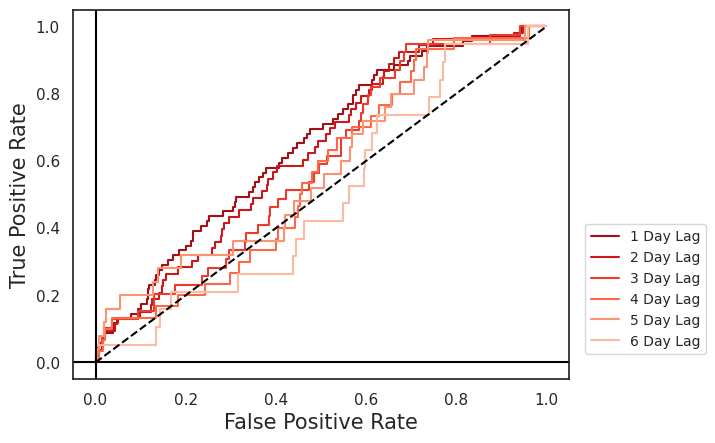

In [ ]:
fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[-1:0:-1], fpr_tprs, range(1,8)):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0} Day Lag'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.29, 0.05))
plt.savefig(ROOT+'figures/{0}_lagged_roc_curves_Fig_2.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

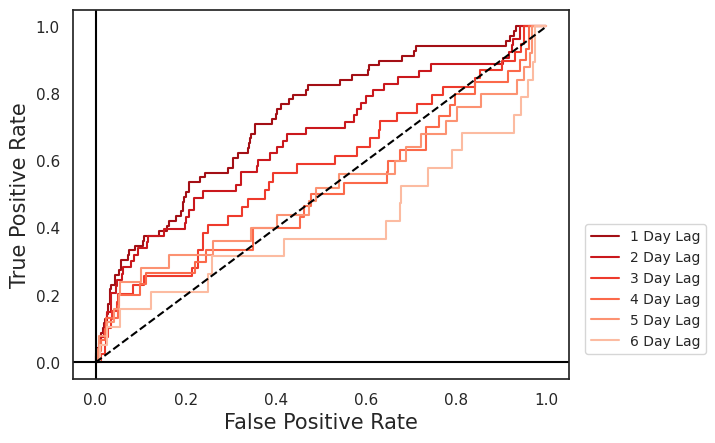

In [ ]:
fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[-1:0:-1], fpr_tprs_without_attention, range(1,8)):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0} Day Lag'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.29, 0.05))
plt.savefig(ROOT+'figures/{0}_lagged_roc_curves_Fig_2.eps'.format(target), format='eps',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

<ipython-input-271-8d81daee8518>:11: RuntimeWarning: Mean of empty slice
  heatmap(np.nanmean(activations,axis=0).T[arranged_indices],
<ipython-input-271-8d81daee8518>:27: RuntimeWarning: Mean of empty slice
  y_vector = np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1)
<ipython-input-271-8d81daee8518>:30: RuntimeWarning: Mean of empty slice
  plot = sns.barplot(x=list(range(14)), y=np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1),
<ipython-input-271-8d81daee8518>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=list(range(14)), y=np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1),
<ipython-input-271-8d81daee8518>:30: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  plot = sns.barplot(x=list(range(14)), y=

There is a -0.0019034923665392283 % change between day 0 and 1


<ipython-input-271-8d81daee8518>:43: RuntimeWarning: Mean of empty slice
  y_vector = np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0)
<ipython-input-271-8d81daee8518>:45: RuntimeWarning: Mean of empty slice
  plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
<ipython-input-271-8d81daee8518>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
<ipython-input-271-8d81daee8518>:45: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
<ipython-input-271-8d81daee8518>:

['acetominophen' 'hemocrit_max' 'platelets_std' 'temperature (f)_std'
 'glucagon' 'anion gap_min' 'fondaparinux' 'diastolic_max' 'tobacco'
 'tacrolimus' 'ipratropium' 'clopidogrel' 'bands_max' 'asprin']


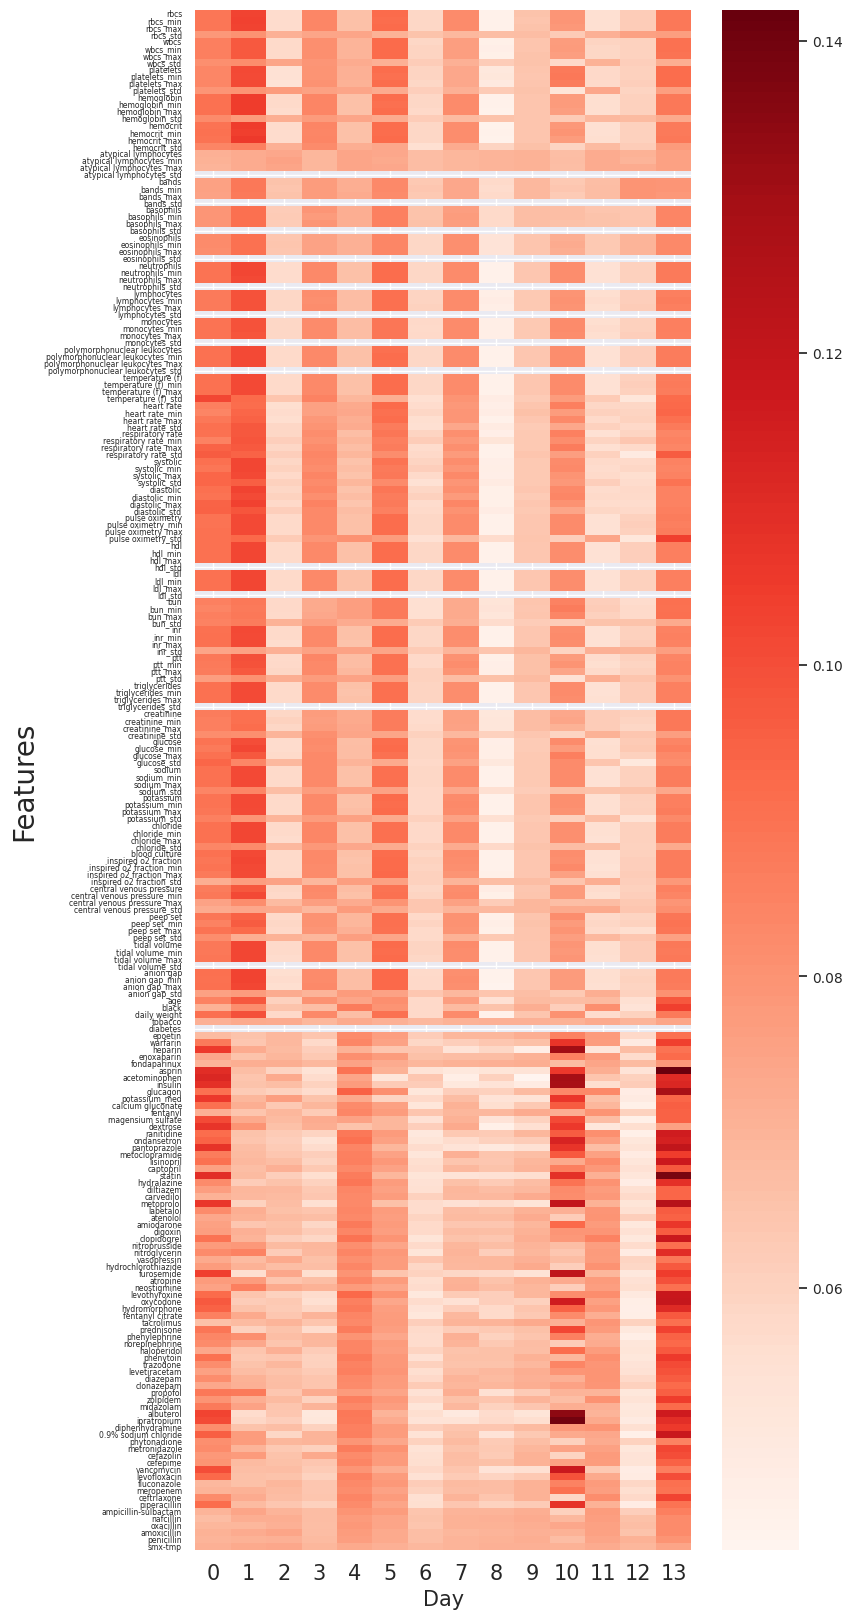

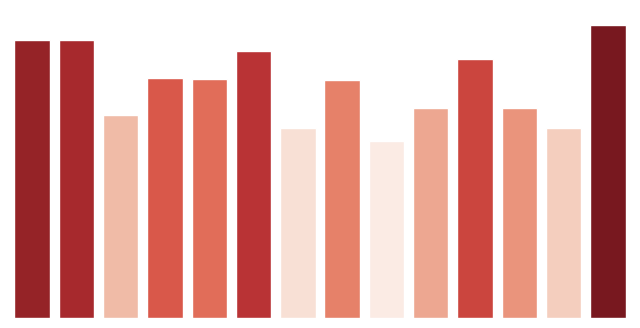

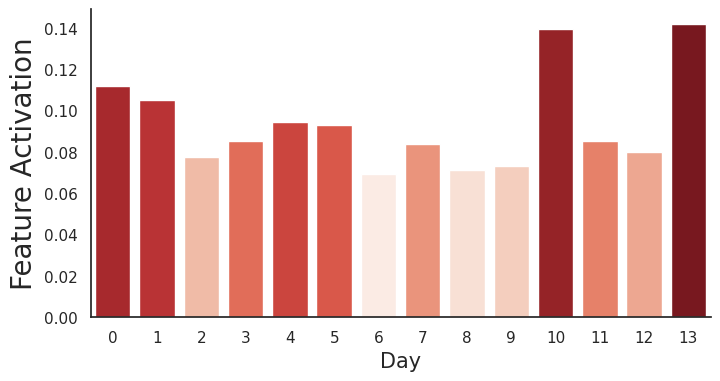

In [ ]:
##############
## FIGURE 3 ##
##############

## GET HEATMAPS FOR ALL INCIDENTS AVERAGE ##

plt.figure(figsize = (8,20))

sns.set(font_scale = 0.5)

heatmap(np.nanmean(activations,axis=0).T[arranged_indices],
        square=False,
        yticklabels=np.array(features)[arranged_indices],
        cmap=my_cmap)
plt.gcf().axes[-1].tick_params(labelsize=10)
plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Features', fontsize=20)
plt.savefig(ROOT+'figures/heatmap_{0}_med_ranked_average_activation_Figure_3.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## MAKE THE BARPLOT THAT GOES ON TOP OF THE HEATMAP ##
## THE ATTENTION ON EVERY TIME STEP AVERAGED OVER FEATURES ##

plt.figure(figsize = (8,4))
sns.set(style="white")
y_vector = np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1)
print('There is a {0} % change between day 0 and 1'.format((y_vector[1] - y_vector[0])/float(y_vector[0])))
color_rank = np.argsort(np.argsort(y_vector))
plot = sns.barplot(x=list(range(14)), y=np.nanmean(np.nanmean(activations,axis=0).squeeze(), axis=1),
                    palette=np.array(color_list)[color_rank])
plot.set(xticklabels=[])
plot.set(yticklabels=[])
sns.despine(left=True, bottom=True)

plt.savefig(ROOT+'figures/heatmap_{0}_med_ranked_average_barplot_Figure_3.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## IDENTIFY MOST IMPORTANT FEATURE AT EVERY TIME STEP ##

plt.figure(figsize = (8,4))
sns.set(style="white")
y_vector = np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0)
color_rank = np.argsort(np.argsort(y_vector))
plot = sns.barplot(x=list(range(14)), y=np.nanmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0),
                    palette=np.array(color_list)[color_rank])
plt.xlabel('Day', fontsize=15)
plt.ylabel('Feature Activation', fontsize=20)
sns.despine()# left=True, bottom=True)

plt.savefig(ROOT+'figures/{0}_highest_feature_activation_by_timestep_barplot_Figure_3.eps'.format(target),
            format='eps', dpi=300, bbox_inches='tight')

## list of features by day that these activations correspond to ##

np.nanargmax(np.nanmean(activations, axis=0).T[arranged_indices], axis=0)
print(np.array(features)[arranged_indices][np.nanargmax(np.nanmean(activations, axis=0).T[arranged_indices],
                                                     axis=0)])
#####

In [ ]:
def find_intrahospital_incidents():
    IHI_keys =  np.where(np.nansum(Y_TEST.squeeze(), axis=1) > 1)[0]
    for i in IHI_keys:
        predictions = Y_PRED_mask_0[i][~y_boolmat_test[i].squeeze()].squeeze()
        predictions_without_attention = Y_PRED_mask_0_without_attention[i][~y_boolmat_test[i].squeeze()].squeeze()
        ground_truth = Y_TEST[i].squeeze()[~y_boolmat_test[i].squeeze()].squeeze()
        acc = accuracy_score(np.around(predictions), ground_truth)
        acc_without_attention = accuracy_score(np.around(predictions_without_attention), ground_truth)
        criteria = (acc > .9 and
#                    np.around(predictions[0]) == 0 and
                    (np.add(ground_truth, np.around(predictions)) == 2).any()  and
                    (ground_truth[0] == 0) and
                    (np.sum(ground_truth[0:2]) == 0) and
#                    (np.sum(ground_truth) > 1) and
                    ground_truth.shape[0] == 14)
        if criteria:
            print("Person {0} with IHI".format(i))
            print('Ground Truth')
            print(ground_truth)
            print('Predicted Sequence')
            print(np.around(predictions))
            print('Predicted Sequence without attention')
            print(np.around(predictions_without_attention))
            print('\n')

find_intrahospital_incidents()

In [ ]:
if target == 'MI':
    patient_num = 870
elif target == 'SEPSIS':
    patient_num = 927
elif target == 'VANCOMYCIN':
    patient_num = 582

In [ ]:
def patient_heatmap(patient_num, savefig=False, target=None):

        if target == None:
            raise Exception('Specify Target')

        print('\n')
        print('Visualize Inputs')
        print('Ground Truth')
        ground_truth = Y_TEST[patient_num].squeeze()[~y_boolmat_test[patient_num].squeeze()]
        print(ground_truth)
        print('Predicted Sequence')
        predictions = Y_PRED_mask_0[patient_num].squeeze()[~y_boolmat_test[patient_num].squeeze()]
        print(np.around(predictions))

        if target == 'MI':
            color_list_barplot = sns.color_palette("Reds", ground_truth.shape[0])
        elif target == 'SEPSIS':
            color_list_barplot = sns.cubehelix_palette(ground_truth.shape[0], start=2, rot=0, dark=0.25, light=.95)
        elif target == 'VANCOMYCIN':
            color_list_barplot = sns.cubehelix_palette(ground_truth.shape[0])

        print('Individual Heatmap')
        plt.figure(figsize = (8,20))
        sns.set(font_scale = 0.5)

    #    activations_map = np.nanmean(activations,axis=0)/(np.nanmax(np.nanmean(activations, axis=0), axis=1))[:,None]
        activations_map = activations[patient_num]/np.nanmax(activations[patient_num,::,::], axis=1)[:,None]
        heatmap(activations[patient_num].T[arranged_indices],
                       square=False,
#                      vmin=np.amin(activations[patient_num,:,:]),
#                      vmax=np.amax(activations[patient_num,:,:]),
                     yticklabels=np.array(features)[arranged_indices], cmap=my_cmap)
        plt.gcf().axes[-1].tick_params(labelsize=10)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15)
        plt.yticks(fontsize=8)
        plt.xlabel('Day', fontsize=20)
        plt.ylabel('Features', fontsize=20)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)

        if savefig:
            plt.savefig(ROOT+'figures/heatmap_{0}_patient_{1}.eps'.format(target, patient_num),
                        format='eps', dpi=300, bbox_inches='tight')

        rel_vector = np.nanmean(activations[patient_num,::,::].T.squeeze(), axis=0)
        rel_vector = rel_vector[~y_boolmat_test[patient_num].squeeze()]
        color_order = np.argsort(rel_vector, axis=0)
        color_order_order = np.argsort(color_order)

        plt.figure(figsize = (8,4))
        sns.set(style="white")
        plot = sns.barplot(x=np.arange(14)[~y_boolmat_test[patient_num].squeeze()], y=rel_vector,
                           palette=np.array(color_list_barplot)[color_order_order])
        plot.set(xticklabels=[])
        plot.set(yticklabels=[])
        sns.despine(left=True, bottom=True)

        print('Patient Features Heatmap')
        if savefig:
            plt.savefig(ROOT+'figures/barplot_for_heatmap_{0}_patient_{1}.eps'.format(target, patient_num),
                        format='eps', dpi=300, bbox_inches='tight')

        plt.figure(figsize= (8,20))
        sns.set(font_scale = 0.5)
        activations_map = X_TEST[patient_num,::,::]/np.nanmax(X_TEST[patient_num,::,::], axis=0) #[:,None]
        heatmap(X_TEST[patient_num,::,::].T[arranged_indices], square=False,
                yticklabels=np.array(features)[arranged_indices],
                cmap=my_cmap) #, cbar_kws={'ticks':[]})
        plt.gcf().axes[-1].tick_params(labelsize=10)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)
        plt.yticks(fontsize=8)
        plt.xlabel('Day', fontsize=20)
        plt.ylabel('Features', fontsize=20)
        plt.xticks(np.arange(TIME_STEPS)+0.5, np.arange(TIME_STEPS), fontsize=15) #, rotation=45,)
        if savefig:
            plt.savefig(ROOT+'figures/features_heatmap_{0}_patient_{1}.eps'.format(target, patient_num),
                        format='eps', dpi=300, bbox_inches='tight')

        rel_vector = np.nanmean(X_TEST[patient_num,::,::].T.squeeze(), axis=0)[~y_boolmat_test[patient_num].squeeze()]
        color_order = np.argsort(rel_vector, axis=0)
        color_order_order = np.argsort(color_order)

        plt.figure(figsize = (8,4))
        sns.set(style="white")
        plot = sns.barplot(x=np.arange(14)[~y_boolmat_test[patient_num].squeeze()], y=rel_vector,
                           palette=np.array(color_list_barplot)[color_order_order])
        plot.set(xticklabels=[])
        plot.set(yticklabels=[])
        sns.despine(left=True, bottom=True)
        if savefig:
            plt.savefig(ROOT+'figures/barplot_features_heatmap_{0}_patient_{1}.eps'.format(target, patient_num),
                        format='eps', dpi=300, bbox_inches='tight')

In [ ]:
## Get the top activations for that day, the day before, the day before ##

def features_driving_incident(patient_num, savefig=False):

    plt.figure(figsize = (8,4))
    sns.set(style="white")

    if not np.any(Y_TEST[patient_num]==1):
      print(str(patient_num) + 'does not have any with Y_TEST[patient_num]==1')
      return

    if np.where(Y_TEST[patient_num] == 1) and np.where(Y_TEST[patient_num] == 1)[0][0] == 1:
        day_zero = 1
        day_neg_one = 0
        days = np.array([day_neg_one, day_zero])
        days_string = ['Day -1', 'Day 0']
    elif np.where(Y_TEST[patient_num] == 1)[0][0] >= 2:
        assert np.where(Y_TEST[patient_num] == 1)[0][0] >= 2
        day_zero = np.where(Y_TEST[patient_num] == 1)[0][0]
        day_neg_one = day_zero - 1
        day_neg_two = day_zero - 2
        days = np.array([day_neg_two, day_neg_one, day_zero])
        days_string = ['Day -2', 'Day -1', 'Day 0']
    else:
      print("hi")


    y_vector = np.nanmax(activations[patient_num], axis=1) #[days]
    print(y_vector)
    print(np.nansum(y_vector))
    color_rank = np.argsort(np.argsort(y_vector))
    plot = sns.barplot(x=days_string, y=y_vector[days],
                       palette=np.array(color_list)[color_rank][days])
    plt.ylabel('Feature Activation', fontsize=20)
        #plot.set(xticklabels=[])
        #plot.set(yticklabels=[])
    sns.despine() # left=True, bottom=True)

    if savefig:
        plt.savefig(ROOT+'figures/max_activation_pre_incident_barplot_Figure_4_{0}_patient_{1}.eps'.format(target, patient_num),
             format='eps', dpi=300, bbox_inches='tight')

    ## list of features by day that these activations correspond to ##

    print(np.array(features)[np.nanargmax(activations[patient_num], axis=1)][days])
    print(np.nanmax(activations[patient_num], axis=1)[days])

#####

features_driving_incident(patient_num, savefig=True)

#####

870does not have any with Y_TEST[patient_num]==1


<Figure size 800x400 with 0 Axes>

In [ ]:
print(activations[patient_num].shape)

print(activations[patient_num].T[features.index('phenylephrine'),1])

#activations[patient_num][list(np.array(features)[arranged_indices]).index('levothyroxine'),0]

(14, 220)
0.058912486


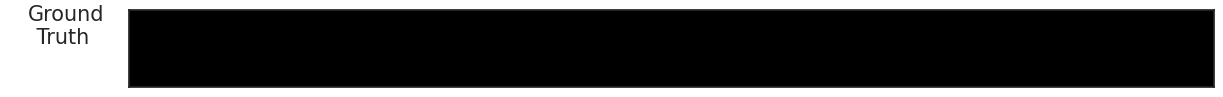

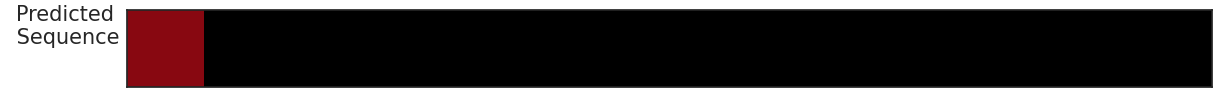

In [ ]:
## FIGURE 4 ##

def predictions_labels_palplot(patient_num, savefig=False):

    color_list_gt = np.array(color_list.copy())
    color_list_gt[Y_TEST[patient_num].squeeze() == 1] = color_list_gt[-1]
    color_list_gt[Y_TEST[patient_num].squeeze() == 0] = [0,0,0]
    sns.palplot(color_list_gt)
    plt.ylabel('Ground\n    Truth     ', fontsize=15, rotation='horizontal', labelpad=45) #.set_rotation(0)

    if savefig:
        plt.savefig(ROOT+'figures/{0}_GT_labels_Figure_4.eps'.format(target), format='eps',
                dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

    color_list_pred = np.array(color_list.copy())
    color_list_pred[np.around(Y_PRED_mask_0[patient_num].squeeze()) == 1] = color_list_pred[-1]
    color_list_pred[np.around(Y_PRED_mask_0[patient_num].squeeze()) == 0] = [0,0,0]
    sns.palplot(color_list_pred)
    plt.ylabel('Predicted\n Sequence', fontsize=15, rotation='horizontal', labelpad=45)
    if savefig:
        plt.savefig(ROOT+'figures/{0}_PRED_labels_Figure_4.eps'.format(target), format='eps',
                   dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,),
                    bbox_inches='tight')

predictions_labels_palplot(patient_num, savefig=True)

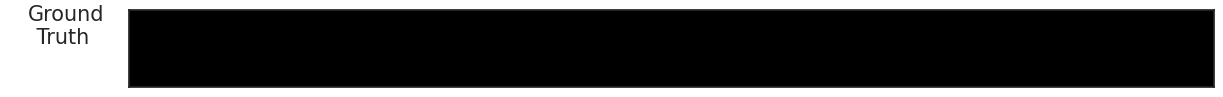

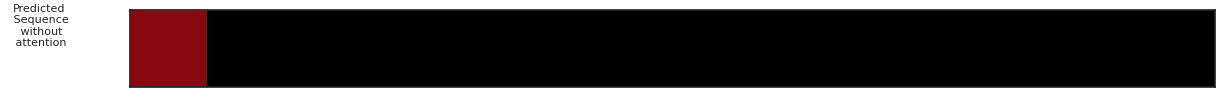

In [ ]:
## FIGURE 4 WITHOUT ATTENTION##

def predictions_labels_palplot_without_attention(patient_num, savefig=False):

    color_list_gt = np.array(color_list.copy())
    color_list_gt[Y_TEST[patient_num].squeeze() == 1] = color_list_gt[-1]
    color_list_gt[Y_TEST[patient_num].squeeze() == 0] = [0,0,0]
    sns.palplot(color_list_gt)
    plt.ylabel('Ground\n    Truth     ', fontsize=15, rotation='horizontal', labelpad=45) #.set_rotation(0)

    if savefig:
        plt.savefig(ROOT+'figures/{0}_GT_labels_Figure_4_without_attention.eps'.format(target), format='eps',
                dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

    color_list_pred = np.array(color_list.copy())
    color_list_pred[np.around(Y_PRED_mask_0_without_attention[patient_num].squeeze()) == 1] = color_list_pred[-1]
    color_list_pred[np.around(Y_PRED_mask_0_without_attention[patient_num].squeeze()) == 0] = [0,0,0]
    sns.palplot(color_list_pred)
    plt.ylabel('Predicted\n Sequence\n without\n attention', fontsize=8, rotation='horizontal', labelpad=65)
    if savefig:
        plt.savefig(ROOT+'figures/{0}_PRED_labels_Figure_4_without_attention.eps'.format(target), format='eps',
                   dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,),
                    bbox_inches='tight')

predictions_labels_palplot_without_attention(patient_num, savefig=True)

# Results VANCOMYCIN


**Masking Results:**

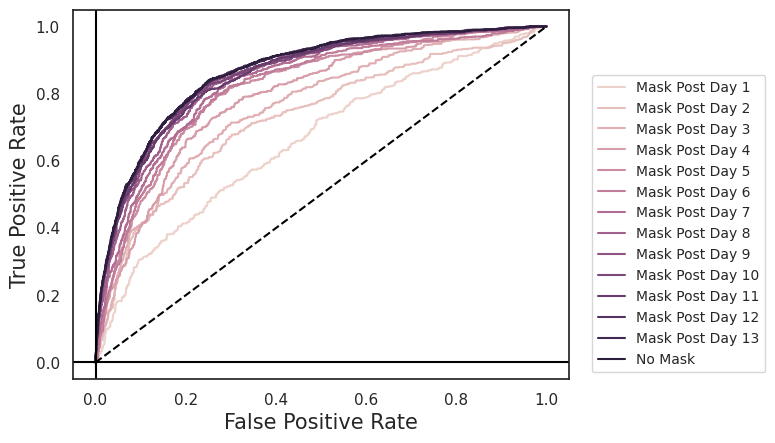
*   AUC Score without Masking (0.8654588972500161): The model performs the best when has access to all the information without any masking.

*   AUC Scores with Masking: When masking starts the data post certain days (meaning you hide the data from the model starting the day after the number indicated), the AUC scores change slightly but not drastically at first. Masking after day 13 yields an AUC of 0.8656182525244172, which is very close to the AUC without any masking.

*   Decreasing AUC with More Masking: As more data is masked out (moving from day 13 to day 1), the AUC scores tend to decrease with the lowest being the day 1 mask giving an AUC of 0.6588877174122771.

**Lag Prediction Results:**

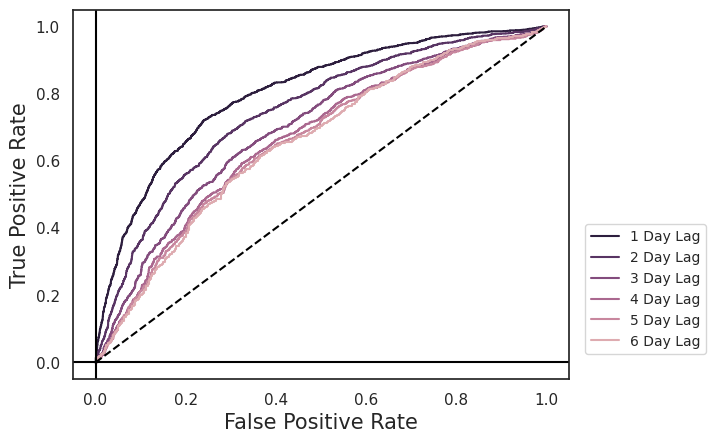
* PPV for full model w/ 1 day lag is 0.575019638648861
* Sensitivity for full model w/ 1 day lag is 0.50


```
                precision   recall   f1-score   support

         0.0       0.86      0.89      0.87      4799
         1.0       0.58      0.50      0.54      1454

    accuracy                           0.80      6253
   macro avg       0.72      0.70      0.70      6253
weighted avg       0.79      0.80      0.79      6253
```

As the lag increases from 1 day to 6 days, the models performance generally decreases.

**Activation Weights:**

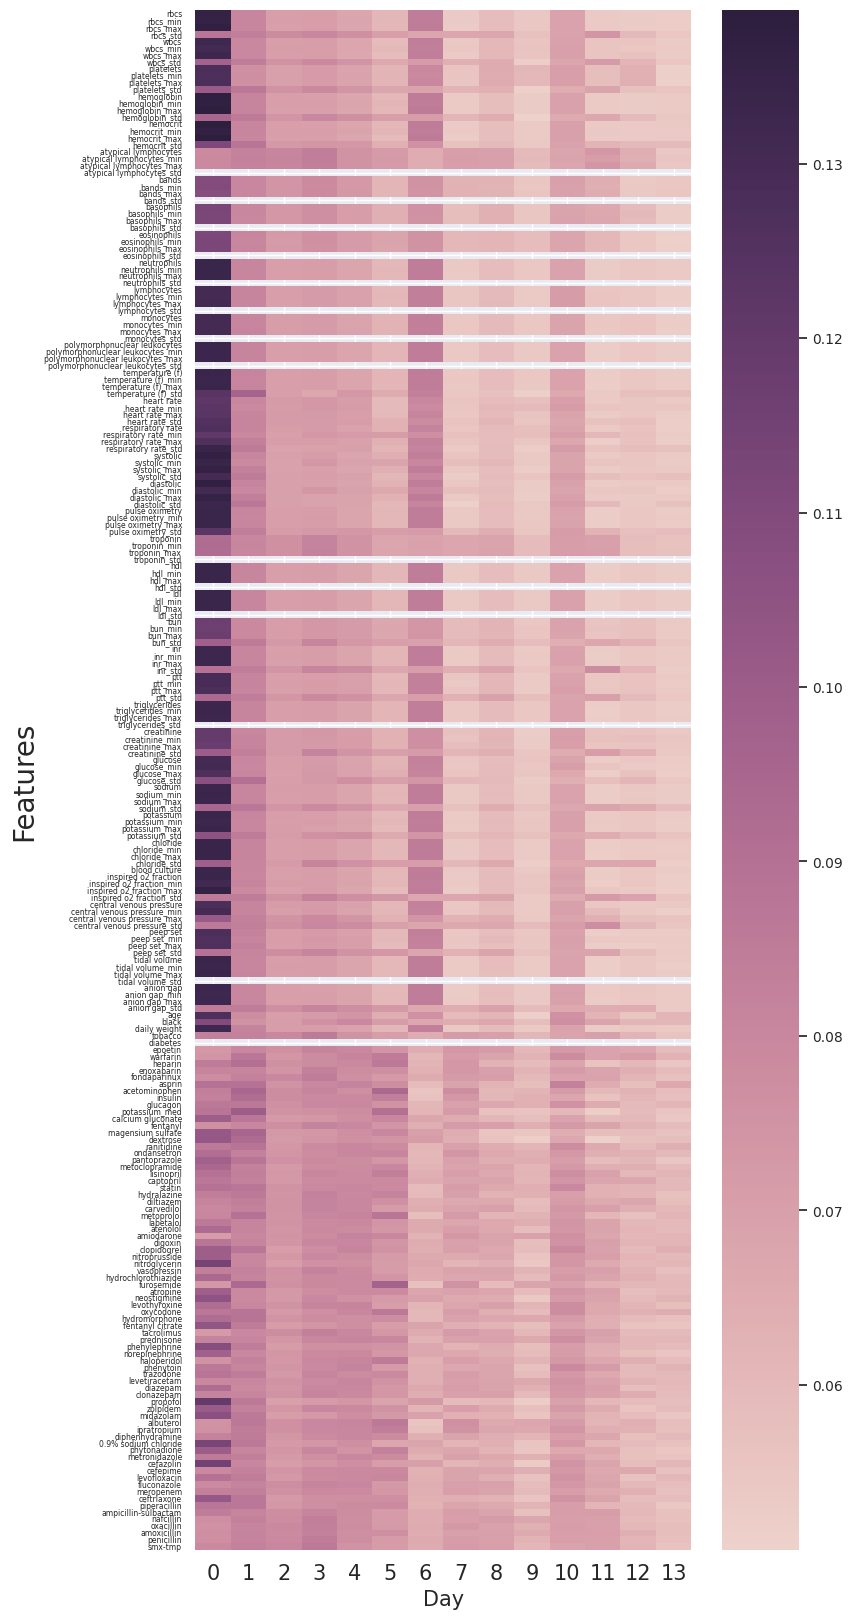
*   Feature-by-feature Activation: Heatmap shows the average activation value for each feature across different days. The darker colors indicate high activation values meaning they are considered more important. Noteable features such as hemocrit_max and potassium_med are shown at the beginning and towards the end of the 14-day period.

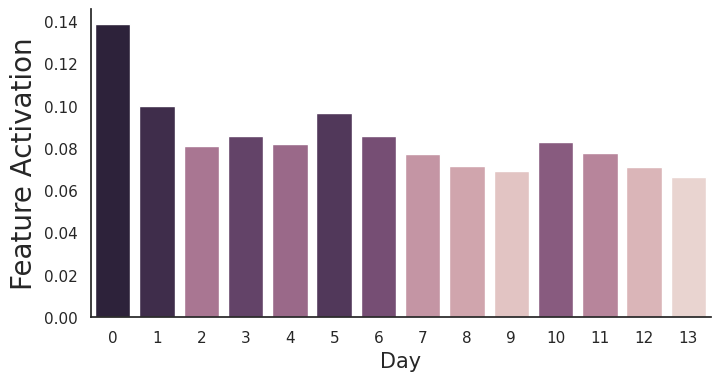
*   Activation for each Day: The barplot shows the average activation where darker colors indicate higher activation and lighter colors indicate lower activation over all features for each day. There is a trend of decreasing feature activation over the 14 days.

**Activation Weights of Subsequent Days:**

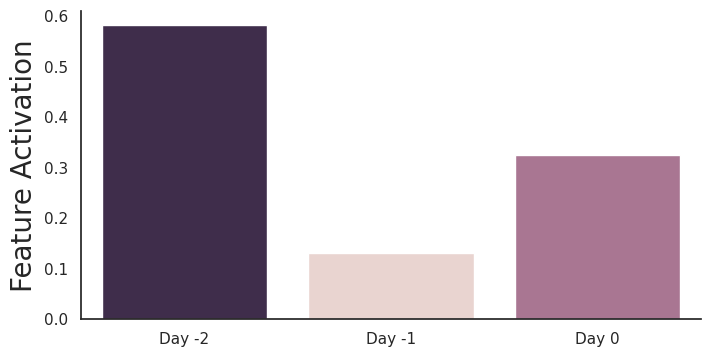

The bar heights represent the magnitude of the feature activations, with "Day -2" showing the highest activation (0.58031386), followed by a significant drop on "Day -1" (0.13078956) and a partial rebound on "Day 0" (0.32413176).


# Results SEPSIS


**Masking Results:**

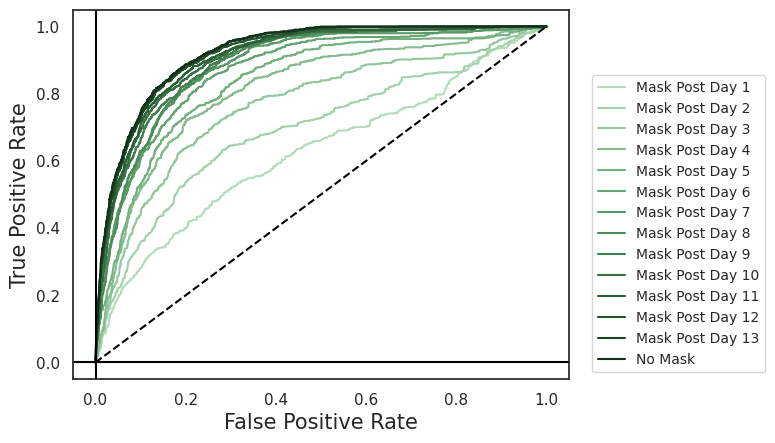

AUC Score without Masking (0.924): The model shows the best performance when it has no masking, which is very close to the Post 13 day mask at 0.922.

AUC Scores with Masking: The model benefits more and more the larger the mask post day is. There is a significant increase between the Mask Post Day 1 and the Mask Post day 13 with the best masking results at Post 13 day at 0.922.

Decreasing AUC with More Masking: As more data is masked out (moving from day 13 to day 1), the AUC scores tend to decrease with the lowest being the day 1 mask giving an AUC of 0.625.

**Lag Prediction Results:**

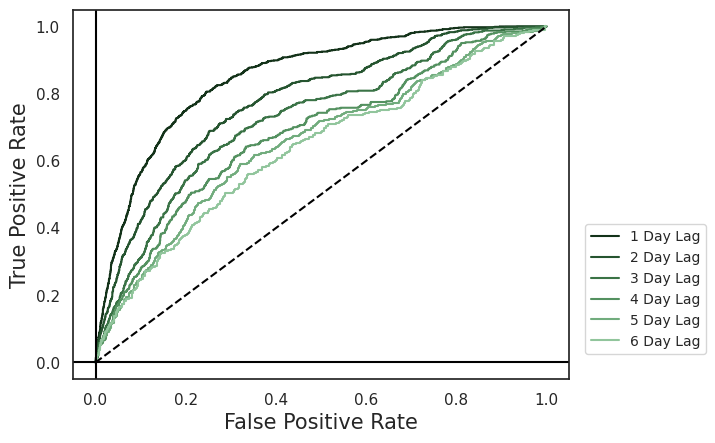

PPV for full model w/ 1 day lag is 0.5208711433756806.

Sensitivity for full model w/ 1 day lag is 0.33.

```
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      5341
         1.0       0.52      0.33      0.40       882

    accuracy                           0.86      6223
   macro avg       0.71      0.64      0.66      6223
weighted avg       0.84      0.86      0.85      6223
```

**Activation Weights:**

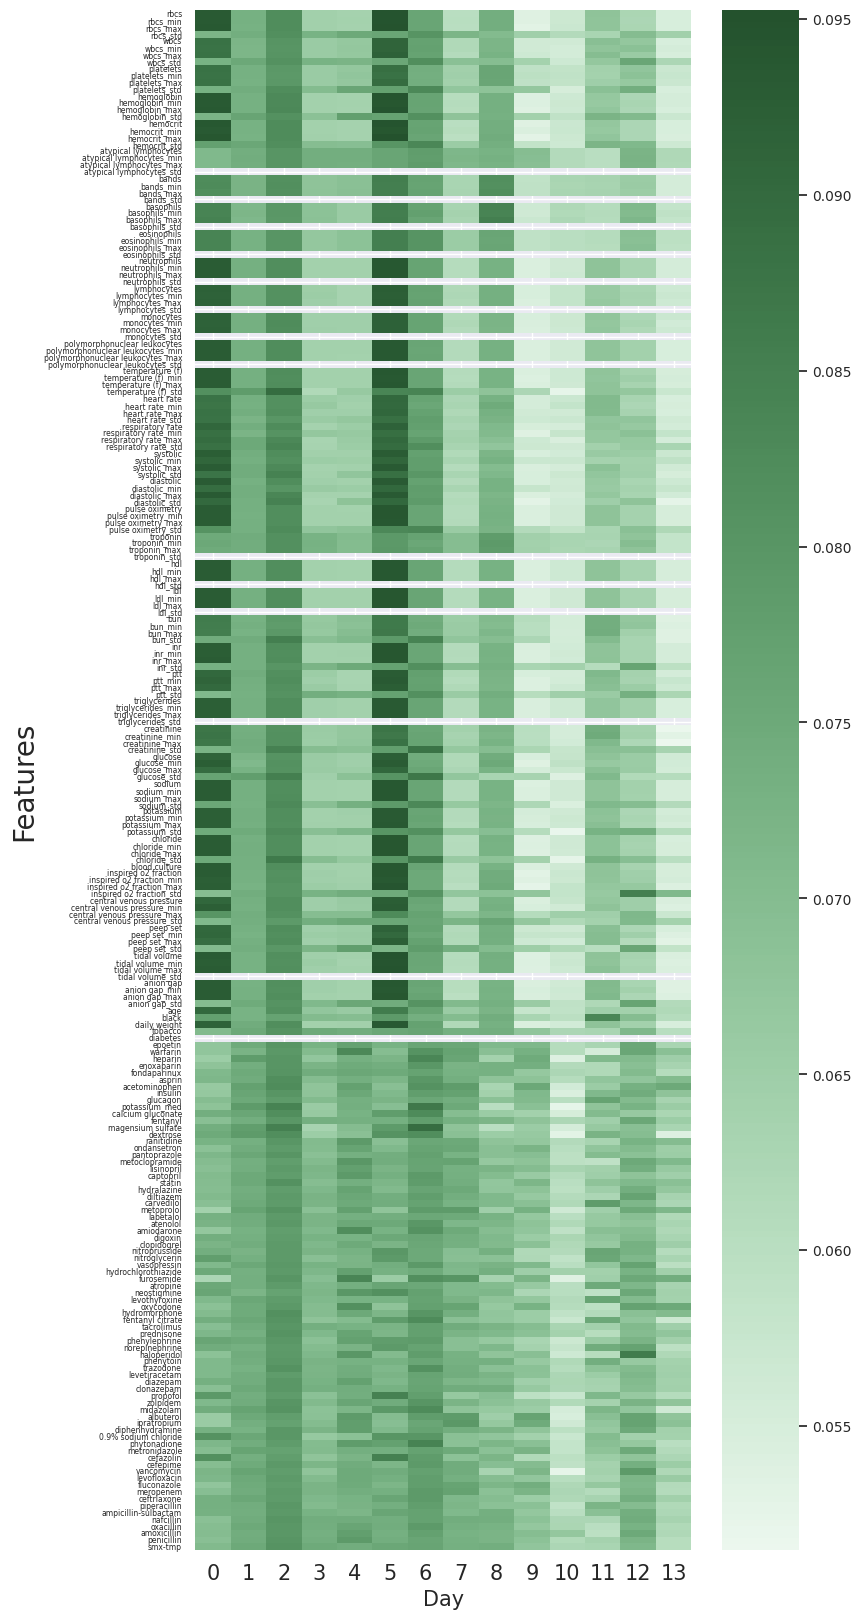

Feature-by-feature Activation: Features like vital signs (e.g., heart rate, respiratory rate), lab results (e.g., creatinine, hemoglobin), and medications (e.g., vancomycin, dexamethasone) appear to be among the more consistently important features which means they are critical in the predictions.

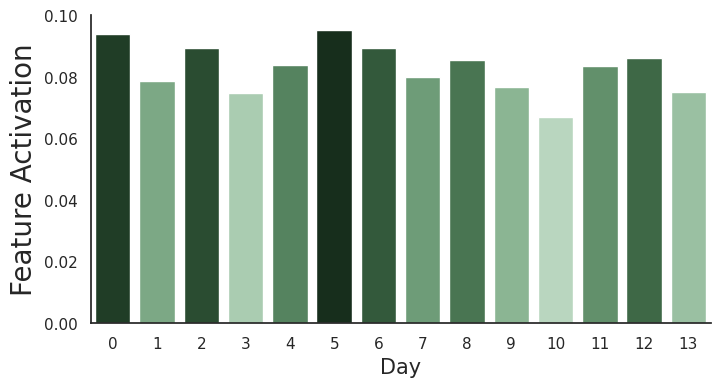

Activation for each Day: The trend is very flat for activation however the amount of activation seems to spike at Day 0 and day 5 indicating those days and features were influential.

**Activation Weights of Subsequent Days:**

The magnitude of activations are fairly flat throughout the subsequent days which indicated that that Day -2, -1, and 0 are all important information to the model.

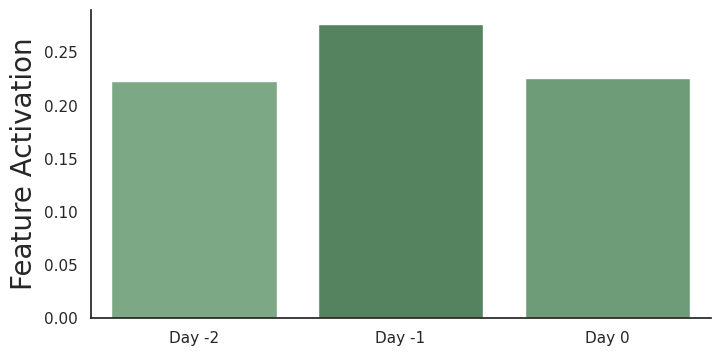

# Results MI


**Masking Results:**

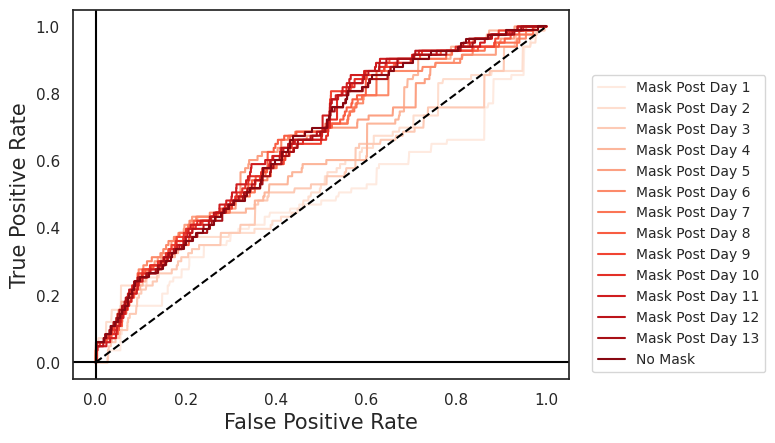

AUC Score without Masking: The model performs the best without masking however Mask Post Day 10 result and above.

AUC Scores with Masking: When the masking starts, similar to previous experiments the data accuracy is low however once Mask Post Day 10 occurs, we reach a point where no additional masking provies significant increase in the accuracy.

**Lag Prediction Results:**

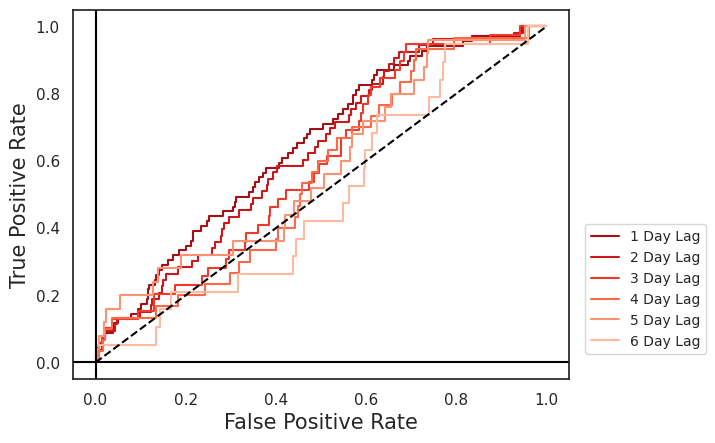

PPV for full model w/ 1 day lag is 0.0047789725209080045

Sensitivity for full model w/ 1 day lag is 0.15

```
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93      6329
         1.0       0.00      0.15      0.01        26

    accuracy                           0.87      6355
   macro avg       0.50      0.51      0.47      6355
weighted avg       0.99      0.87      0.92      6355
```

Accuracy increases with a lower day lag. Showing best performance at 1 day with worst at day 6 similar to results from other experiments.

**Activation Weights:**

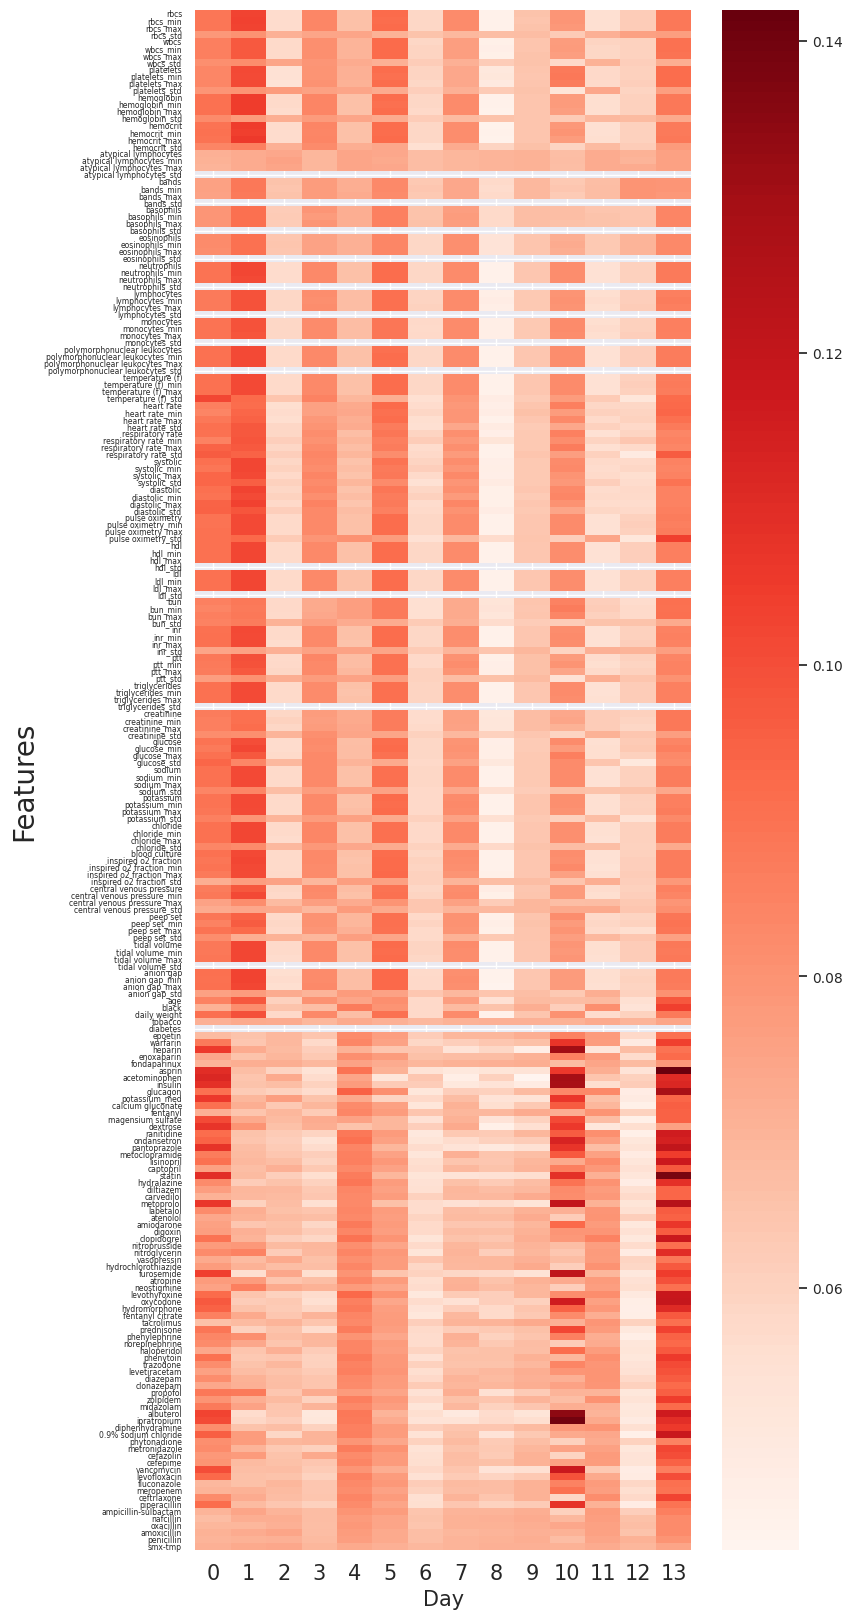

Features like vital signs, lab results, and medications still appear to be among the more consistently important features. Some of the more vital are peep_set, potassium levels and glucose levels on the 10th day.

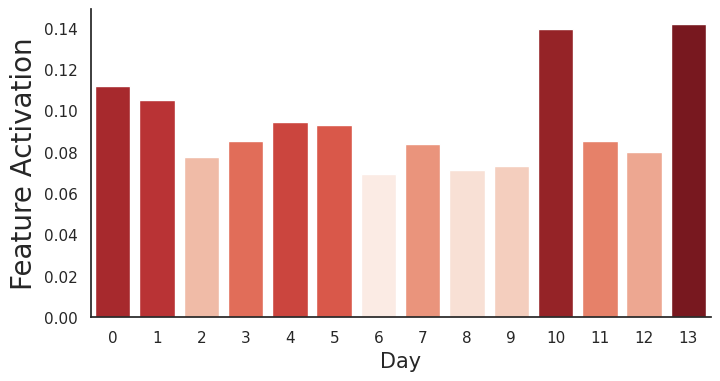

Activation for each Day: There seems to be some peaks on day 10 and day 13 indicating that these days spike a lot of activation and are important to the predicted outcome.

Hypothesis Review:
Based on the experiments from the origional paper and our reproduced results, we have concluded that it is possible to identify Vancomycin, Sepsis, and MI via RNNs.

# Experiments:

We conducted 2 different experiements:
- Predict VANCOMYCIN using a Decision Tree
- Predict VANCOMYCIN using a SVM

Pre-processing:

The origional data had 3 dimensions of data. Train and testing had 2322 samples, each containing 14 timesteps, with 223 features per timestep. To model using different models we created new features to flatten the temporal dimension into feature vectors.

Each feature vector is a result of concatenating mean, standard deviation, minimum, and maximum values calculated across the timesteps.

Create function for Flattening

In [ ]:
def extract_features(data):
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    mins = np.min(data, axis=1)
    maxs = np.max(data, axis=1)

    feature_vector = np.column_stack((means, stds, mins, maxs))
    return feature_vector

##### Decision Tree Experiment

In [ ]:
from scipy.stats import mode
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

if Y_TRAIN.ndim == 3:
    Y_TRAIN = Y_TRAIN.reshape(Y_TRAIN.shape[0], Y_TRAIN.shape[1])
    Y_TRAIN = mode(Y_TRAIN, axis=1).mode.flatten()


tree_clf = DecisionTreeClassifier()

X_train_features = extract_features(X_TRAIN)
X_val_features = extract_features(X_VAL)
X_test_features = extract_features(X_TEST)

tree_clf.fit(X_train_features, Y_TRAIN)

if Y_TEST.ndim == 3:
    Y_TEST = Y_TEST.reshape(Y_TEST.shape[0], Y_TEST.shape[1])
    Y_TEST = mode(Y_TEST, axis=1).mode.flatten()

y_pred = tree_clf.predict(X_test_features)

print("Accuracy:", accuracy_score(Y_TEST, y_pred))
print("Classification Report:\n", classification_report(Y_TEST, y_pred))


Accuracy: 0.9106529209621993
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       803
         1.0       0.44      0.39      0.41        70

    accuracy                           0.91       873
   macro avg       0.69      0.67      0.68       873
weighted avg       0.91      0.91      0.91       873



Decision Tree Model Performance Analysis:

1. Accuracy: We achieved a 91.1% accuracy on the test set which is high
2. The major class (Not VANCOMYCIN) has high precision, recall and F1 score.
3. The minority class (VANCOMYCIN) has a low precision, recall and F1 score meaning it is not classifying it correctly.

Overall, we have high accuracy on the test set which can be a reliable alternative to the proposed RNN approach.

##### SVM Experiment

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train_features, Y_TRAIN)
y_pred = svm_clf.predict(X_test_features)
print("Accuracy:", accuracy_score(Y_TEST, y_pred))
print("Classification Report:\n", classification_report(Y_TEST, y_pred))

Accuracy: 0.9232531500572738
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       803
         1.0       0.80      0.06      0.11        70

    accuracy                           0.92       873
   macro avg       0.86      0.53      0.53       873
weighted avg       0.91      0.92      0.89       873



SVM Model Performance Analysis:

1. Accuracy: We achieved a 92.3% accuracy on the test set
2. Similar to the decision tree, the major class (Not VANCOMYCIN) has high precision, recall and F1 score.
3. Same as the decision tree, the minority class (VANCOMYCIN) has a low precision, recall and F1 score meaning it is not classifying it correctly.

With the SVM we have high accuracy on the test set which can be another reliable alternative to the proposed RNN approach and even the decision tree.

# Abalations

One key component of this paper is the attention mechanism used to predict: Sepsis, MI and Vancomycin.

We decided to run the model WITHOUT this attention mechanism to compare results to the model.



**Vancomycin Comparison:**

With Attention:
```
PPV for full model is 0.7021466905187835
Sensitivity for full model is 0.46

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      5511
         1.0       0.70      0.46      0.56      1705

    accuracy                           0.83      7216
   macro avg       0.78      0.70      0.72      7216
weighted avg       0.81      0.83      0.81      7216
```

Without Attention:
```
PPV for full model(without attention) is 0.6871859296482412
Sensitivity for full model(without attention) is 0.64

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      5511
         1.0       0.69      0.64      0.66      1705

    accuracy                           0.85      7216
   macro avg       0.79      0.78      0.78      7216
weighted avg       0.84      0.85      0.84      7216
```

**Comparison Vancomycin:**
The model with attention has slightly higher precision at 0.7021 vs. the other at 0.6872. This means that out of all the predicted positive cases for the Vancomycin, the attention model correctly identifies a greater proportion. However, the model without attention has significantly higher recall (0.64 vs. 0.46). This suggests that the non-attention model can identify a greater proportion of true positive cases. The model without attention also has a higher F1-score.

**Sepsis Comparison:**

With Attention:
```
PPV for full model is 0.7052023121387283
Sensitivity for full model is 0.34

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6065
         1.0       0.71      0.34      0.46      1083

    accuracy                           0.88      7148
   macro avg       0.80      0.66      0.69      7148
weighted avg       0.86      0.88      0.86      7148
```

Without Attention:
```
PPV for full model(without attention) is 0.7532281205164992
Sensitivity for full model(without attention) is 0.48

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      6065
         1.0       0.75      0.48      0.59      1083

    accuracy                           0.90      7148
   macro avg       0.83      0.73      0.77      7148
weighted avg       0.89      0.90      0.89      7148
```

**Comparison Sepsis:**
The model without attention has higher precision indicating the non-attention model correctly identifies a greater proportion of cases if Sepsis. It is important to note it also much higher recall and F1 score.

**MI Comparison:**

With Attention:
```
PPV for full model is 0.02145214521452145
Sensitivity for full model is 0.31

              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      7006
         1.0       0.02      0.31      0.04        83

    accuracy                           0.82      7089
   macro avg       0.51      0.57      0.47      7089
weighted avg       0.98      0.82      0.89      7089
```

Without Attention:
```
PPV for full model(without attention) is 0.03018867924528302
Sensitivity for full model(without attention) is 0.58

              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87      7006
         1.0       0.03      0.58      0.06        83

    accuracy                           0.78      7089
   macro avg       0.51      0.68      0.47      7089
weighted avg       0.98      0.78      0.86      7089
```

**Comparison MI:**
The model without attention has higher precision even though both models have low precision, the model without attention better identifies true positives among its predictions. The model without attention shows better performance for detecting MI in terms of recall, and F1-score as well.

# Discussion & Analyses

In this section, we discuss our work and future plans.

**Make assessment that the paper is reproducible or not**


After spending some time with the linked code, we can make the assesment that the paper is reproducible. Despite some inital hurdles related to the programming environments, the actual execution of the code required very minimal changes (imports). The same MIMIC-III dataset was used and the MIMIC parser was able to parse and transform the data into what was needed to run the model. The use of Keras, Tensorflow, Pandas and other commonly used frameworks eased the ability for us to reproduce the results with the given code. Based on what we have been able to reproduce so far with a trimmed dataet, it does seem that the the hypothesis are still acheievable.


**Describe “What was easy” and “What was difficult” during the reproduction**

What was "easy"?

- Once the environment is set up correctly, the provided code runs without much modification
- The code is broken down into useful functions and classes that help interpretability
- Once the data was mounted in google drive correctly, there were no concerns with pre-processed file sizes


What was "hard"?

- The amount of data needed makes it hard to run from a local environment
- The amount of data also can lead to occacsional run time issues, and memory issues
- The environment set up was difficult as it required a lot of trial and error to find the correct set of imports and system calls.
- Unable to train on the full pre-processed data in google collab notebook (had to trim down to first 50k)

**Make suggestions to the author or other reproducers on how to improve the reproducibility.**


- One thing that can be improved is to update the dependencies used. Some of the packages from keras have been updated so the code is slightly out of date for that.
- One improvement we made to the code was to chunk the input as it is read. This allows the pre-processing tasks to run without timing or failing on most platforms.
- The code comments are useful, but a little more documentation would help reproducibility

Public Github Repo:
https://github.com/archu-s/mimic-lstm/tree/updated

# References

1.   Kaji, Deepak A et al. “An attention based deep learning model of clinical events in the intensive care unit.”, PLoS ONE 14 (2019): n. pag., doi: https://doi.org/10.1371/journal.pone.0211057



Project Video Link:
https://drive.google.com/file/d/1TBMR39_u-MkAhjP_37zrPbgDQ14A1yXP/view?usp=sharing